**Project 2 - Investing in Stocks**
-------------------------------------------------------------------------
**Dr. Carlos Cardonha - OPIM 5641: Business Decision Modeling - University of Connecticut**

Group 5$:$ 
* Akshay Kumar Pydi
* Bhanu Sai Teja Guduri 
* Cedric Wong
* Lily Abarbanel
* Monica Lingan
* Youngkyun Kwon

## **Summary**
---

More than half of the Members of Congress are millionaires and many of them are trading individual stocks. In this project, we will be creating an investment plan for our **Senator,** **James M Inhofe**. We will be using the required disclosures from Members of Congress to help build the porfolio. We are going to show the details as follows:

* Exploratory Data Analysis on his investment pattern
* Methodology of 10 stocks selection
* Building a new investment portfolio

One of the founding fathers of modern portfolio theory is **Harry Markowitz**, and one of his seminal contributions was the ‘**Mean-Variance portfolio optimization model**’, which is a nonlinear optimization problem where, given a set of assets and a budget, the goal is to select the amount of money to allocate to each asset such that:

* The expected income of the selected portfolio is equal to some predefined value; and
* The goal is to minimize the risk, which is given by the covariance (risk) of the portfolio.

## **Import Modules**

In [ ]:
# importing modules
import pandas as pd # for data wrangling
import numpy as np # for array calculations, some math functions
from matplotlib import pyplot as plt # for plotting
import seaborn as sns # for plotting

# **Read Data**
---

We will be creating an investment plan for **Senator, James M Inhofe.** The dataset we used for this process has all transactions associated with our senator. However, we will be filtering our dataset from Jan 1, 2015 to March 31, 2020 for our initial analysis.

* Dataset - https://senatestockwatcher.com/summary_by_senator/James%20M%20Inhofe
* Drive Source - https://drive.google.com/file/d/1iptqILmefoaKk2IsPC_4iYAkKdM5G9S4/view?usp=sharing

In [ ]:
# step 1: copy & paste the shared link you will get from Google Drive
URL1 = 'https://drive.google.com/file/d/1X4LMzCG2DxD4JMzufuzsrjeZ5ws3eWLY/view?usp=sharing'

# step 2: copy & paste the command below (this part of the command is fixed)
fixed_path1 = 'https://drive.google.com/uc?export=download&id='

# step 3: Extract the file ID from the URL1 (this part of the command is fixed)
file_path1 = URL1.split('/')[-2]

file_path1

# retrieve the CSV data and build a dataframe
all = pd.read_csv(fixed_path1 + file_path1)

# number of lines and columns
print(all.shape)
all

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# display the first 5 rows
print(all.head(5))

  transaction_date  owner ticker  \
0       09/30/2021  Joint     PG   
1       09/30/2021  Joint   NFLX   
2       09/30/2021  Joint   MPWR   
3       09/30/2021  Joint   KEYS   
4       09/30/2021  Joint   KLAC   

                                 asset_description asset_type      type  \
0  Procter &amp; Gamble Company (The) Common Stock      Stock  Purchase   
1                     Netflix, Inc. - Common Stock      Stock  Purchase   
2    Monolithic Power Systems, Inc. - Common Stock      Stock  Purchase   
3          Keysight Technologies Inc. Common Stock      Stock  Purchase   
4                   KLA Corporation - Common Stock      Stock  Purchase   

             amount comment              senator  \
0  $1,001 - $15,000      --  Thomas H Tuberville   
1  $1,001 - $15,000      --  Thomas H Tuberville   
2  $1,001 - $15,000      --  Thomas H Tuberville   
3  $1,001 - $15,000      --  Thomas H Tuberville   
4  $1,001 - $15,000      --  Thomas H Tuberville   

                   

In [ ]:
# subset all rows where the senator is equal to our Senator of Oklahoma, James M Inhofe
df = all[all['senator'] == 'James M Inhofe']
# display the first 5 rows
print(df.shape) # print the shape
print(df.head(5)) # show the first 5 rows

(230, 11)
    transaction_date owner ticker       asset_description asset_type  \
457       01/05/2021  Self   CRSP  CRISPR Therapeutics AG      Stock   
502       12/22/2020  Self   CRSP  CRISPR Therapeutics AG      Stock   
503       12/15/2020  Self    BLK         BlackRock, Inc.      Stock   
932       07/15/2020  Self   AAPL              Apple Inc.      Stock   
933       07/15/2020  Self   AMZN        Amazon.com, Inc.      Stock   

               type              amount comment         senator  \
457  Sale (Partial)    $1,001 - $15,000      --  James M Inhofe   
502  Sale (Partial)  $50,001 - $100,000      --  James M Inhofe   
503  Sale (Partial)  $50,001 - $100,000      --  James M Inhofe   
932  Sale (Partial)   $15,001 - $50,000      --  James M Inhofe   
933  Sale (Partial)   $15,001 - $50,000      --  James M Inhofe   

                                              ptr_link disclosure_date  
457  https://efdsearch.senate.gov/search/view/ptr/8...      01/15/2021  
502  htt

# **Data Preparation**
---

In this section, we are going to analyze all the columns of the dataset.

In [ ]:
# check the info of this dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 457 to 7632
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_date   230 non-null    object
 1   owner              229 non-null    object
 2   ticker             229 non-null    object
 3   asset_description  230 non-null    object
 4   asset_type         230 non-null    object
 5   type               229 non-null    object
 6   amount             230 non-null    object
 7   comment            229 non-null    object
 8   senator            230 non-null    object
 9   ptr_link           230 non-null    object
 10  disclosure_date    230 non-null    object
dtypes: object(11)
memory usage: 21.6+ KB
None


In [ ]:
# check the shape
print(df.shape)

(230, 11)


In [ ]:
# check missing values by column
df.isnull().sum()

transaction_date     0
owner                1
ticker               1
asset_description    0
asset_type           0
type                 1
amount               0
comment              1
senator              0
ptr_link             0
disclosure_date      0
dtype: int64

In [ ]:
# check the value count for asset type
print(df['asset_type'].value_counts())
# check the value count for owner
print(df['owner'].value_counts())
# check the value count for comment
print(df['comment'].value_counts())

Stock                   229
PDF Disclosed Filing      1
Name: asset_type, dtype: int64
Self    229
Name: owner, dtype: int64
--    229
Name: comment, dtype: int64


In [ ]:
# drop the columns that only have single type, including owner, asset_type, comment, senator, ptr_link and disclosure_date
df.drop(['owner', 'asset_type', 'comment', 'senator', 'ptr_link', 'disclosure_date'], axis=1, inplace=True)
# display the first 5 rows
print(df.head(5))

    transaction_date ticker       asset_description            type  \
457       01/05/2021   CRSP  CRISPR Therapeutics AG  Sale (Partial)   
502       12/22/2020   CRSP  CRISPR Therapeutics AG  Sale (Partial)   
503       12/15/2020    BLK         BlackRock, Inc.  Sale (Partial)   
932       07/15/2020   AAPL              Apple Inc.  Sale (Partial)   
933       07/15/2020   AMZN        Amazon.com, Inc.  Sale (Partial)   

                 amount  
457    $1,001 - $15,000  
502  $50,001 - $100,000  
503  $50,001 - $100,000  
932   $15,001 - $50,000  
933   $15,001 - $50,000  


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Coercing datatypes for `amount` and creating new column for the estimated amount

In [ ]:
# the amount column is the range of transaction amount
df['amount'].value_counts()

$50,001 - $100,000     106
$15,001 - $50,000       89
$1,001 - $15,000        24
$100,001 - $250,000      9
Unknown                  1
Over $50,000,000         1
Name: amount, dtype: int64

In [ ]:
# extract the estimated trading amount from 'amount' column
new = df['amount'].str.split("-", expand = True) # remove the symbol '-'
df['new_amount'] = new.loc[:,1] # create a new column
df['new_amount'] = df['new_amount'].str.replace('$','') # remove the symbol '$'
df['new_amount'] = df['new_amount'].str.replace(',','') # remove the symbol ','
df['new_amount'] = df['new_amount'].str.strip() # remove the whitespace
df['new_amount'] = pd.to_numeric(df['new_amount']) # convert to numeric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# check the value count of 'new_amount'
df['new_amount'].value_counts()

100000.0    106
50000.0      89
15000.0      24
250000.0      9
Name: new_amount, dtype: int64

In [ ]:
# check the value count of 'type'
df['type'].value_counts()

Sale (Full)       87
Purchase          85
Sale (Partial)    57
Name: type, dtype: int64

In [ ]:
# display the first 5 rows
print(df.head(5))

    transaction_date ticker       asset_description            type  \
457       01/05/2021   CRSP  CRISPR Therapeutics AG  Sale (Partial)   
502       12/22/2020   CRSP  CRISPR Therapeutics AG  Sale (Partial)   
503       12/15/2020    BLK         BlackRock, Inc.  Sale (Partial)   
932       07/15/2020   AAPL              Apple Inc.  Sale (Partial)   
933       07/15/2020   AMZN        Amazon.com, Inc.  Sale (Partial)   

                 amount  new_amount  
457    $1,001 - $15,000     15000.0  
502  $50,001 - $100,000    100000.0  
503  $50,001 - $100,000    100000.0  
932   $15,001 - $50,000     50000.0  
933   $15,001 - $50,000     50000.0  


In [ ]:
# check the info of this dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 457 to 7632
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_date   230 non-null    object 
 1   ticker             229 non-null    object 
 2   asset_description  230 non-null    object 
 3   type               229 non-null    object 
 4   amount             230 non-null    object 
 5   new_amount         228 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.6+ KB
None


In [ ]:
# check the shape
print(df.shape)

(230, 6)


In [ ]:
# check missing values by column
df.isnull().sum()

transaction_date     0
ticker               1
asset_description    0
type                 1
amount               0
new_amount           2
dtype: int64

In [ ]:
# there are sale and purchase type in the single column
# convert the amount of sale to negative
# the amount of purchase remains positive
df.loc[(df['type'] == 'Sale (Full)')|(df['type'] == 'Sale (Partial)'), 'new_amount'] = df['new_amount']*-1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# show the last 10 rows
df.tail(10)

transaction_date ticker  \
7436       06/09/2015   GILD   
7463       06/04/2015    CLR   
7625       06/01/2015    NaN   
7626       05/21/2015   ALTR   
7627       04/29/2015     PG   
7628       04/29/2015   AMZN   
7629       04/21/2015    EMR   
7630       04/21/2015    WFC   
7631       04/14/2015    ETN   
7632       04/14/2015    MCD   

                                      asset_description            type  \
7436                      Gilead Sciences Inc. (NASDAQ)  Sale (Partial)   
7463                 Continental Resources, Inc. (NYSE)        Purchase   
7625  This filing was disclosed via scanned PDF. Use...             NaN   
7626                              Altera Corp. (NASDAQ)  Sale (Partial)   
7627            The Procter &amp; Gamble Company (NYSE)        Purchase   
7628                           Amazon.com Inc. (NASDAQ)  Sale (Partial)   
7629                        Emerson Electric Co. (NYSE)        Purchase   
7630                   Wells Fargo &amp; Company (NYSE)  Sale (Partial)   
7631                       Eaton Corporation plc (NYSE)     Sale (Full)   
7632                            McDonald's Corp. (NYSE)     Sale (Full)   

                  amount  new_amount  
7436  $50,001 - $100,000   -100000.0  
7463    $1,001 - $15,000     15000.0  
7625             Unknown         NaN  
7626   $15,001 - $50,000    -50000.0  
7627   $15,001 - $50,000     50000.0  
7628   $15,001 - $50,000    -50000.0  
7629  $50,001 - $100,000    100000.0  
7630   $15,001 - $50,000    -50000.0  
7631   $15,001 - $50,000    -50000.0  
7632  $50,001 - $100,000   -100000.0

## Stocks information in the investment portfolio

In [ ]:
# group the ticker with related trading amount
# explore which stocks that he is currently holding
# show the first 20 rows
df.groupby('ticker')['new_amount'].sum().sort_values(axis=0, ascending=False).head(20)

ticker
DAL     135000.0
FANG    100000.0
RTN     100000.0
XPO      50000.0
CELG     50000.0
RSPP     50000.0
UNH      50000.0
CTSH     50000.0
NFX      35000.0
COHR     15000.0
XON      15000.0
BUD          0.0
DIS          0.0
ISRG         0.0
INTU         0.0
HBI          0.0
AGN          0.0
EMR          0.0
EDIT         0.0
AIG          0.0
Name: new_amount, dtype: float64

In [ ]:
# show the stocks that he has traded frequently in the past years
df.groupby('ticker')['type'].count().sort_values(axis=0, ascending=False).head(20)

ticker
--      12
CLR     10
BAM      6
GE       6
MSFT     5
AGN      5
BLK      5
C        5
AAPL     4
APTV     4
BMY      4
CELG     4
CRSP     4
GILD     4
KMX      4
XPO      4
UNH      4
SYF      4
NFX      3
V        3
Name: type, dtype: int64

## **Ticker list**
---

We created an initial ticker list from his investment portfolio.

In [ ]:
# show all tickers from his investment portfolio
# our initial ticker list
tickers_list = df['ticker'].unique()
print(len(tickers_list))
tickers_list

92


array(['CRSP', 'BLK', 'AAPL', 'AMZN', 'BAM', 'V', 'MSFT', 'C', 'PYPL',
       'INTU', 'DHR', 'PG', 'BFAM', 'UNH', 'XBI', 'AIG', 'ISRG', '--',
       'TEL', 'LH', 'CLR', 'EDIT', 'DAL', 'KMX', 'BABA', 'ALB', 'MRK',
       'CELG', 'APTV', 'XPO', 'RTN', 'GE', 'NTLA', 'CRM', 'GOOGL', 'LEA',
       'BKNG', 'RSPP', 'ST', 'BMY', 'PEP', 'XOM', 'DFS', 'COHR', 'CHKP',
       'GILD', 'AGN', 'BUD', 'PCLN', 'XON', 'HBI', 'DIS', 'CVS', 'GM',
       'FLR', 'NFX', 'UL', 'JNJ', 'AMGN', 'SYF', 'CERN', 'WFC', 'ARW',
       'CTSH', 'A', 'CSX', 'PRGO', 'BBU', 'ESRX', 'BIIB', 'RRC', 'SWN',
       'ITC', 'CHK', 'COF', 'EMR', 'DISCK', 'QCOM', 'FANG', 'MSACX',
       'VADDX', 'NGIPX', 'WSTMX', 'VMIIX', 'VSMIX', 'ACSDX', 'MGEMX',
       'ABT', nan, 'ALTR', 'ETN', 'MCD'], dtype=object)

In [ ]:
# delete the ticker with the value of '--' and 'nan'
tickers_list = np.delete(tickers_list, [17, 88])
print(len(tickers_list))
tickers_list

90


array(['CRSP', 'BLK', 'AAPL', 'AMZN', 'BAM', 'V', 'MSFT', 'C', 'PYPL',
       'INTU', 'DHR', 'PG', 'BFAM', 'UNH', 'XBI', 'AIG', 'ISRG', 'TEL',
       'LH', 'CLR', 'EDIT', 'DAL', 'KMX', 'BABA', 'ALB', 'MRK', 'CELG',
       'APTV', 'XPO', 'RTN', 'GE', 'NTLA', 'CRM', 'GOOGL', 'LEA', 'BKNG',
       'RSPP', 'ST', 'BMY', 'PEP', 'XOM', 'DFS', 'COHR', 'CHKP', 'GILD',
       'AGN', 'BUD', 'PCLN', 'XON', 'HBI', 'DIS', 'CVS', 'GM', 'FLR',
       'NFX', 'UL', 'JNJ', 'AMGN', 'SYF', 'CERN', 'WFC', 'ARW', 'CTSH',
       'A', 'CSX', 'PRGO', 'BBU', 'ESRX', 'BIIB', 'RRC', 'SWN', 'ITC',
       'CHK', 'COF', 'EMR', 'DISCK', 'QCOM', 'FANG', 'MSACX', 'VADDX',
       'NGIPX', 'WSTMX', 'VMIIX', 'VSMIX', 'ACSDX', 'MGEMX', 'ABT',
       'ALTR', 'ETN', 'MCD'], dtype=object)

## **Error list**
---

We found out that there are errors from some tickers. They included `CELG`, `RTN`, `RSPP`, `AGN`, `PCLN`, `XON`, `NFX`, `ESRX`, `CHK`, and `NGIPX`.

In [ ]:
# list all tickers with error
error_tickers = ['CELG', 'RTN', 'RSPP', 'AGN', 'PCLN', 'XON', 'NFX', 'ESRX', 'CHK', 'NGIPX']

In [ ]:
# check the asset description from the error tickers
for ticker in error_tickers:
  print(df.loc[df['ticker'] == ticker, 'asset_description'])

3154    Celgene Corporation
3254    Celgene Corporation
3721    Celgene Corporation
4274    Celgene Corporation
Name: asset_description, dtype: object
3253    Raytheon Company
Name: asset_description, dtype: object
3726           RSP Permian, Inc.
5214           RSP Permian, Inc.
7216    RSP Permian, Inc. (NYSE)
Name: asset_description, dtype: object
4275    Allergan plc
5672    Allergan plc
6054    Allergan plc
6119    Allergan plc
6231    Allergan plc
Name: asset_description, dtype: object
4524             The Priceline Group Inc.
7428    The Priceline Group Inc. (NASDAQ)
Name: asset_description, dtype: object
4526    Intrexon Corporation
5079    Intrexon Corporation
5671    Intrexon Corporation
Name: asset_description, dtype: object
5215    Newfield Exploration Company
6312        Newfield Exploration Co.
6496        Newfield Exploration Co.
Name: asset_description, dtype: object
6192    Express Scripts Holding Company
Name: asset_description, dtype: object
6679           Chesapeake

### **Tickers to change**
---

Some companies changed its ticker due to rebranding and merging.

- **Raytheon (ticker: RTN -> RTX)**: On April 3, 2020, Raytheon Technologies (RTX) announced the successful completion of the all-stock merger of equals transaction between Raytheon (RTN) and United Technologies (UTX). Raytheon Company (RTN) shares ceased trading prior to the market open on April 3, and each share of Raytheon common stock has been converted in the merger into the right to receive 2.3348 shares of United Technologies common stock.

- **Priceline Group (ticker: PCLN -> BKNG)**:  changed its name to Booking Holdings on February 21, 2018, shifting focus to its hotel-and-home-rental unit, the company’s largest. The company will lose its PCLN ticker and be listed on Nasdaq as BKNG starting February 27, 2018.

- **Intrexon (ticker: XON -> PGEN)**: Reflecting its refocus on healthcare, Intrexon (NASDAQ:XON) changes its name to Precigen, one of its subsidiaries. Shares will trade under the new symbol PGEN.

In [ ]:
# rename the tickers with an updated tickers
df.loc[df['ticker'] == 'PCLN', 'ticker'] = 'BKNG' # rename PCLN to BKNG
df.loc[df['ticker'] == 'XON', 'ticker'] = 'PGEN' # rename XON to PGEN
df.loc[df['ticker'] == 'RTN', 'ticker'] = 'RTX' # rename RTN to RTX

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
# check the ticker list after removing those error tickers
tickers_list = df['ticker'].unique()
print(len(tickers_list))
tickers_list

91


array(['CRSP', 'BLK', 'AAPL', 'AMZN', 'BAM', 'V', 'MSFT', 'C', 'PYPL',
       'INTU', 'DHR', 'PG', 'BFAM', 'UNH', 'XBI', 'AIG', 'ISRG', '--',
       'TEL', 'LH', 'CLR', 'EDIT', 'DAL', 'KMX', 'BABA', 'ALB', 'MRK',
       'CELG', 'APTV', 'XPO', 'RTX', 'GE', 'NTLA', 'CRM', 'GOOGL', 'LEA',
       'BKNG', 'RSPP', 'ST', 'BMY', 'PEP', 'XOM', 'DFS', 'COHR', 'CHKP',
       'GILD', 'AGN', 'BUD', 'PGEN', 'HBI', 'DIS', 'CVS', 'GM', 'FLR',
       'NFX', 'UL', 'JNJ', 'AMGN', 'SYF', 'CERN', 'WFC', 'ARW', 'CTSH',
       'A', 'CSX', 'PRGO', 'BBU', 'ESRX', 'BIIB', 'RRC', 'SWN', 'ITC',
       'CHK', 'COF', 'EMR', 'DISCK', 'QCOM', 'FANG', 'MSACX', 'VADDX',
       'NGIPX', 'WSTMX', 'VMIIX', 'VSMIX', 'ACSDX', 'MGEMX', 'ABT', nan,
       'ALTR', 'ETN', 'MCD'], dtype=object)

In [ ]:
# delete the ticker with the value of '--' and 'nan'
tickers_list = np.delete(tickers_list, [17, 87])
print(len(tickers_list))
tickers_list

89


array(['CRSP', 'BLK', 'AAPL', 'AMZN', 'BAM', 'V', 'MSFT', 'C', 'PYPL',
       'INTU', 'DHR', 'PG', 'BFAM', 'UNH', 'XBI', 'AIG', 'ISRG', 'TEL',
       'LH', 'CLR', 'EDIT', 'DAL', 'KMX', 'BABA', 'ALB', 'MRK', 'CELG',
       'APTV', 'XPO', 'RTX', 'GE', 'NTLA', 'CRM', 'GOOGL', 'LEA', 'BKNG',
       'RSPP', 'ST', 'BMY', 'PEP', 'XOM', 'DFS', 'COHR', 'CHKP', 'GILD',
       'AGN', 'BUD', 'PGEN', 'HBI', 'DIS', 'CVS', 'GM', 'FLR', 'NFX',
       'UL', 'JNJ', 'AMGN', 'SYF', 'CERN', 'WFC', 'ARW', 'CTSH', 'A',
       'CSX', 'PRGO', 'BBU', 'ESRX', 'BIIB', 'RRC', 'SWN', 'ITC', 'CHK',
       'COF', 'EMR', 'DISCK', 'QCOM', 'FANG', 'MSACX', 'VADDX', 'NGIPX',
       'WSTMX', 'VMIIX', 'VSMIX', 'ACSDX', 'MGEMX', 'ABT', 'ALTR', 'ETN',
       'MCD'], dtype=object)

In [ ]:
# extract all tickers as a list
tickers_list = tickers_list.tolist()

We found out that James has traded BKNG before the companies changed its ticker. The rename the old ticker (PCLN) to new ticker (BKNG). Our stock list will be decreased from 90 to 89.

### **Tickers to remove**
---

Since some companies were acquired or merged by other companies, their tickers are no longer available to trade at the New York Exchange.

- **Celgene (ticker: ELG)**: Upon completion of the acquisition, pursuant to the terms of the merger agreement, Celgene became a wholly owned subsidiary of Bristol-Myers Squibb Company. Celgene common stock ceased trading as of the close of trading on November 21, 2019, newly issued Bristol-Myers Squibb shares and CVRs will commence trading on the New York Stock Exchange, with the CVRs trading under the symbol BMYRT.

- **Rsp Permian (ticker: RSPP)**: Concho Resources Inc. announced it will acquire RSP Permian Inc. in a US$9.5 billion all-stock deal on March 28, 2018.

- **Allergan (ticker: AGN)**: On March 17, 2015, Actavis plc (NYSE: ACT) today announced that it has completed the acquisition of Allergan, Inc. (NYSE: AGN) in a cash and equity transaction valued at approximately $70.5 billion.

- **Newfield Exploration Company (ticker: NFX)**: Encana Corporation (Encana) (TSX, NYSE: ECA) announced on February 13, 2019 that it has completed its acquisition of Newfield Exploration Company (Newfield) (NYSE: NFX) in an all-stock transaction.

- **Express Scripts (ticker: ESRX)**: Cigna Corporation (NYSE: CI), a leading global health service company, has successfully completed its combination with Express Scripts Holding Company (“Express Scripts”) effective December 20, 2018.

- **Chesapeake Energy (ticker: CHK)**: Chesapeake Energy emerges from bankruptcy and shifts back to natural gas on February 9, 2021.


In [ ]:
# remove all tickers are no longer available to trade
list_to_remove = ['CELG', 'RSPP', 'AGN', 'NFX', 'ESRX', 'CHK']

for item in list_to_remove:
  tickers_list.remove(item)

print(len(tickers_list))
final_list = tickers_list # to make sure the list changed
final_list

83


['CRSP',
 'BLK',
 'AAPL',
 'AMZN',
 'BAM',
 'V',
 'MSFT',
 'C',
 'PYPL',
 'INTU',
 'DHR',
 'PG',
 'BFAM',
 'UNH',
 'XBI',
 'AIG',
 'ISRG',
 'TEL',
 'LH',
 'CLR',
 'EDIT',
 'DAL',
 'KMX',
 'BABA',
 'ALB',
 'MRK',
 'APTV',
 'XPO',
 'RTX',
 'GE',
 'NTLA',
 'CRM',
 'GOOGL',
 'LEA',
 'BKNG',
 'ST',
 'BMY',
 'PEP',
 'XOM',
 'DFS',
 'COHR',
 'CHKP',
 'GILD',
 'BUD',
 'PGEN',
 'HBI',
 'DIS',
 'CVS',
 'GM',
 'FLR',
 'UL',
 'JNJ',
 'AMGN',
 'SYF',
 'CERN',
 'WFC',
 'ARW',
 'CTSH',
 'A',
 'CSX',
 'PRGO',
 'BBU',
 'BIIB',
 'RRC',
 'SWN',
 'ITC',
 'COF',
 'EMR',
 'DISCK',
 'QCOM',
 'FANG',
 'MSACX',
 'VADDX',
 'NGIPX',
 'WSTMX',
 'VMIIX',
 'VSMIX',
 'ACSDX',
 'MGEMX',
 'ABT',
 'ALTR',
 'ETN',
 'MCD']

# **External Dataset**
---

In order to explore the sector that he has mainly invested in from 2015 to 2020, we extract the sector and industry data and match them with an appropriate sector and industry. It helps us to explore the diversity of investment in his portfolio and his trading interests.

Since the running time of generating the information of sector and industry from yfinance by using python took too long, we extracted the dataset from our code and imported it here.

**Dataset 2** - https://drive.google.com/file/d/1LKX3boH-A2Ikulg7q7dbTju7gXralOdm/view?usp=sharing

In [ ]:
# step 1: copy & paste the shared link you will get from Google Drive
URL2 = 'https://drive.google.com/file/d/1LKX3boH-A2Ikulg7q7dbTju7gXralOdm/view?usp=sharing'

# step 2: copy & paste the command below (this part of the command is fixed)
fixed_path2 = 'https://drive.google.com/uc?export=download&id='

# step 3: Extract the file ID from the URL2 (this part of the command is fixed)
file_path2 = URL2.split('/')[-2]

file_path2

# retrieve the CSV data and build a dataframe
info = pd.read_csv(fixed_path2 + file_path2)

# number of lines and columns
print(info.shape)
info

(82, 4)


Unnamed: 0 ticker                                industry  \
0            0   AMZN                         Internet Retail   
1            1    ABT                         Medical Devices   
2            2    JNJ              Drug Manufacturers-General   
3            3    DIS                           Entertainment   
4            4  GOOGL          Internet Content & Information   
5            5    RRC                           Oil & Gas E&P   
6            6    AIG                   Insurance-Diversified   
7            7   FANG                           Oil & Gas E&P   
8            8    DAL                                Airlines   
9            9   ALTR                 Software-Infrastructure   
10          10   QCOM                          Semiconductors   
11          11     GE          Specialty Industrial Machinery   
12          12    DHR                  Diagnostics & Research   
13          13    BLK                        Asset Management   
14          14   AAPL                    Consumer Electronics   
15          15    RTX                     Aerospace & Defense   
16          16   ISRG          Medical Instruments & Supplies   
17          17    UNH                        Healthcare Plans   
18          18    BBU                           Conglomerates   
19          19  ACSDX                                     NaN   
20          20  WSTMX                                     NaN   
21          21     UL           Household & Personal Products   
22          22    DFS                         Credit Services   
23          23    BAM                        Asset Management   
24          24    XOM                    Oil & Gas Integrated   
25          25  MSACX                                     NaN   
26          26    ALB                     Specialty Chemicals   
27          27  VMIIX                                     NaN   
28          28    FLR              Engineering & Construction   
29          29   PYPL                         Credit Services   
30          30   INTU                    Software-Application   
31          31   APTV                              Auto Parts   
32          32  VADDX                                     NaN   
33          33   PGEN                           Biotechnology   
34          34    CLR                           Oil & Gas E&P   
35          35   CRSP                           Biotechnology   
36          36    TEL                   Electronic Components   
37          37    SYF                         Credit Services   
38          38   EDIT                           Biotechnology   
39          39  VSMIX                                     NaN   
40          40    CRM                    Software-Application   
41          41   CERN             Health Information Services   
42          42    ETN          Specialty Industrial Machinery   
43          43   BABA                         Internet Retail   
44          44    HBI                   Apparel Manufacturing   
45          45    XBI                                     NaN   
46          46   MSFT                 Software-Infrastructure   
47          47    BUD                       Beverages-Brewers   
48          48     ST      Scientific & Technical Instruments   
49          49    ARW     Electronics & Computer Distribution   
50          50    CVS                        Healthcare Plans   
51          51   AMGN              Drug Manufacturers-General   
52          52  MGEMX                                     NaN   
53          53    CSX                               Railroads   
54          54   BFAM                       Personal Services   
55          55    BMY              Drug Manufacturers-General   
56          56  DISCK                           Entertainment   
57          57      V                         Credit Services   
58          58    KMX                Auto & Truck Dealerships   
59          59   BKNG                         Travel Services   
60          60   PRGO  Drug Manufacture

In [ ]:
# drop the index column
del info['Unnamed: 0']
# display the first 5 rows
info.head(5)

ticker                        industry                  sector
0   AMZN                 Internet Retail       Consumer Cyclical
1    ABT                 Medical Devices              Healthcare
2    JNJ      Drug Manufacturers-General              Healthcare
3    DIS                   Entertainment  Communication Services
4  GOOGL  Internet Content & Information  Communication Services

In [ ]:
# check the info of this dataset
print(info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    82 non-null     object
 1   industry  73 non-null     object
 2   sector    73 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB
None


In [ ]:
# check the values in the industry column
info['industry'].unique()

array(['Internet Retail', 'Medical Devices', 'Drug Manufacturers-General',
       'Entertainment', 'Internet Content & Information', 'Oil & Gas E&P',
       'Insurance-Diversified', 'Airlines', 'Software-Infrastructure',
       'Semiconductors', 'Specialty Industrial Machinery',
       'Diagnostics & Research', 'Asset Management',
       'Consumer Electronics', 'Aerospace & Defense',
       'Medical Instruments & Supplies', 'Healthcare Plans',
       'Conglomerates', nan, 'Household & Personal Products',
       'Credit Services', 'Oil & Gas Integrated', 'Specialty Chemicals',
       'Engineering & Construction', 'Software-Application', 'Auto Parts',
       'Biotechnology', 'Electronic Components',
       'Health Information Services', 'Apparel Manufacturing',
       'Beverages-Brewers', 'Scientific & Technical Instruments',
       'Electronics & Computer Distribution', 'Railroads',
       'Personal Services', 'Auto & Truck Dealerships', 'Travel Services',
       'Drug Manufacturers-Spe

In [ ]:
# merge our df and info datasets together
df_info = pd.merge(df, info, on='ticker', how='inner')
df_info.head() # show the head

transaction_date ticker       asset_description            type  \
0       01/05/2021   CRSP  CRISPR Therapeutics AG  Sale (Partial)   
1       12/22/2020   CRSP  CRISPR Therapeutics AG  Sale (Partial)   
2       06/19/2018   CRSP  CRISPR Therapeutics AG  Sale (Partial)   
3       10/19/2017   CRSP  CRISPR Therapeutics AG        Purchase   
4       12/15/2020    BLK         BlackRock, Inc.  Sale (Partial)   

               amount  new_amount          industry              sector  
0    $1,001 - $15,000    -15000.0     Biotechnology          Healthcare  
1  $50,001 - $100,000   -100000.0     Biotechnology          Healthcare  
2   $15,001 - $50,000    -50000.0     Biotechnology          Healthcare  
3   $15,001 - $50,000     50000.0     Biotechnology          Healthcare  
4  $50,001 - $100,000   -100000.0  Asset Management  Financial Services

# **Stock Price Analysis**

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

In [ ]:
# generate the data about each stock from 1/1/2015 to 3/1/2020
dow_prices = {ticker : si.get_data(ticker,start_date ='01/01/2015', end_date='03/01/2020',interval='1d') for ticker in final_list}

/usr/local/lib/python3.7/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


In [ ]:
# print out the info
dow_prices

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# extract the data we need, adjclose
# get the adjclose price for the CRSP as sample
prep_data = pd.DataFrame(dow_prices['CRSP']['adjclose']).rename(columns = {"adjclose":"CRSP"})

# combine all the tickers
for i in final_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

Output hidden; open in https://colab.research.google.com to view.

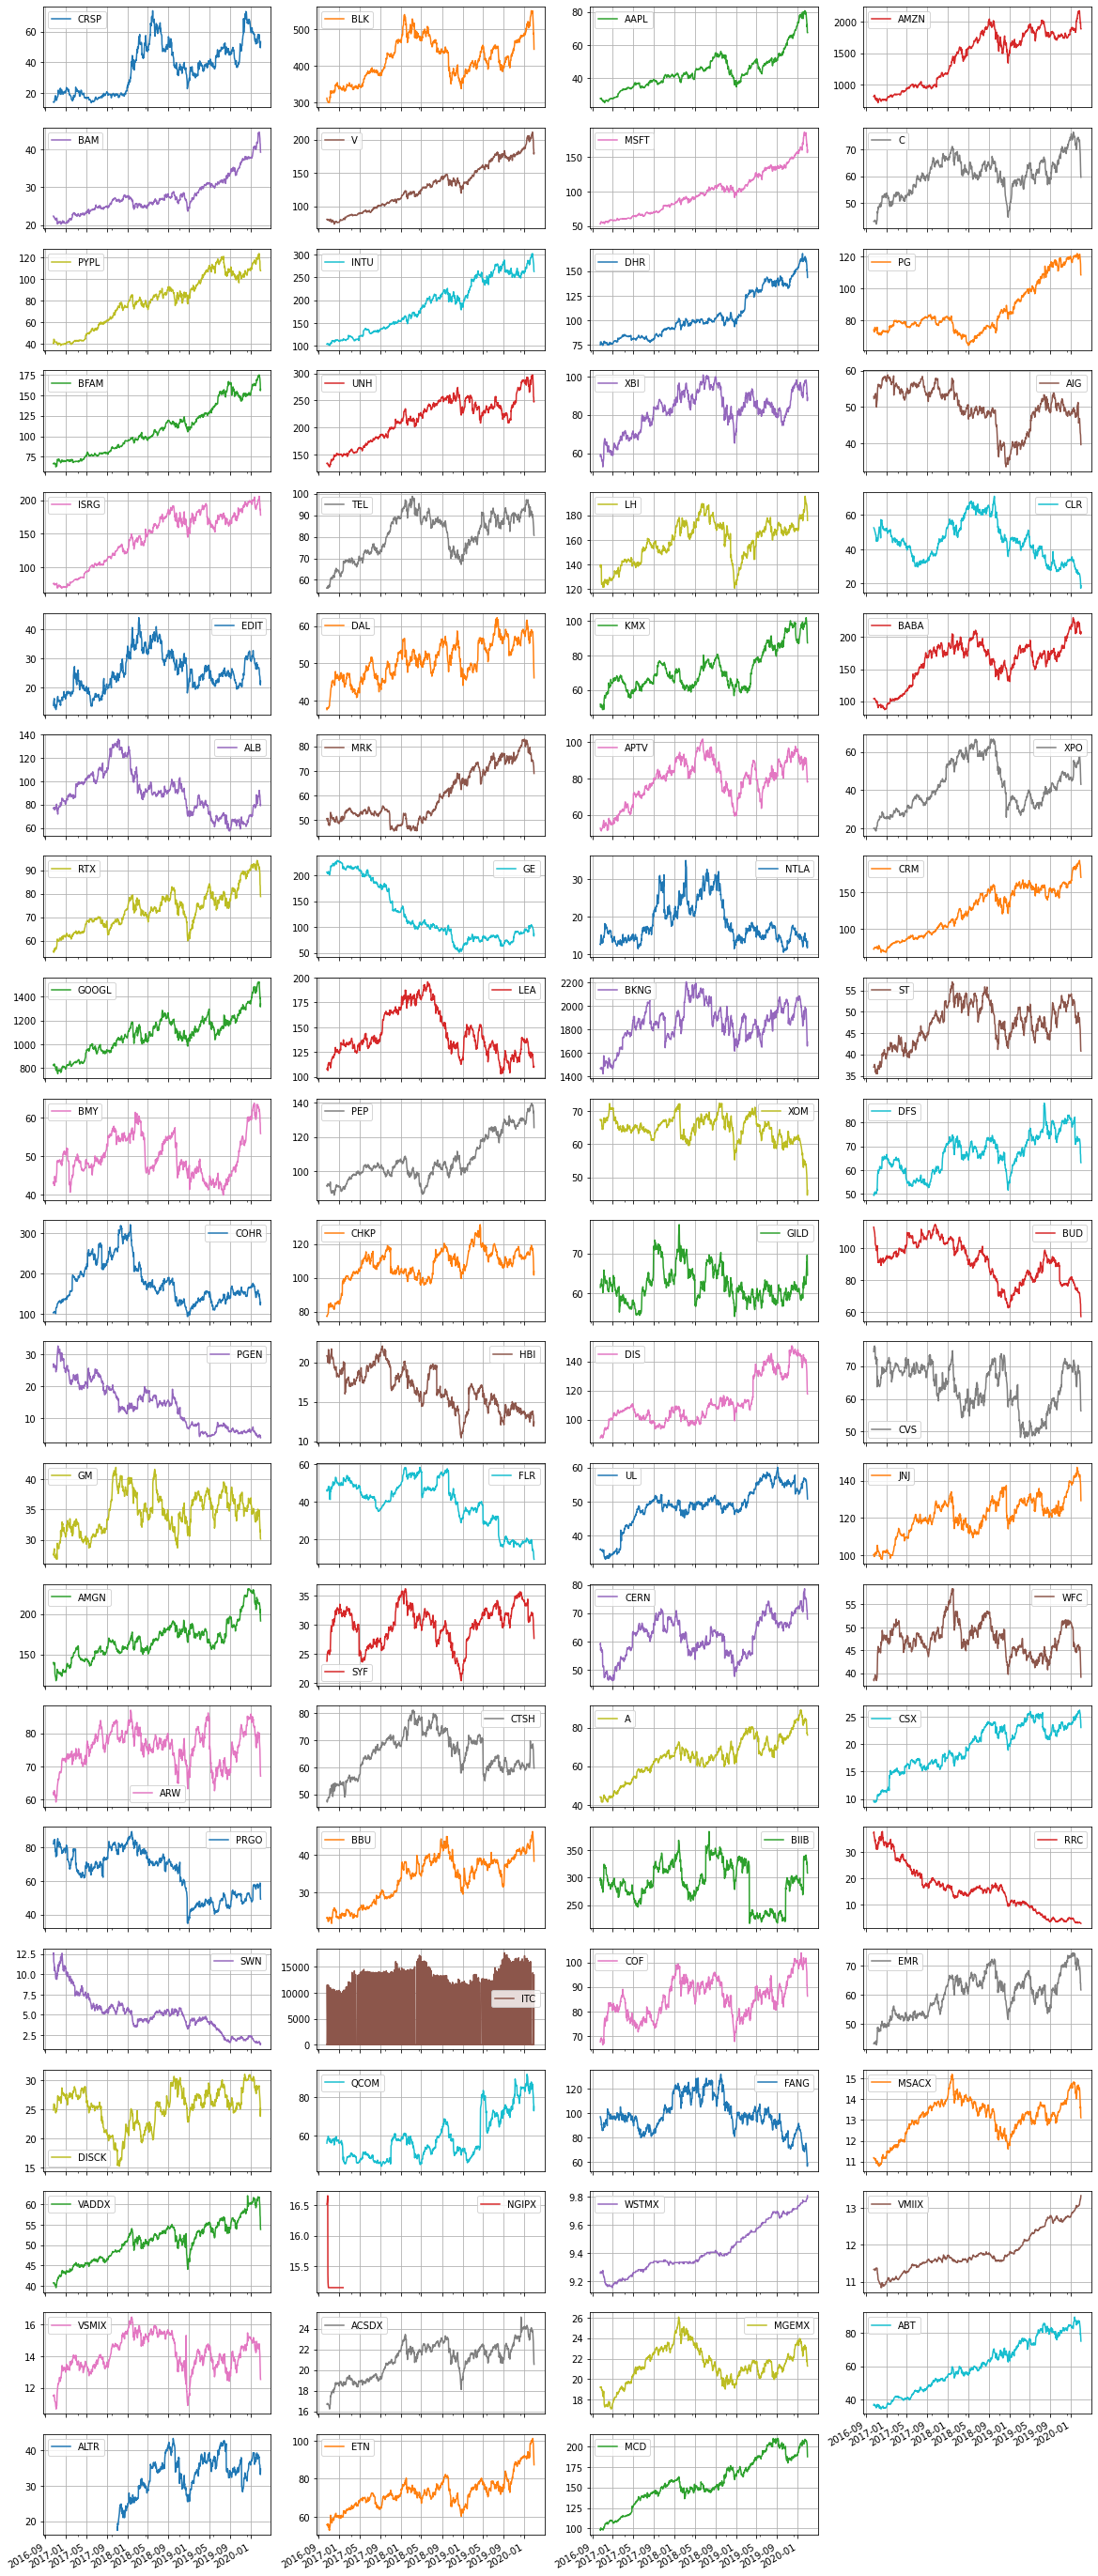

In [ ]:
# plot the stock historical price and data 
prep_data.plot(subplots=True,
        grid=True, 
        layout=(21,4),
        figsize=(20,55))
plt.show() # show the plots

Most of the stock prices decreased since 2020 due to the pandemic. The majority of stocks were affected by the pandemic, but they will increase once the situation gets improved. However, some of them already has declined in the past: **PRGO, HBI, NTLA, SWN, RRC, PGEN, CLR, BUD, FLR.** They might have bad business performance or not have business momentum to grow in the future. We may not include them in our portfolio. We will further examine the effect of COVID-19 by industry and adjust our stock list.

# **The Effect of COVID-19**
---

Since we are looking at the period from January 1, 2015, to March 1, 2020, we want to evaluate the impact of the pandemic on the industries. During the pandemic, a list of companies has filed for Chapter 11 - bankruptcy protection. We will not select the industries or businesses that have been struggling during the pandemic as the companies may need a long period of time to recover their financial health.

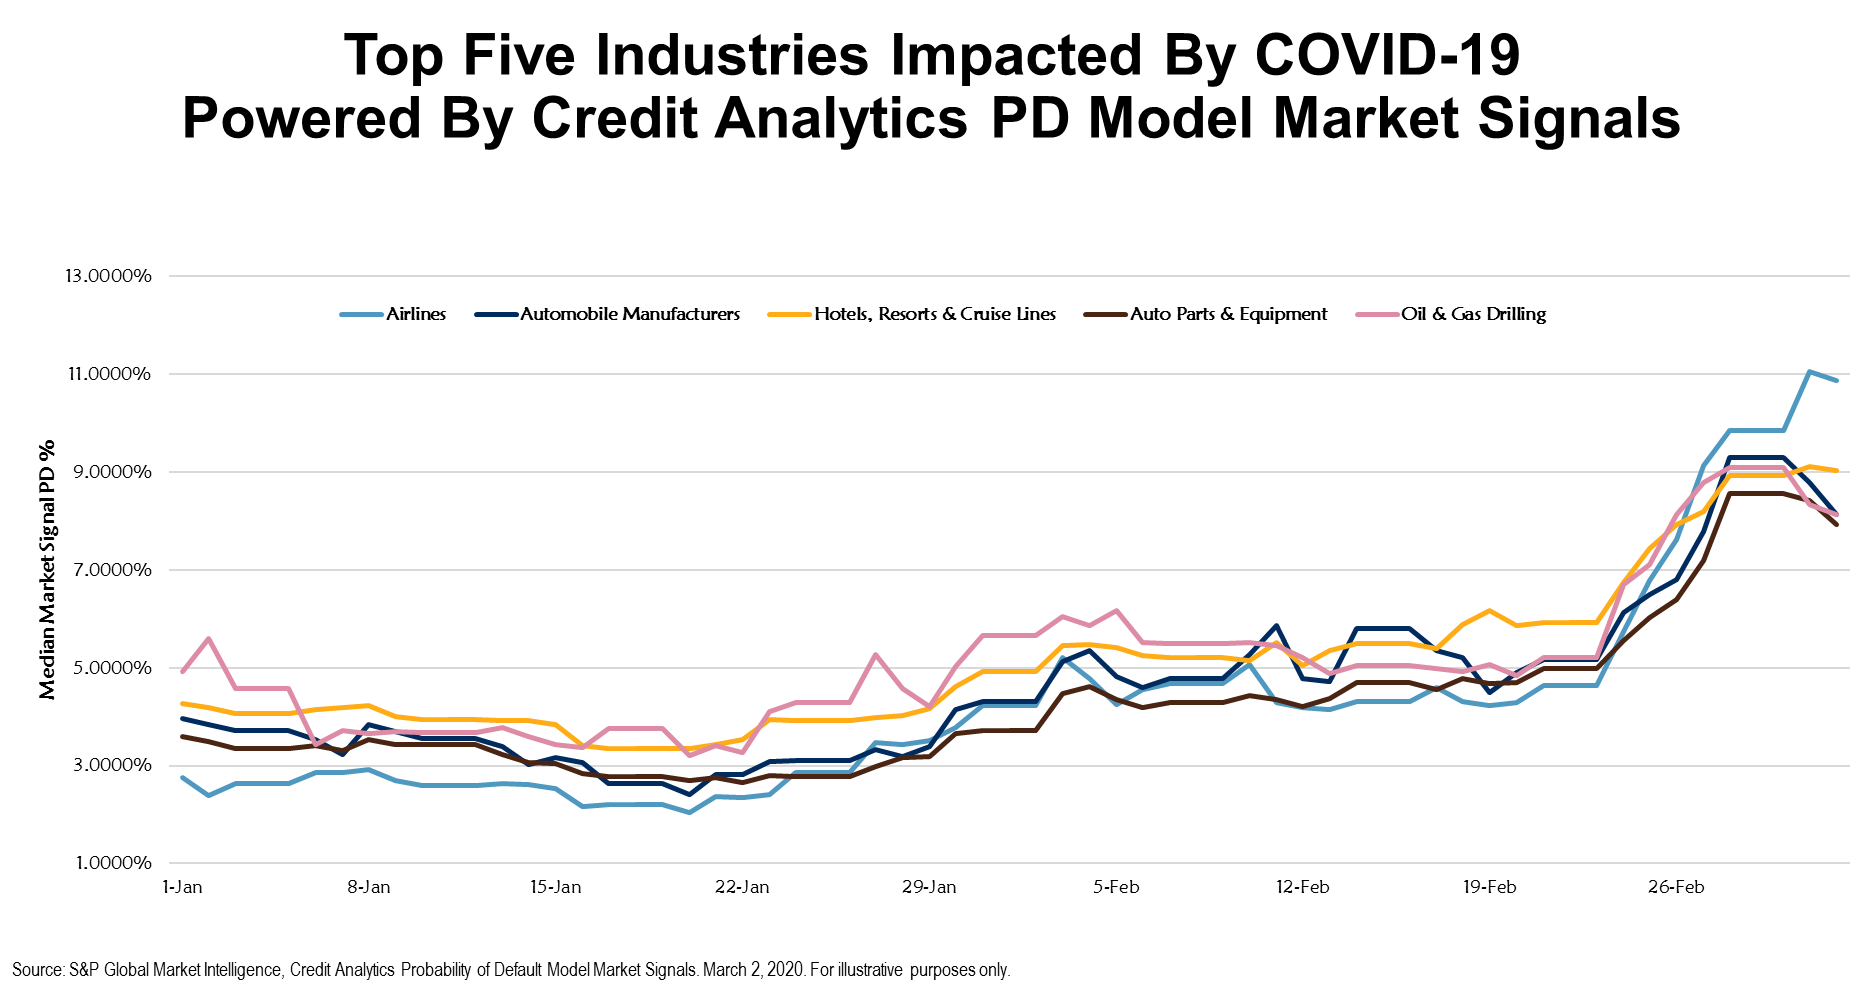

**Reference** - https://www.spglobal.com/marketintelligence/en/news-insights/blog/whats-the-market-sentiment-top-five-industries-impacted-by-covid-19-from-a-probability-of-default-perspective

According to the findings from the S&P Global Intelligence, they generated industry medians by using the Credit Analytics Probability of Default Market Signal model that uses stock price and asset volatility as inputs to calculate a one-year probability of default (PD). This information helps us to understand which industries have experienced significant changes in default risk based on market-derived signals.

We can see that the top 5 industries most impacted by COVID-19 are Airlines, Automobile Manufacturers, Hotels, Resorts & Cruise Line, Auto Parts & Equipment, and Oil & Gas Drilling. The biggest impact is in the Airlines industry. Its median PD is around 2.75% on January 1, 2020, then has been increasing rapidly to around 11% at the end of February.

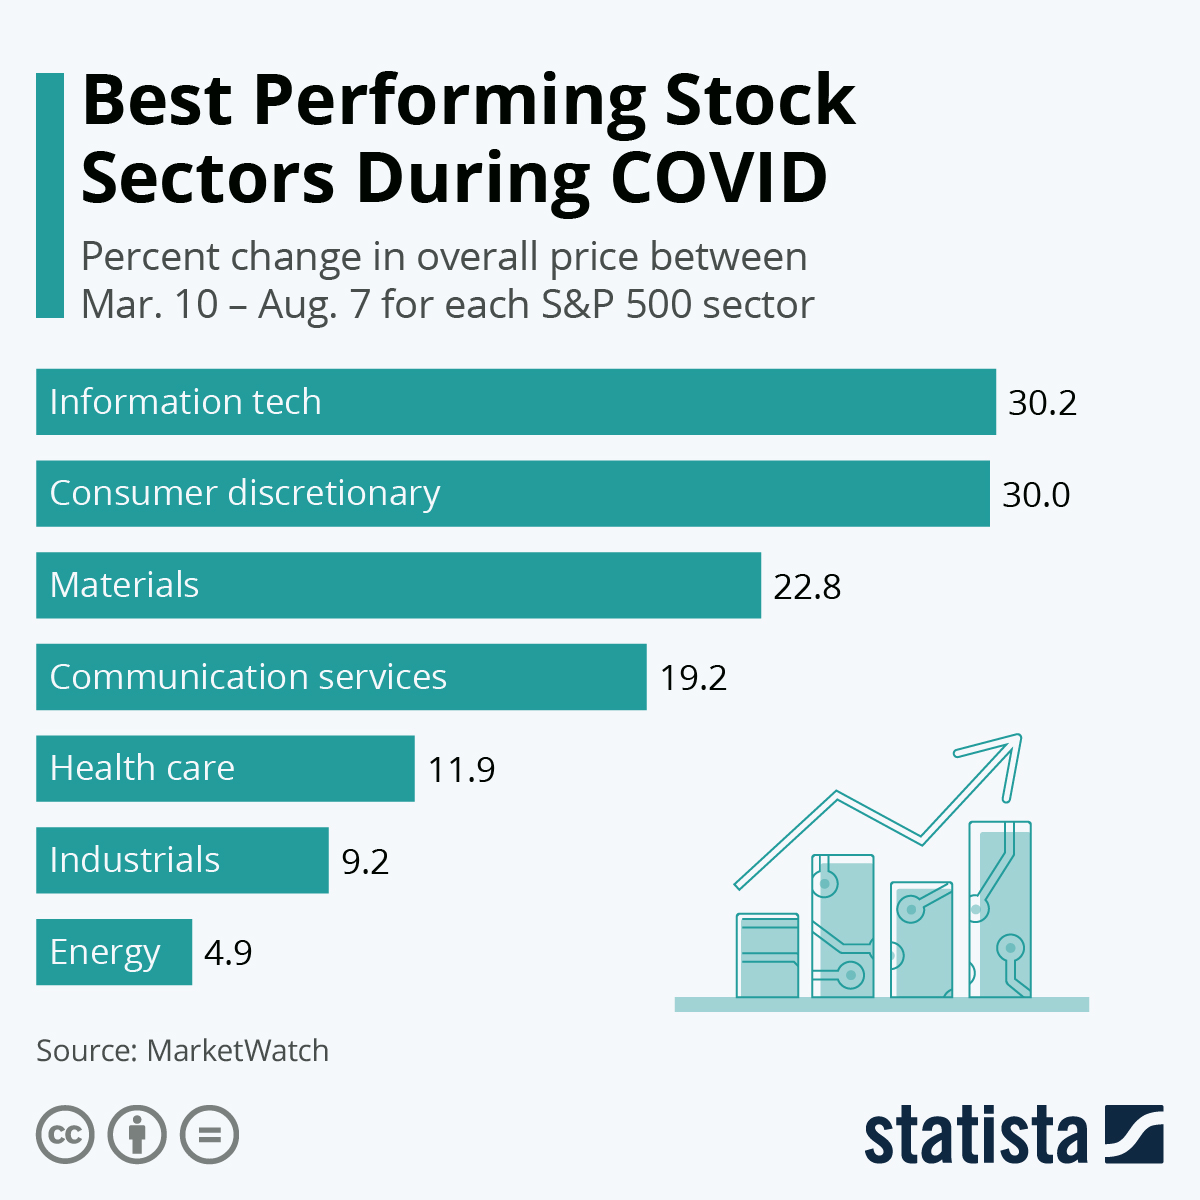

**Reference** - https://www.statista.com/chart/22534/stock-sectors-during-covid/

This finding further reveals that information technology, consumer discretionary, materials, communication services, healthcare, industrials and energy sectors have positive growth in overall stock prices for each S&P 500 sector during COVID-19.

Based on these findings, we will remove those industries that require person-to-person contact and traveling-related industries. We came up with a list of industries that will be removed from our ticker list, including ‘Travel Services’, ‘ Oil & Gas E&P’, ‘Entertainment’, 'Oil & Gas Integrated', 'Beverages—Brewers', 'Auto Parts', 'Airlines', 'Personal Services', 'Apparel Manufacturing', 'Restaurants', 'Railroads', 'Engineering & Construction', and 'Insurance—Diversified'. Also, we will keep our eyes on those stocks with positive growth for the stock selection.

In [ ]:
# the stocks that has decreased from the past
low_stock = ['PRGO', 'HBI', 'NTLA', 'SWN', 'RRC', 'PGEN', 'CLR', 'BUD', 'FLR']

for s in low_stock:
  print(info.loc[info['ticker'] == s,:])

   ticker                                industry      sector
60   PRGO  Drug Manufacturers-Specialty & Generic  Healthcare
   ticker               industry             sector
44    HBI  Apparel Manufacturing  Consumer Cyclical
   ticker       industry      sector
64   NTLA  Biotechnology  Healthcare
   ticker       industry  sector
69    SWN  Oil & Gas E&P  Energy
  ticker       industry  sector
5    RRC  Oil & Gas E&P  Energy
   ticker       industry      sector
33   PGEN  Biotechnology  Healthcare
   ticker       industry  sector
34    CLR  Oil & Gas E&P  Energy
   ticker           industry              sector
47    BUD  Beverages-Brewers  Consumer Defensive
   ticker                    industry       sector
28    FLR  Engineering & Construction  Industrials


Based on the findings from our stock price analysis and the effect of COVID-19, we decided to remove those stocks that may be affected by negative impact and have been decreasing in the past 5 years. We will keep **NTLA, PRGO**, and **PGEN** in our list first as they are biotechnology and drug manufacturing companies. The pandemic may bring a positive impact on these companies and provide business momentum. However, we will further examine their financial health based on their financial statements to come up with the final ticker list.

## **Updating ticker list**

In [ ]:
# remove the industries that may affected by the pandemic negatively
negative = ['Travel Services', 'Oil & Gas E&P', 'Entertainment', 'Oil & Gas Integrated', 'Beverages—Brewers', 'Auto Parts', 'Airlines', 'Personal Services', 'Apparel Manufacturing', 'Restaurants', 'Railroads', 'Engineering & Construction', 'Insurance—Diversified']

remove_list = [] 

for n in negative:
  remove_list.append(info[info['industry'] == n].index)

In [ ]:
remove_list

[Int64Index([59], dtype='int64'),
 Int64Index([5, 7, 34, 69], dtype='int64'),
 Int64Index([3, 56], dtype='int64'),
 Int64Index([24], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([31, 63], dtype='int64'),
 Int64Index([8], dtype='int64'),
 Int64Index([54], dtype='int64'),
 Int64Index([44], dtype='int64'),
 Int64Index([66], dtype='int64'),
 Int64Index([53], dtype='int64'),
 Int64Index([28], dtype='int64'),
 Int64Index([], dtype='int64')]

In [ ]:
# the stocks on the remove list include 'BKNG', 'SWN', 'CLR', 'RRC', 'FANG', 'DIS', 'DISCK', 'XOM', 'BUD', 'APTV', 'LEA', 'DAL', 'BFAM', 'HBI', 'MCD', 'CSX', 'FLR', and 'AIG'
remove = ['BKNG', 'SWN', 'CLR', 'RRC', 'FANG', 'DIS', 'DISCK', 'XOM', 'BUD', 'APTV', 'LEA', 'DAL', 'BFAM', 'HBI', 'MCD', 'CSX', 'FLR', 'AIG']
prep_data.drop(remove, axis=1, inplace=True)

In [ ]:
# show number of our ticker list
len(prep_data.columns)

65

In [ ]:
# show the stock name from the ticker list
prep_data.columns

Index(['CRSP', 'BLK', 'AAPL', 'AMZN', 'BAM', 'V', 'MSFT', 'C', 'PYPL', 'INTU',
       'DHR', 'PG', 'UNH', 'XBI', 'ISRG', 'TEL', 'LH', 'EDIT', 'KMX', 'BABA',
       'ALB', 'MRK', 'XPO', 'RTX', 'GE', 'NTLA', 'CRM', 'GOOGL', 'ST', 'BMY',
       'PEP', 'DFS', 'COHR', 'CHKP', 'GILD', 'PGEN', 'CVS', 'GM', 'UL', 'JNJ',
       'AMGN', 'SYF', 'CERN', 'WFC', 'ARW', 'CTSH', 'A', 'PRGO', 'BBU', 'BIIB',
       'ITC', 'COF', 'EMR', 'QCOM', 'MSACX', 'VADDX', 'NGIPX', 'WSTMX',
       'VMIIX', 'VSMIX', 'ACSDX', 'MGEMX', 'ABT', 'ALTR', 'ETN'],
      dtype='object')

### **Cleaned Ticker List**

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None) # to see all the rows and columns

In [ ]:
# some tickers are ETF and fund
# columns do not have income_statement in yahoo finance
remove_list2 = ['MGEMX', 'VADDX', 'ACSDX', 'MSACX', 'XBI', 'ITC', 'WSTMX', 'VMIIX', 'VSMIX', 'NGIPX']

In [ ]:
# check the number of stocks in the stock list
ticker_list1 = prep_data.columns
ticker_list1 = ticker_list1.tolist()

for item in remove_list2:
  ticker_list1.remove(item)

len(ticker_list1)

55

# **Stock Selection Methodology - Financial Performance Analysis**
---

After conducting the stock price analysis and evaluating the effect of COVID-19, we are going to analyze the financial performance of the companies based on the financial figures from their financial statement. We generated the financial statements from Yahoo Finance and mainly focus on financial items related to Return of Assets (ROA) in 2019.

The ROA is a financial indicator to help us analyze how profitable a company is relative to its total assets. The ROA can be decomposed by profit margin and asset turnover. The formula for calculating the ROA is profit margin multiples asset turnover.

Now, we are going to look at the financial health of those stocks in our final stock list (55 tickers) that eliminated the ETF, funds, unavailable tickers, and industries that may be affected by COVID-19.

**NOTE: We used the codes in the Appendix to generate the financial data. However, Yahoo Finance generated different results every time when we run the codes as the data keeps updating. We check all the results in our codes and only take the financial statements and balance sheets that include the financial data of 2018 and 2019. The codes below may show different results, but we export those data to csv files to get consistent results. It will not affect our EDA part to come up with the top 10 stocks.**

## **Profit Margin Calculation**
---

Profit margin is a profitability ratio calculated as net income divided by sales (or revenue). It measures how much out of every dollar of sales a company keeps in earnings.

### **Revenue Data**

For detailed codes to generate the result, please check the Appendix.

**Drive Source** - https://drive.google.com/file/d/1qXuCdZZplHCZ_qhEYq9SauIXkhNNNBSy/view?usp=sharing

In [ ]:
# step 1: copy & paste the shared link you will get from Google Drive
URL3 = 'https://drive.google.com/file/d/1qXuCdZZplHCZ_qhEYq9SauIXkhNNNBSy/view?usp=sharing'

# step 2: copy & paste the command below (this part of the command is fixed)
fixed_path3 = 'https://drive.google.com/uc?export=download&id='

# step 3: Extract the file ID from the URL3 (this part of the command is fixed)
file_path3 = URL3.split('/')[-2]

# retrieve the CSV data and build a dataframe
revenue_data = pd.read_csv(fixed_path3 + file_path3)
revenue_data.index = ['2019', '2018']

# display first 5 rows
revenue_data.head()

MSFT            V          AAPL           PG          TEL  \
2019  125843000000  22977000000  260174000000  67684000000  13448000000   
2018  110360000000  20609000000  265595000000  66832000000  13988000000   

            INTU          BABA       CRSP          BLK          AMZN  \
2019  6784000000  376844000000  289590000  14539000000  280522000000   
2018  6025000000  250266000000    3124000  14198000000  232887000000   

              BAM            C         PYPL          DHR           UNH  \
2019  71609000000  66068000000  17772000000  17911000000  242155000000   
2018  58489000000  65500000000  15451000000  17049000000  226247000000   

            ISRG           LH      EDIT         ALB          MRK          XPO  \
2019  4478500000  11554800000  20531000  3589427000  46840000000  16648000000   
2018  3724200000  11333400000  31937000  3374950000  42294000000  17279000000   

              RTX           GE      NTLA         GOOGL          ST  \
2019  45349000000  95214000000  43103000  161857000000  3450631000   
2018  34701000000  97012000000  30434000  136819000000  3521627000   

              BMY          PEP         DFS        COHR        CHKP  \
2019  26145000000  67161000000  8228000000  1430640000  1994800000   
2018  22561000000  64661000000  7674000000  1902573000  1916500000   

             GILD       PGEN           CVS            GM           UL  \
2019  22449000000   90722000  255765000000  137237000000  51980000000   
2018  22127000000  151178000  193919000000  147049000000  50982000000   

             AMGN         SYF        CERN          WFC          ARW  \
2019  23362000000  9132000000  5692598000  82458000000  28916847000   
2018  23747000000  7739000000  5366325000  84696000000  29676768000   

             CTSH           A        PRGO          BBU         BIIB  \
2019  16783000000  5163000000  4837400000  43032000000  14377900000   
2018  16125000000  4914000000  4731700000  37168000000  13452900000   

              COF          EMR         QCOM          ABT       ALTR  \
2019  22357000000  18372000000  24273000000  31904000000  458915000   
2018  22220000000  17408000000  22611000000  30578000000  396379000   

              ETN          CRM          JNJ          KMX  
2019  21390000000  17098000000  82059000000  21424087000  
2018  21609000000  13282000000  81581000000  19146000000

In [ ]:
# check the number of stock in the revenue data
len(revenue_data.columns)

55

### **Net Income Data**

For detailed codes to generate the result, please check the Appendix.

**Drive Source** - https://drive.google.com/file/d/16Oi6TSUyO2Ee_27_0c3ujs-9OkI66S97/view?usp=sharing

In [ ]:
# step 1: copy & paste the shared link you will get from Google Drive
URL4 = 'https://drive.google.com/file/d/16Oi6TSUyO2Ee_27_0c3ujs-9OkI66S97/view?usp=sharing'

# step 2: copy & paste the command below (this part of the command is fixed)
fixed_path4 = 'https://drive.google.com/uc?export=download&id='

# step 3: Extract the file ID from the URL4 (this part of the command is fixed)
file_path4 = URL4.split('/')[-2]

# retrieve the CSV data and build a dataframe
netincome_data = pd.read_csv(fixed_path4 + file_path4)
netincome_data.index = ['2019', '2018']

# display first 5 rows
netincome_data.head()

MSFT            V         AAPL          PG         TEL  \
2019  39240000000  12080000000  55256000000  3897000000  1844000000   
2018  16571000000  10301000000  59531000000  9750000000  2565000000   

            INTU         BABA         EMR        QCOM       CRSP         BLK  \
2019  1557000000  87886000000  2306000000  4386000000   66858000  4476000000   
2018  1329000000  64093000000  2203000000 -4964000000 -164981000  4305000000   

             AMZN         BAM            C        PYPL         DHR  \
2019  11588000000  2807000000  19401000000  2459000000  3008000000   
2018  10073000000  3584000000  18045000000  2057000000  2651000000   

              UNH        ISRG         LH       EDIT        ALB         MRK  \
2019  13839000000  1379300000  823800000 -133746000  533228000  9843000000   
2018  11986000000  1127900000  883700000 -109954000  693562000  6220000000   

            XPO         RTX           GE      NTLA        GOOGL         ST  \
2019  419000000  5537000000  -4979000000 -99533000  34343000000  282714000   
2018  422000000  5269000000 -22355000000 -85343000  30736000000  598995000   

             BMY          PEP         DFS       COHR       CHKP        GILD  \
2019  3439000000   7314000000  2957000000   53825000  825700000  5386000000   
2018  4920000000  12515000000  2742000000  247358000  821300000  5455000000   

           PGEN         CVS          GM          UL        AMGN         SYF  \
2019 -322324000  6634000000  6732000000  5625000000  7842000000  3747000000   
2018 -509336000  -594000000  8014000000  9369000000  8394000000  2790000000   

           CERN          WFC        ARW        CTSH           A       PRGO  \
2019  529454000  19549000000 -204087000  1842000000  1071000000  146100000   
2018  630059000  22393000000  716195000  2101000000   316000000  131000000   

           BBU        BIIB         COF         ABT      ALTR         ETN  \
2019  43000000  5888500000  5546000000  3687000000  -7542000  2211000000   
2018  74000000  4430700000  6015000000  2368000000  15535000  2145000000   

             CRM          JNJ        KMX  
2019   126000000  15119000000  888433000  
2018  1110000000  15297000000  842413000

In [ ]:
# check the number of stock in the net income data
len(netincome_data.columns)

55

### **Profit Margin Data**

For detailed codes to generate the result, please check the Appendix.

In [ ]:
# calculate the profit margin by using net income and revenue
profit_margin = netincome_data/ revenue_data
profit_margin = profit_margin.T # transpose the data
profit_margin.reset_index(level=0, inplace=True) # reset index to get the ticker column
profit_margin.columns = ['ticker', '2018', '2019'] # rename the columns

In [ ]:
# convert the columns to numeric
cols = profit_margin.columns.drop('ticker') # convert all of them except ticker
profit_margin[cols] = profit_margin[cols].apply(pd.to_numeric, errors='coerce') # convert to numeric
profit_margin.sort_values('2019', ascending=False, inplace=True) # sort the values based on 2019 figures
profit_margin.head(10) # show the top 10 stocks

ticker      2018      2019
52      V  0.525743  0.499830
16   CHKP  0.413926  0.428542
48    SYF  0.410315  0.360512
23    DFS  0.359383  0.357310
5    AMGN  0.335673  0.353476
11   BIIB  0.409552  0.329349
12    BLK  0.307862  0.303212
33   ISRG  0.307983  0.302857
14      C  0.293652  0.275496
17    COF  0.248065  0.270702

In [ ]:
# check the data after conversion
profit_margin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 52 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  55 non-null     object 
 1   2018    55 non-null     float64
 2   2019    55 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


Based on the figures from the profit margin table, Visa (ticker: V) had the best profit margin ratio among other companies in the list. It had a net income of $\$0.4998$ for each dollar of total revenue earned in 2019. Compared to the prior year, Visa had a $52.57\%$ profit margin in 2018. This means Visa generated a net income of $\$0.4998$ and $\$0.5257$ for each dollar of total revenue in 2019 and 2018. When we take a closer look at it, Check Point Software Technology (ticker: CHKP) only had a $42.85\%$ and $41.39\%$ profit margin for 2019 and 2018, while Synchrony Financial (ticker: SYF) had a $36.05\%$ and $41.03\%$ profit margin for 2019 and 2018.

## **Asset Turnover Calculation**
---

The asset turnover ratio is an indicator of the efficiency with which a company is deploying its assets in generating revenue. The formula for calculating asset turnover is net sales divided by total assets.

### **Total Assets Data**

For detailed codes to generate the result, please check the Appendix.

**Drive Source** - https://drive.google.com/file/d/1W8o7jyuYa0lpCBDOV9c7UF12be7cdmjQ/view?usp=sharing

In [ ]:
# step 1: copy & paste the shared link you will get from Google Drive
URL5 = 'https://drive.google.com/file/d/1W8o7jyuYa0lpCBDOV9c7UF12be7cdmjQ/view?usp=sharing'

# step 2: copy & paste the command below (this part of the command is fixed)
fixed_path5 = 'https://drive.google.com/uc?export=download&id='

# step 3: Extract the file ID from the URL5 (this part of the command is fixed)
file_path5 = URL5.split('/')[-2]

# Retrieve the CSV data and build a dataframe
totalassets_data = pd.read_csv(fixed_path5 + file_path5)
totalassets_data.index = ['2019', '2018']

# display first 5 rows
totalassets_data.head()

MSFT             V          AAPL            PG           TEL  \
2019  286556000000  7.257400e+10  338516000000  1.150950e+11  1.969400e+10   
2018  258848000000  6.922500e+10  365725000000  1.183100e+11  2.038600e+10   

              INTU          BABA          CRSP           BLK          AMZN  \
2019  6.283000e+09  9.650760e+11  1.066752e+09  1.686220e+11  225248000000   
2018  5.134000e+09  7.171240e+11  4.890160e+08  1.595730e+11  162648000000   

               BAM             C          PYPL           DHR           UNH  \
2019  323969000000  1.951158e+12  5.133300e+10  6.208200e+10  1.738890e+11   
2018  256281000000  1.917383e+12  4.333200e+10  4.783250e+10  1.522210e+11   

              ISRG            LH         EDIT         ALB           MRK  \
2019  9.733200e+09  1.804640e+10  508885000.0  9860863000  8.439700e+10   
2018  7.846700e+09  1.618530e+10  420386000.0  7581674000  8.263700e+10   

               XPO           RTX            GE         NTLA         GOOGL  \
2019  1.412800e+10  1.396150e+11  2.651770e+11  334280000.0  2.759090e+11   
2018  1.227000e+10  1.342110e+11  3.110720e+11  347315000.0  2.327920e+11   

                ST           BMY           PEP           DFS          COHR  \
2019  6.834519e+09  1.299440e+11  7.854700e+10  1.139960e+11  2.083169e+09   
2018  6.797687e+09  3.498600e+10  7.764800e+10  1.095530e+11  2.259969e+09   

              CHKP         GILD         PGEN           CVS            GM  \
2019  5.764900e+09  61627000000  455763000.0  222449000000  2.280370e+11   
2018  5.828200e+09  63675000000  716177000.0  196456000000  2.273390e+11   

               UL         AMGN           SYF          CERN           WFC  \
2019  64806000000  59707000000  1.048260e+11  6.894622e+09  1.927555e+12   
2018  61111000000  66416000000  1.067920e+11  6.708636e+09  1.895883e+12   

               ARW         CTSH             A          PRGO          BBU  \
2019  1.640080e+10  16204000000  9.452000e+09  1.130140e+10  51751000000   
2018  1.778444e+10  15846000000  8.541000e+09  1.098340e+10  27318000000   

              BIIB           COF          EMR          QCOM          ABT  \
2019  2.723430e+10  3.903650e+11  20497000000  3.295700e+10  67887000000   
2018  2.528890e+10  3.725380e+11  20390000000  3.271800e+10  67173000000   

             ALTR          ETN           CRM           JNJ          KMX  
2019  743145000.0  32805000000  5.512600e+10  157728000000  21082182000  
2018  487197000.0  31092000000  3.073700e+10  152954000000  18717867000

In [ ]:
# check the number of stock in the totalassets data
len(totalassets_data.columns)

55

In [ ]:
# calculate the asset turnover by using revenue and total assets
asset_turnover = revenue_data/ totalassets_data
asset_turnover = asset_turnover.T # transpose the data
asset_turnover.reset_index(level=0, inplace=True) # reset index to get the ticker column
asset_turnover.columns = ['ticker', '2018', '2019'] # rename the columns

In [ ]:
# convert the columns to numeric
cols = asset_turnover.columns.drop('ticker') # convert all of them except ticker
asset_turnover[cols] = asset_turnover[cols].apply(pd.to_numeric, errors='coerce') # convert to numeric
asset_turnover.sort_values('2019', ascending=False, inplace=True) # sort the values based on 2019 figures
asset_turnover.head(10) # show the top 10 stocks

ticker      2018      2019
40    ARW  1.763137  1.668692
14    UNH  1.392584  1.486306
9    AMZN  1.245392  1.431847
20    XPO  1.178369  1.408231
44    BBU  0.831520  1.360568
5    INTU  1.079739  1.173549
54    KMX  1.016218  1.022873
41   CTSH  1.035732  1.017607
33    CVS  1.149769  0.987086
47    EMR  0.896326  0.853752

In [ ]:
# check the data after conversion
asset_turnover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 40 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  55 non-null     object 
 1   2018    55 non-null     float64
 2   2019    55 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


For every dollar in assets, Arrow Electronics (ticker: ARW) generated $\$1.67$ and $\$1.76$ respectively in sales in 2019 and 2018. However, United Health Group (ticker: UNH) and Amazon (ticker: AMZN) are following Arrow Electronics based on the asset turnover ratio in 2019. United Health's asset turnover ratios for 2019 and 2018 were $1.49$ and $1.39$ and Amazon's asset turnover ratios for 2019 and 2018 were $1.43$ and $1.25$.

## **Return on Assets (ROA) Calculation**
---

As we mentioned before, ROA is an indicator of how profitable a company is relative to its total assets. It provides a better understanding of C-suite management and stakeholders about how efficiently a company's management uses its assets to generate earnings.

Since some companies have higher profit margin ratios and some companies have higher asset turnover ratios, we balanced both ratios, in terms of ROA, to select our stocks that have a reasonable profit margin and asset turnover.

In [ ]:
# calculate the ROA by using net income and total assets and convert to %
ROA = netincome_data/ totalassets_data * 100
ROA = ROA.T # transpose the data
ROA.reset_index(level=0, inplace=True) # reset the index
ROA.columns = ['ticker', '2018', '2019'] # rename the columns

In [ ]:
# convert the columns to numeric
cols = ROA.columns.drop('ticker') # convert all of them except ticker
ROA[cols] = ROA[cols].apply(pd.to_numeric, errors='coerce') # convert to numeric
ROA.sort_values('2019', ascending=False, inplace=True) # sort the values based on 2019 figures
ROA.head(10) # show the top 10 stocks

ticker       2018       2019
32   INTU  24.781155  25.886249
11   BIIB  21.621632  17.520335
1    AAPL  16.323010  16.277531
40    PEP   9.311622  16.117608
50     UL   8.679752  15.331119
52      V  16.645080  14.880462
33   ISRG  14.171085  14.374196
16   CHKP  14.322885  14.091829
13    BMY   2.646525  14.062768
21   CTSH  11.367564  13.258867

In [ ]:
# check the data after conversion
ROA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 32 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  55 non-null     object 
 1   2018    55 non-null     float64
 2   2019    55 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


Based on the financial performance in 2019 of these stocks in James's portfolio by analyzing their ROA, we can see that **INTU** has the highest ROA ratio in 2019. That means this company is the most efficient one to use its assets to generate earnings among others.

# **Exploratory Data Analysis**

## **EDA 1: James's Portfolio Investment by Sector & Industry**
---

In order to explore the sector that he has mainly invested from 2015 to 2020, we extract the sector and industry data and match them with an appropriate sector and industry. It helps us to explore the diversity of investment in his portfolio and his trading interests.

### **EDA 1 - Subplot 1: James's Portfolio Investment by Sector**

In [ ]:
# group the data by sector and count the frequency of his transactions
sector_plot = df_info.groupby('sector').count().reset_index().sort_values('ticker', ascending=False)
sector_plot

sector  transaction_date  ticker  asset_description  type  \
6              Healthcare                46      46                 46    46   
5      Financial Services                32      32                 32    32   
8              Technology                29      29                 29    29   
2       Consumer Cyclical                27      27                 27    27   
7             Industrials                21      21                 21    21   
4                  Energy                15      15                 15    15   
3      Consumer Defensive                 9       9                  9     9   
1  Communication Services                 5       5                  5     5   
0         Basic Materials                 2       2                  2     2   

   amount  new_amount  industry  
6      46          46        46  
5      32          32        32  
8      29          29        29  
2      27          27        27  
7      21          21        21  
4      15          15        15  
3       9           9         9  
1       5           5         5  
0       2           2         2

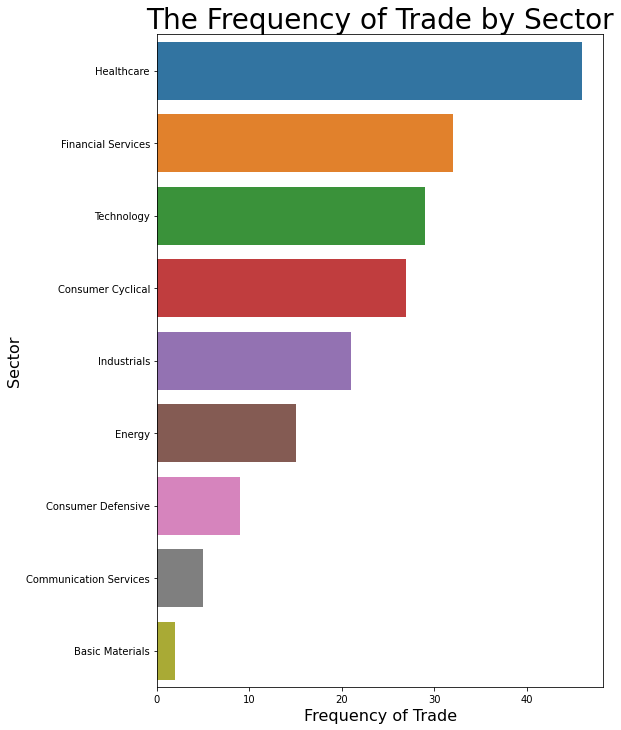

In [ ]:
# plot the bar chart by sector
plt.figure(figsize=(8,12)) # set the plot size
sns.barplot(x='ticker', y='sector', data=sector_plot) # plot the bar chart
plt.title('The Frequency of Trade by Sector', fontsize=28) # set the title for this plot
plt.xlabel('Frequency of Trade', fontsize=16) # xlabel
plt.ylabel('Sector', fontsize=16) # ylabel
plt.show() # show plot

The S&P sectors can be divided into 11 sectors based on their size, including information technology, health care, financials, consumer discretionary, communication service, industrials, consumer staples, energy, utilities, real estate, and materials. This bar plot shows us the diversity of James's investment portfolio that has 9 GICS sectors out of 11 sectors.

He has traded 46 times in the healthcare industry which is the highest among other sectors. The financial services sector is the second-highest among sectors that is 32 times. However, he has the least interest in the basic materials sector as he has only traded 2 times from 2015 to 2020. Although he has a strong interest in the healthcare industry, his investment portfolio is still diversified and the risks could be minimized if certain sector collapses.

Based on our analysis of the impact of COVID-19, we find an interesting fact. The technology and healthcare sectors have a positive growth during the pandemic. If James is still holding these stocks related to the these sectors, he should get a decent amount of profit.

### **EDA 1 - Subplot 2: James's Portfolio Investment by Industry**

In [ ]:
# group the data by industry and count the frequency of his transactions
industry_plot = df_info.groupby('industry').count().reset_index().sort_values('ticker', ascending=False)
industry_plot

industry  transaction_date  ticker  \
15              Drug Manufacturers-General                15      15   
31                           Oil & Gas E&P                13      13   
13                         Credit Services                12      12   
10                           Biotechnology                11      11   
3                         Asset Management                11      11   
41          Specialty Industrial Machinery                 9       9   
39                 Software-Infrastructure                 8       8   
7                        Banks-Diversified                 7       7   
14                  Diagnostics & Research                 7       7   
28                         Internet Retail                 6       6   
6                               Auto Parts                 6       6   
23           Household & Personal Products                 6       6   
22                        Healthcare Plans                 6       6   
38                    Software-Application                 5       5   
36      Scientific & Technical Instruments                 5       5   
4                 Auto & Truck Dealerships                 4       4   
12                    Consumer Electronics                 4       4   
26          Integrated Freight & Logistics                 4       4   
20                           Entertainment                 3       3   
1                                 Airlines                 3       3   
42                         Travel Services                 3       3   
33                       Personal Services                 3       3   
30          Medical Instruments & Supplies                 2       2   
32                    Oil & Gas Integrated                 2       2   
40                     Specialty Chemicals                 2       2   
27          Internet Content & Information                 2       2   
21             Health Information Services                 2       2   
25                   Insurance-Diversified                 2       2   
24         Information Technology Services                 2       2   
19              Engineering & Construction                 2       2   
18     Electronics & Computer Distribution                 2       2   
17                   Electronic Components                 2       2   
16  Drug Manufacturers-Specialty & Generic                 2       2   
8                        Beverages-Brewers                 2       2   
5                       Auto Manufacturers                 2       2   
2                    Apparel Manufacturing                 2       2   
29                         Medical Devices                 1       1   
34                               Railroads                 1       1   
35                             Restaurants                 1       1   
11                           Conglomerates                 1       1   
37                          Semiconductors                 1       1   
9                  Beverages-Non-Alcoholic                 1       1   
0                      Aerospace & Defense                 1       1   

    asset_description  type  amount  new_amount  sector  
15                 15    15      15          15      15  
31                 13    13      13          13      13  
13                 12    12      12          12      12  
10                 11    11      11          11      11  
3                  11    11      11          11      11  
41                  9     9       9           9       9  
39                  8     8       8           8       8  
7                   7     7       7           7       7  
14                  7     7       7           7       7  
28                  6     6       6           6       6  
6                   6     6       6           6       6  
23                  6     6       6           6       6  
22                  6     6       6           6       6  
38                  5     5       5           5      

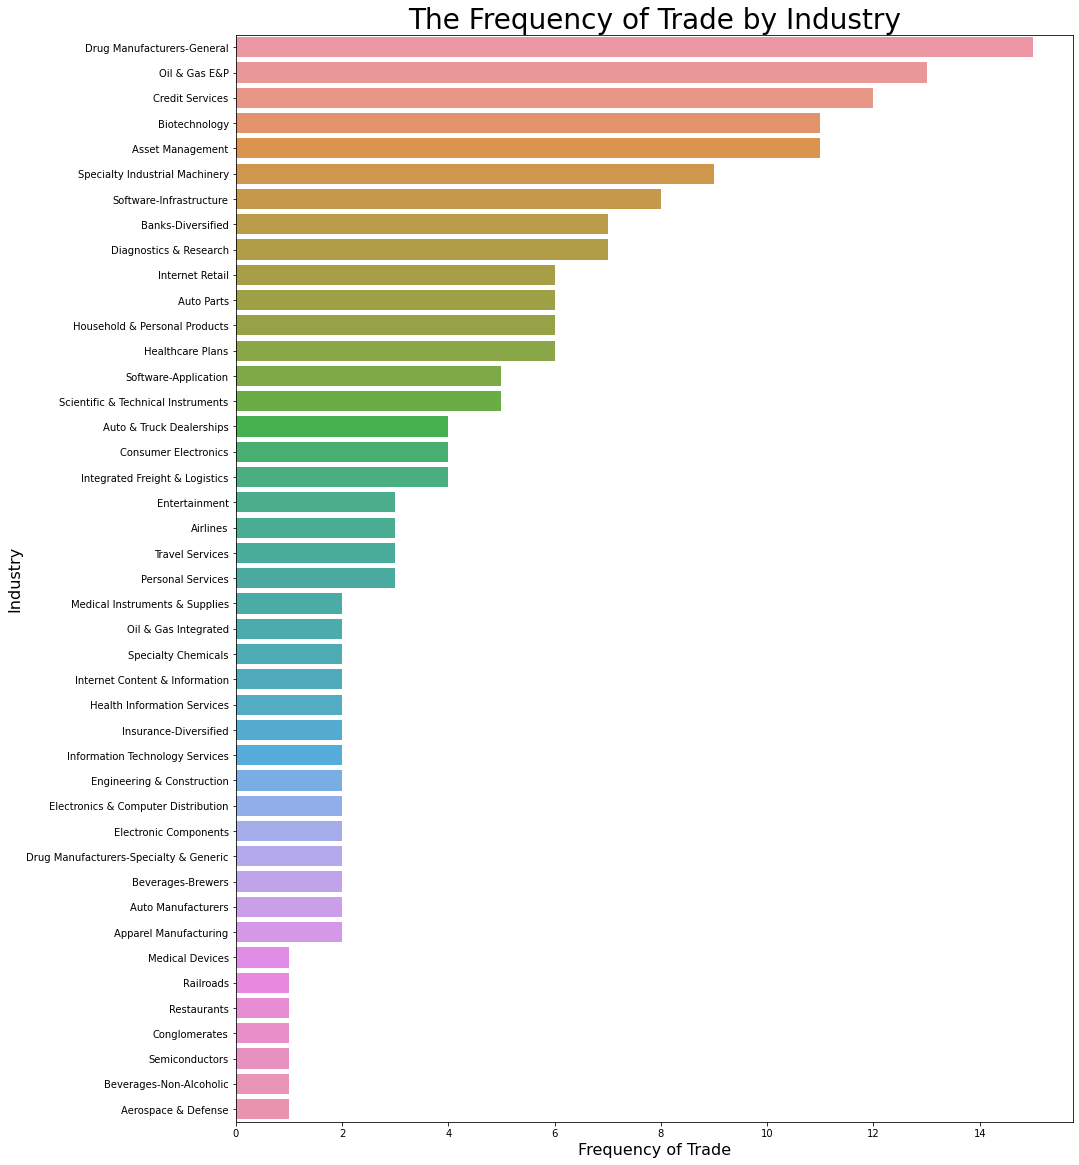

In [ ]:
# plot the bar chart by industry
plt.figure(figsize=(15,20)) # set the plot size
sns.barplot(x='ticker', y='industry', data=industry_plot) # plot the bar chart
plt.title('The Frequency of Trade by Industry', fontsize=28) # set the title for this plot
plt.xlabel('Frequency of Trade', fontsize=16) # xlabel
plt.ylabel('Industry', fontsize=16) # ylabel
plt.show() # show plot

After getting an insight from the diversity of his portfolio and investment interests by sector, we are going to take a closer look at his investment by industry. This barplot tells us that he has traded the top five industries are drug manufacturers, oil and gas, credit services, biotechnology, and asset management. Based on the result from subplot 1, there is no surprise that he mostly invested in drug manufacturers and biotechnology industries. However, financial services is the second-highest sector that he has been traded. We can see that the credit service and asset management industries are the top five industries that he has frequently traded.

## **EDA 2: Trade In Patterns by Month from 2015 to 2020**

Before creating the plot, we did feature engineering to convert the time variable, `transaction_date`, to the correct format and extract the Month and Year variable. It helps us to explore the the monthly trade in pattern in James's investment portfolio.

In [ ]:
# show the trade in data only in terms of purchase
trade_in = df.copy()
trade_in = trade_in[trade_in['type'] == 'Purchase']
trade_in.head()

transaction_date ticker                   asset_description      type  \
3153       12/31/2018    XBI            SPDR S&amp;P Biotech ETF  Purchase   
3155       12/27/2018    TEL                TE Connectivity Ltd.  Purchase   
3253       12/11/2018    RTX                    Raytheon Company  Purchase   
3380       11/05/2018    AIG  American International Group, Inc.  Purchase   
3382       10/25/2018    XPO                 XPO Logistics, Inc.  Purchase   

                  amount  new_amount  
3153   $15,001 - $50,000     50000.0  
3155  $50,001 - $100,000    100000.0  
3253  $50,001 - $100,000    100000.0  
3380  $50,001 - $100,000    100000.0  
3382  $50,001 - $100,000    100000.0

In [ ]:
# convert it to the right format to show date
trade_in['transaction_date'] = pd.to_datetime(trade_in.transaction_date)
trade_in.head() # show the first 5 rows

transaction_date ticker                   asset_description      type  \
3153       2018-12-31    XBI            SPDR S&amp;P Biotech ETF  Purchase   
3155       2018-12-27    TEL                TE Connectivity Ltd.  Purchase   
3253       2018-12-11    RTX                    Raytheon Company  Purchase   
3380       2018-11-05    AIG  American International Group, Inc.  Purchase   
3382       2018-10-25    XPO                 XPO Logistics, Inc.  Purchase   

                  amount  new_amount  
3153   $15,001 - $50,000     50000.0  
3155  $50,001 - $100,000    100000.0  
3253  $50,001 - $100,000    100000.0  
3380  $50,001 - $100,000    100000.0  
3382  $50,001 - $100,000    100000.0

In [ ]:
# extract Month and Year from the datetime variable
trade_in['Year'] = trade_in['transaction_date'].dt.year # extract the Year
trade_in['Month'] = trade_in['transaction_date'].dt.month # extract the Month
trade_in.head(30) # show first 30 rows

transaction_date ticker                   asset_description      type  \
3153       2018-12-31    XBI            SPDR S&amp;P Biotech ETF  Purchase   
3155       2018-12-27    TEL                TE Connectivity Ltd.  Purchase   
3253       2018-12-11    RTX                    Raytheon Company  Purchase   
3380       2018-11-05    AIG  American International Group, Inc.  Purchase   
3382       2018-10-25    XPO                 XPO Logistics, Inc.  Purchase   
3383       2018-10-25   ISRG            Intuitive Surgical, Inc.  Purchase   
3385       2018-10-17    ALB               Albemarle Corporation  Purchase   
3520       2018-10-10     GE            General Electric Company  Purchase   
3523       2018-10-08   APTV                           Aptiv PLC  Purchase   
3658       2018-08-16   INTU                         Intuit Inc.  Purchase   
3660       2018-07-26    DHR                 Danaher Corporation  Purchase   
3721       2018-07-12   CELG                 Celgene Corporation  Purchase   
3745       2018-06-28    LEA                    Lear Corporation  Purchase   
3746       2018-06-28   APTV                           Aptiv PLC  Purchase   
4272       2018-02-22    XPO                 XPO Logistics, Inc.  Purchase   
4274       2018-02-22   CELG                 Celgene Corporation  Purchase   
4276       2018-02-09   MSFT               Microsoft Corporation  Purchase   
4277       2018-02-09    KMX                         CarMax Inc.  Purchase   
4278       2018-01-25    KMX                         CarMax Inc.  Purchase   
4421       2017-12-26    DAL               Delta Air Lines, Inc.  Purchase   
4422       2018-01-11    UNH     UnitedHealth Group Incorporated  Purchase   
4525       2017-11-13    XOM             Exxon Mobil Corporation  Purchase   
4620       2017-10-23   PYPL               PayPal Holdings, Inc.  Purchase   
4623       2017-10-23   BABA       Alibaba Group Holding Limited  Purchase   
4624       2017-10-19   NTLA          Intellia Therapeutics Inc.  Purchase   
4625       2017-10-19   EDIT               Editas Medicine, Inc.  Purchase   
4626       2017-10-19   CRSP              CRISPR Therapeutics AG  Purchase   
4627       2017-10-17    BLK                     BlackRock, Inc.  Purchase   
4629       2017-10-12   COHR                      Coherent, Inc.  Purchase   
4894       2017-09-15    CVS              CVS Health Corporation  Purchase   

                   amount  new_amount  Year  Month  
3153    $15,001 - $50,000     50000.0  2018     12  
3155   $50,001 - $100,000    100000.0  2018     12  
3253   $50,001 - $100,000    100000.0  2018     12  
3380   $50,001 - $100,000    100000.0  2018     11  
3382   $50,001 - $100,000    100000.0  2018     10  
3383    $15,001 - $50,000     50000.0  2018     10  
3385    $15,001 - $50,000     50000.0  2018     10  
3520   $50,001 - $100,000    100000.0  2018     10  
3523    $15,001 - $50,000     50000.0  2018     10  
3658   $50,001 - $100,000    100000.0  2018      8  
3660   $50,001 - $100,000    100000.0  2018      7  
3721    $15,001 - $50,000     50000.0  2018      7  
3745    $15,001 - $50,000     50000.0  2018      6  
3746    $15,001 - $50,000     50000.0  2018      6  
4272   $50,001 - $100,000    100000.0  2018      2  
4274   $50,001 - $100,000    100000.0  2018      2  
4276    $15,001 - $50,000     50000.0  2018      2  
4277    $15,001 - $50,000     50000.0  2018      2  
4278   $50,001 - $100,000    100000.0  2018      1  
4421  $100,001 - $250,000    250000.0  2017     12  
4422   $50,001 - $100,000    100000.0  2018      1  
4525   $50,001 - $100,000    100000.0  2017     11  
4620    $15,001 - $50,000     50000.0  2017     10  
4623    $15,001 - $50,000     50000.0  2017     10  
4624    $15,001 - $50,000     50000.0  2017     10  
4625    $15,001 - $50,000     50000.0  2017     10  
4626    $15,001 - $50,000     50000.0  2017     10  
4627    $15,001 - $50,000     50000.0  2017     10  
4629     $1,001 - $15,000     15000.0  2017     1

In [ ]:
# check the trade record of Year
trade_in['Year'].unique()

array([2018, 2017, 2016, 2015])

In [ ]:
# subset all rows into different years to explore the trade pattern
year_2015 = trade_in[trade_in['Year'] == 2015]
year_2016 = trade_in[trade_in['Year'] == 2016]
year_2017 = trade_in[trade_in['Year'] == 2017]
year_2018 = trade_in[trade_in['Year'] == 2018]

In [ ]:
# count the frequency of trading by month
trade_2015 = year_2015.groupby('Month')["ticker"].count().reset_index().sort_values('ticker', ascending=False) # count the ticker for each month
trade_2015 = pd.DataFrame(trade_2015) # set in the dataframe

trade_2016 = year_2016.groupby('Month')["ticker"].count().reset_index().sort_values('ticker', ascending=False) # count the ticker for each month
trade_2016 = pd.DataFrame(trade_2016) # set in the dataframe

trade_2017 = year_2017.groupby('Month')["ticker"].count().reset_index().sort_values('ticker', ascending=False) # count the ticker for each month
trade_2017 = pd.DataFrame(trade_2017) # set in the dataframe

trade_2018 = year_2018.groupby('Month')["ticker"].count().reset_index().sort_values('ticker', ascending=False) # count the ticker for each month
trade_2018 = pd.DataFrame(trade_2018) # set in the dataframe

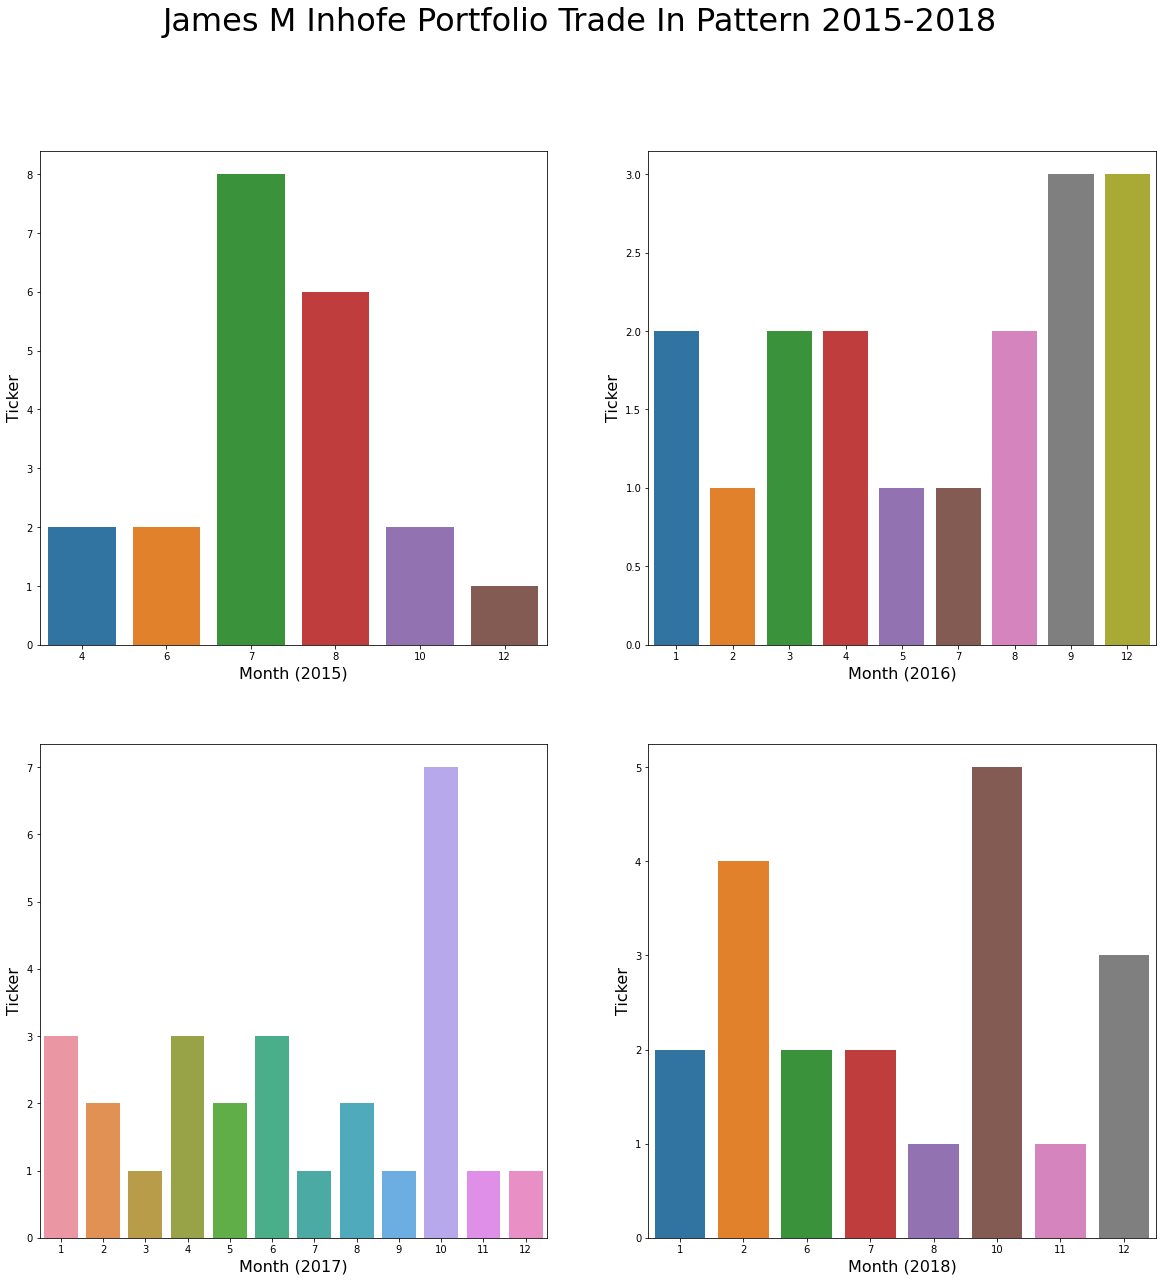

In [ ]:
# plot the portfolio trade pattern from 2015 to 2018
fig, axes = plt.subplots(2, 2, figsize=(20, 20)) # create subplot (2 rows and 3 columns)
fig.suptitle('James M Inhofe Portfolio Trade In Pattern 2015-2018', fontsize=32) # set the title for this plot
 
sns.barplot(ax=axes[0, 0], data=trade_2015, x=trade_2015['Month'], y=trade_2015['ticker'], ci=None) # plot the barplot 1 - 2015 trade pattern
axes[0, 0].set_xlabel('Month (2015)', fontsize=16) # x label
axes[0, 0].set_ylabel('Ticker', fontsize=16) # y label
 
sns.barplot(ax=axes[0, 1], data=trade_2016, x=trade_2016['Month'], y=trade_2016['ticker'], ci=None) # plot the barplot 2 - 2016 trade pattern
axes[0, 1].set_xlabel('Month (2016)', fontsize=16) # x label
axes[0, 1].set_ylabel('Ticker', fontsize=16) # y label
 
sns.barplot(ax=axes[1, 0], data=trade_2017, x=trade_2017['Month'], y=trade_2017['ticker'], ci=None) # plot the barplot 3 - 2017 trade pattern
axes[1, 0].set_xlabel('Month (2017)', fontsize=16) # x label
axes[1, 0].set_ylabel('Ticker', fontsize=16) # y label
 
sns.barplot(ax=axes[1, 1], data=trade_2018, x=trade_2018['Month'], y=trade_2018['ticker'], ci=None) # plot the barplot 4 - 2018 trade pattern
axes[1, 1].set_xlabel('Month (2018)', fontsize=16) # x label
axes[1, 1].set_ylabel('Ticker', fontsize=16) # y label
 
plt.show() # show plot

The bar plots show the trade-in pattern of James Inhofe on a monthly basis. In 2015, he only purchased stocks in April, June, July, August, October, and December. He mainly purchased stocks 8 times in July.

However, he has become more aggressive to purchase stocks in 2016 and 2017. He has traded in for 10 months in 2016 and an entire year in 2017. In 2016, he mainly purchased stocks in September and December 3 times. In 2017, he purchased stocks 7 times in October which is the highest trade-in record in 2017.

In 2018, he only purchased stocks for 8 months. The month with the highest frequency of trade-in is October. Based on the information from the plots above, we noticed that he mainly purchased stocks in October 2017 and 2018. Our best guess is because of the October Effect. The October effect is a perceived market phenomenon in that stocks tend to decline during the month of October as some investors are nervous about psychological expectations due to the major historical market collapse. During this month, James could be able to purchase stocks at a lower price while the stock prices were decreasing.

## **EDA 3: Financial Health and Performance for Our Ticker List and Top 10 Stocks**
---
Based on our methodology and analysis, we are going to visualize the financial figures for our ticker list and top 10 stocks.

### **EDA 3 - Subplot 1: Profit Margin Data of Our Ticker List**

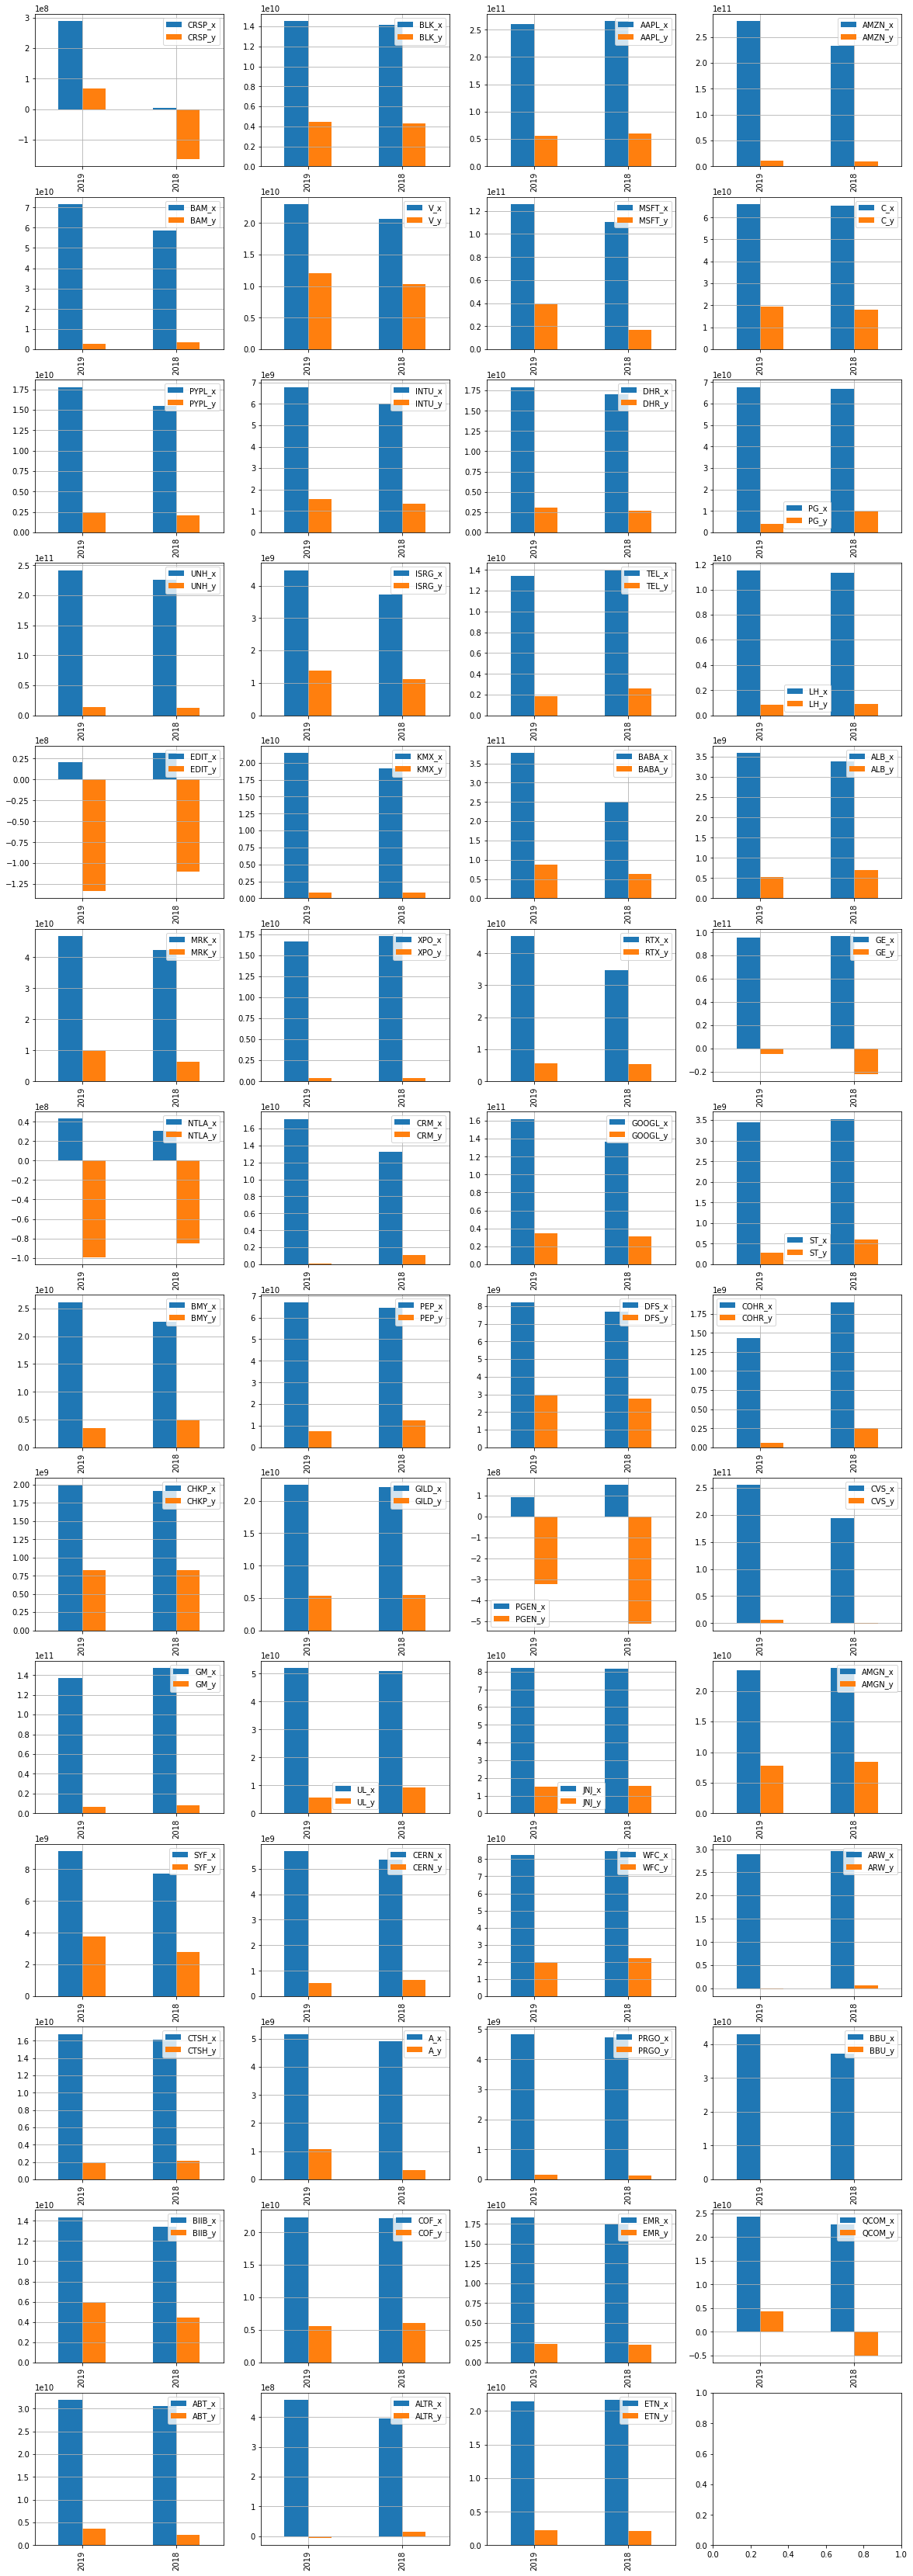

In [ ]:
# plot the subplots related to profit margin items in our stock list
# x = revenue
# y = net income

import math
fig, axes = plt.subplots(figsize=(20,60),nrows=14, ncols=4) # set the size

for tic, i in zip(ticker_list1, range(0, len(ticker_list1))):
  rev_net = pd.merge(revenue_data[tic], netincome_data[tic], how='outer', left_index=True, right_index=True) # merge both data
  r = int(math.floor(i/4))
  k = i % 4
  rev_net.plot(ax=axes[r,k], kind='bar', grid=True) # plot the bar plot

plt.show()

This plot shows a series of subplots to visualize the difference between their sales(x) and net income(y). We can see that most companies have positive sales and net income but only a few companies have lower differences between their sales and net income. Also, only a few companies have negative net income with their positive sales. This information tells us that those companies with smaller differences can make higher net income for each dollar of their revenue earned. When we take a closer look at the performance of our top 10 stocks, four of them have higher profit margins. They are **V, CHKP, BIIB** and **ISRG**.

### **EDA 3 - Subplot 2: Asset Turnover Data of Our Ticker List**

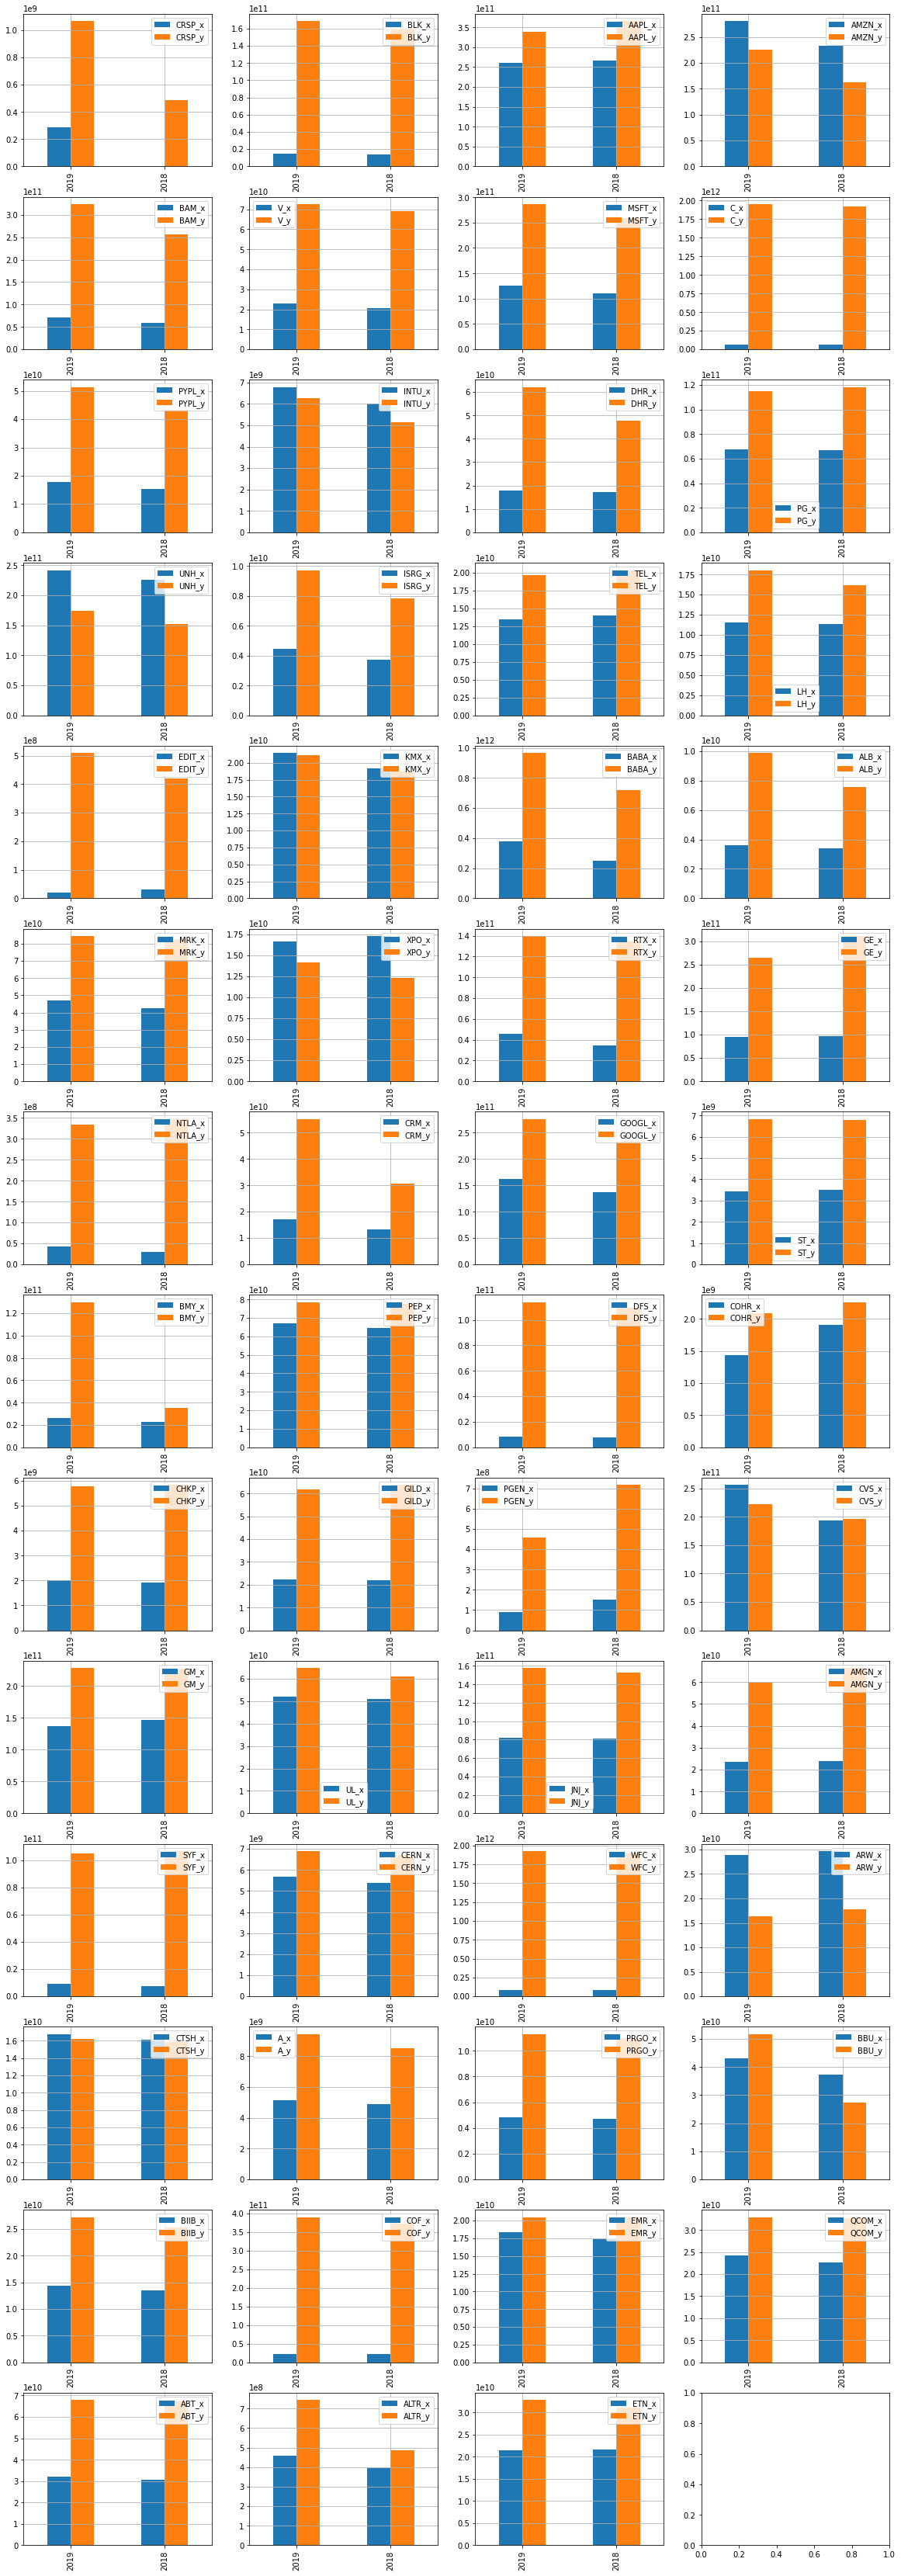

In [ ]:
# plot the subplots related to asset turnover items in our stock list
# x = revenue
# y = total assets

import math
fig, axes = plt.subplots(figsize=(20,60),nrows=14, ncols=4) # set the size

for tic, i in zip(ticker_list1, range(0, len(ticker_list1))):
  rev_net = pd.merge(revenue_data[tic], totalassets_data[tic], how='outer', left_index=True, right_index=True) # merge both data
  r = int(math.floor(i/4))
  k = i % 4
  rev_net.plot(ax=axes[r,k], kind='bar', grid=True) # plot the bar plot

plt.show()

This plot shows a series of subplots to visualize the difference between their sales(x) and total assets(y). We can see that all companies have positive sales and net income, but some companies have relatively higher assets level compared to their sales. That means these companies do not use the assets efficiently to generate revenue. When we look closer at our top 10 stocks, only two of them (**INTU** and **CTSH**) reached the highest top 10 of asset turnover ratio (shown in the asset turnover table above). Other companies in the table do not control their costs well as the top 10 companies listed in the profit margin table.

### **EDA 3 - Subplot 3: Return of Assets for Top 10 Stocks in 2019**

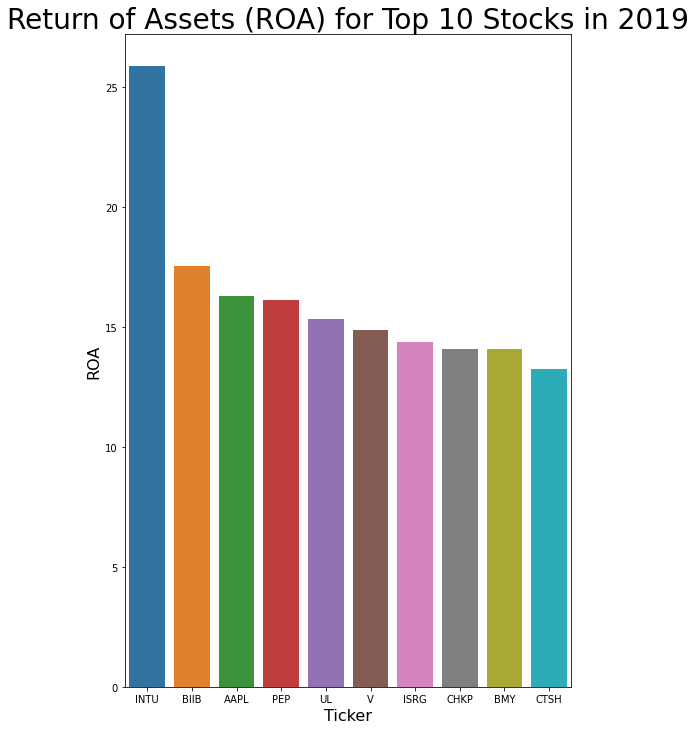

In [ ]:
ROA10 = ROA.head(10)
# plot the bar chart by sector
plt.figure(figsize=(8,12)) # set the plot size
sns.barplot(x='ticker', y='2019', data=ROA10) # plot the bar chart
plt.title('Return of Assets (ROA) for Top 10 Stocks in 2019', fontsize=28) # set the title for this plot
plt.xlabel('Ticker', fontsize=16) # xlabel
plt.ylabel('ROA', fontsize=16) # ylabel
plt.show() # show plot

After looking at the plots of profit margin and asset turnover, this plot shows that these top 10 companies have a well-balanced between their cost control and asset management to generate sales. They include **INTU, BIIB, AAPL, PEP, UL, V, ISRG, CHKP, BMY, and CTSH**.

# **Top 10 Stocks Final Selection**
---

According to the findings and our analysis, our top 10 stock list includes **INTU**(Technology/ Software-Application), **BIIB**(Healthcare/ Drug Manufacturers-General), **AAPL** (Technology/ Consumer Electronics), **PEP** (Consumer Defensive/ Beverages-Non Alcoholic), **UL** (Consumer Defensive/ Household & Personal Products), **V**(Financial Services/ Credit Services), **ISRG** (Healthcare/ Medical Instruments & Supplies), **CHKP**(Technology/ Software-Infrastructure), **BMY** (Healthcare/ Drug Manufacturers-General), and **CTSH** (Technology/ Information Technology Services). We will mainly focus on healthcare and information technology sectors and select some stocks with well-balanced financial figures to diversify the risks.

# **Portfolio Allocation**
---

We are going to build a stock portfolio for the period bewteen Jan 2021 and Oct 2021 with the ten stocks that we previously select with various analysis and measure the total value of portfolio at the end of the period. The key decision is how to allocate the portfolio among its constituent stocks.

The performance of individual stocks can be measured in two ways: **return** and **risk**. Return is the percentage growth in the value of the stock. Risk is the variability associated with the returns on the stock. The information on which stock performance is evaluated is a series of historical returns, typically compiled on a monthly basis. This history provides an empirical distribution of a stock’s return performance. For stock $k$ in the portfolio, this return distribution can be summarized by a mean ($r_k$) and a standard deviation ($s_k$). The performance of a portfolio of stocks is also measured in terms of return and risk. When we create a portfolio of stocks, our goals are usually to maximize the mean return and to minimize the risk. Both goals cannot be met simultaneously, but we can use optimization to explore the trade-offs involved.

In [ ]:
# Creating ticker list for our top 10 stocks
top10_list = ['INTU','BIIB','AAPL','PEP','UL','V','ISRG','CHKP','BMY','CTSH']
# pulling historical price data for each stocks to match with our news score later
top10_prices = {ticker : si.get_data(ticker,start_date = '01/01/2015',end_date='03/01/2020',interval='1d') for ticker in top10_list}

In [ ]:
top10_data = pd.DataFrame(top10_prices['INTU']['adjclose']).rename(columns = {"adjclose":"INTU"})

# combine all the tickers (all the rest of the samples)
for i in top10_list[1:]:
  top10_data[i] = pd.DataFrame(top10_prices[i]['adjclose'])
top10_data.head() # displaying first 5 rows

INTU        BIIB       AAPL        PEP         UL          V  \
2015-01-02  85.579651  342.010010  24.745998  77.474945  31.931650  63.329071   
2015-01-05  85.241867  336.739990  24.048859  76.892479  31.332636  61.931168   
2015-01-06  82.624107  334.649994  24.051128  76.309982  31.172894  61.532104   
2015-01-07  83.433334  353.239990  24.388378  78.541405  31.508348  62.356522   
2015-01-08  84.553040  350.250000  25.325436  79.968811  32.091389  63.192852   

                 ISRG       CHKP        BMY       CTSH  
2015-01-02  58.396667  78.459999  49.214886  49.965923  
2015-01-05  57.152222  78.010002  48.445778  49.652874  
2015-01-06  57.754444  77.949997  48.363075  48.362690  
2015-01-07  58.071110  78.589996  48.991600  49.946960  
2015-01-08  59.222221  80.529999  50.215565  51.113811

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in top10_list:
  return_data[i] = top10_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True) # dropping na values from return_data dataframe
return_data.head() # displaying first 5 rows

INTU      BIIB      AAPL       PEP        UL         V  \
2015-01-05 -0.003947 -0.015409 -0.028172 -0.007518 -0.018759 -0.022074   
2015-01-06 -0.030710 -0.006207  0.000094 -0.007575 -0.005098 -0.006444   
2015-01-07  0.009794  0.055551  0.014022  0.029242  0.010761  0.013398   
2015-01-08  0.013420 -0.008464  0.038422  0.018174  0.018504  0.013412   
2015-01-09 -0.021033 -0.022584  0.001072 -0.006770 -0.008213 -0.014823   

                ISRG      CHKP       BMY      CTSH  
2015-01-05 -0.021310 -0.005735 -0.015628 -0.006265  
2015-01-06  0.010537 -0.000769 -0.001707 -0.025984  
2015-01-07  0.005483  0.008210  0.012996  0.032758  
2015-01-08  0.019822  0.024685  0.024983  0.023362  
2015-01-09 -0.022758  0.000621 -0.006588  0.004454

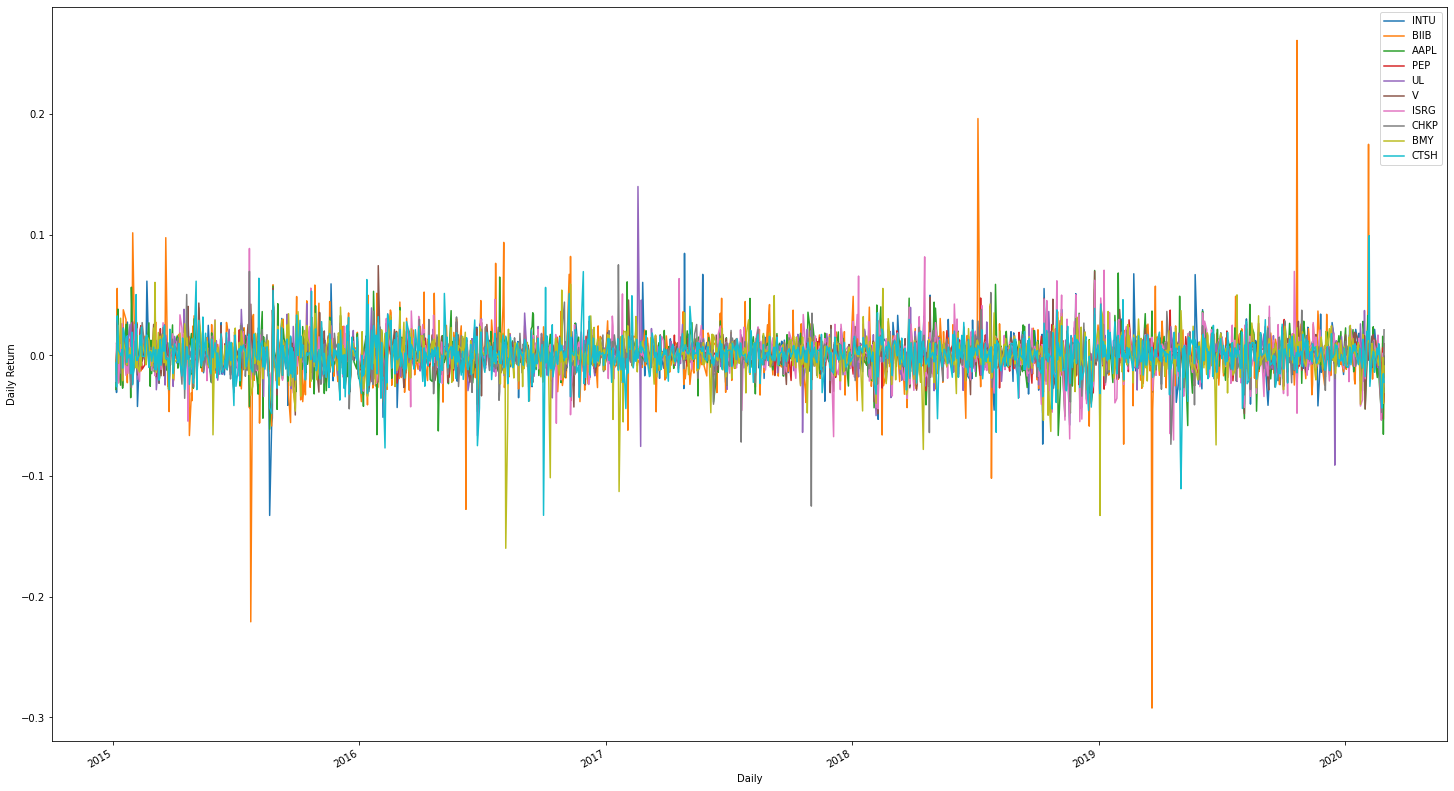

In [ ]:
# see what it looks like... messy... some volatility here!
return_data.plot(figsize=(25, 15)) # plotting graph based on returns for the 10 stocks
plt.xlabel('Daily') # 
plt.ylabel('Daily Return')
plt.show() # get rid of funky text

From the above graph, we see tickers 'BIIB' and 'CTSH' have high volatility. The other tickers are close to their mean values or have low volatility.

How do we invest our money so that, overall, we ride out the storm making as much possible in the future (assuming things 'stay the same' in the future)?

We will make a dataframe for the mean of each column in return_data, and the sd for each column in return_data.

Notice how some stocks have a high return (computer), but that it also has a high standard deviation! Too much risk might be uncomfortable for an investor...

In [ ]:
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"]) # calculating the average of returns
print(Avg_Return) # print average returns
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"]) # calculating the std dev
print(Std_Dev_Return) # print std deviation of returns

      Avg_Return
INTU    0.000977
BIIB    0.000207
AAPL    0.000900
PEP     0.000414
UL      0.000431
V       0.000891
ISRG    0.000987
CHKP    0.000302
BMY     0.000231
CTSH    0.000259
      Std_Dev_Return
INTU        0.014863
BIIB        0.023719
AAPL        0.015839
PEP         0.009188
UL          0.012165
V           0.013026
ISRG        0.015978
CHKP        0.013100
BMY         0.016083
CTSH        0.015532


From the above result, we can find **'INTU', 'AAPL', 'V', 'ISRG'** are having high average return and minimum std deviation. However, **'BIIB'** has very low average return but high std deviation, which means high risk associated.

## **Covariance**
---

A way that we can balance our portfolio is to look at how different stocks vary with each other. 

Remember - covariance is related to correlation - but is not the same thing! Covariance is a numeric representation of how much things vary together. Correlation is covariance divided by standard devation.

In this section we will calculate and show the covariance matrix in order to understand how each stock interacts with another. Every covariance here is positive meaning that each time series for each stock move in the same direction and vary by the number shown.

In [ ]:
# here's the covariance matrix
Covariance_matrix = return_data.cov() # assigning covariance to a dataframe
Covariance_matrix # displaying the value of Covariance_matrix

INTU      BIIB      AAPL       PEP        UL         V      ISRG  \
INTU  0.000221  0.000081  0.000114  0.000050  0.000055  0.000124  0.000114   
BIIB  0.000081  0.000563  0.000079  0.000036  0.000046  0.000076  0.000086   
AAPL  0.000114  0.000079  0.000251  0.000045  0.000052  0.000113  0.000112   
PEP   0.000050  0.000036  0.000045  0.000084  0.000049  0.000047  0.000032   
UL    0.000055  0.000046  0.000052  0.000049  0.000148  0.000058  0.000040   
V     0.000124  0.000076  0.000113  0.000047  0.000058  0.000170  0.000110   
ISRG  0.000114  0.000086  0.000112  0.000032  0.000040  0.000110  0.000255   
CHKP  0.000083  0.000064  0.000073  0.000029  0.000041  0.000072  0.000078   
BMY   0.000072  0.000119  0.000077  0.000038  0.000045  0.000069  0.000070   
CTSH  0.000107  0.000085  0.000100  0.000047  0.000054  0.000104  0.000096   

          CHKP       BMY      CTSH  
INTU  0.000083  0.000072  0.000107  
BIIB  0.000064  0.000119  0.000085  
AAPL  0.000073  0.000077  0.000100  
PEP   0.000029  0.000038  0.000047  
UL    0.000041  0.000045  0.000054  
V     0.000072  0.000069  0.000104  
ISRG  0.000078  0.000070  0.000096  
CHKP  0.000172  0.000048  0.000075  
BMY   0.000048  0.000259  0.000066  
CTSH  0.000075  0.000066  0.000241

## **Build the Nonlinear Optimization Model**
---

Now, we will construct the covariance matrix and average return dataframs of each stock used for our model, and then specify the ConcreteModel, our decision variables and BOUND THEM (between 0 and 1).

In [ ]:
# install pyomo
# mounting drive

!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

In [ ]:
# creating covariance table on stock return dataframe
df_cov = return_data.cov() # assigning coverage to df_cov dataframe
print('Covariance Matrix:') # printing text
print(df_cov) # printing dataframe
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = return_data.mean() # assigning returns to df_return dataframe
print('Average Return:') # printing text
print(df_return) # printing dataframe

Covariance Matrix:
          INTU      BIIB      AAPL       PEP        UL         V      ISRG  \
INTU  0.000221  0.000081  0.000114  0.000050  0.000055  0.000124  0.000114   
BIIB  0.000081  0.000563  0.000079  0.000036  0.000046  0.000076  0.000086   
AAPL  0.000114  0.000079  0.000251  0.000045  0.000052  0.000113  0.000112   
PEP   0.000050  0.000036  0.000045  0.000084  0.000049  0.000047  0.000032   
UL    0.000055  0.000046  0.000052  0.000049  0.000148  0.000058  0.000040   
V     0.000124  0.000076  0.000113  0.000047  0.000058  0.000170  0.000110   
ISRG  0.000114  0.000086  0.000112  0.000032  0.000040  0.000110  0.000255   
CHKP  0.000083  0.000064  0.000073  0.000029  0.000041  0.000072  0.000078   
BMY   0.000072  0.000119  0.000077  0.000038  0.000045  0.000069  0.000070   
CTSH  0.000107  0.000085  0.000100  0.000047  0.000054  0.000104  0.000096   

          CHKP       BMY      CTSH  
INTU  0.000083  0.000072  0.000107  
BIIB  0.000064  0.000119  0.000085  
AAPL  0.000

In [ ]:
# Specifying concrete model 

from pyomo.environ import *
m = ConcreteModel()

# definining decision variables for each stock
# Will show the amount investing in each stock
# each one is a stock ('INTU','BIIB','AAPL','PEP','UL','V','ISRG','CHKP','BMY','CTSH')
m.INTU = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for INTU
m.BIIB = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for BIIB
m.AAPL = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for AAPL
m.PEP = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for PEP
m.UL = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for UL
m.V = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for V
m.ISRG = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for ISRG
m.CHKP = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for CHKP
m.BMY = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for BMY
m.CTSH = Var(within=NonNegativeReals, bounds=(0,1)) # setting lower and upper bounds for CTSH

Next we specify the objective function in order to **maximize the returns**. Using the decision variables defined above, we will determine the optimal allocations for each stock, and multiply the proportions by the expected return for each stock.

We also specify three constriants. 

1.   The amount we invest in our portfolio is summed to '1'
2.   Treasury Bills are a short-term financial instrument that is issued by the US Treasury with maturity periods ranging from a few days up to 52 weeks (one year). They are considered among the safest investments since they are backed by the full faith and credit of the United States Government. Compared to 1 year Treasury bill yield rate, 0.5% return rate can be a good return from an investment. If we consider that we use daily prices and return rates, the minimum daily return rate should more than 0.000014 (1.0005^(1/365) - 1). This is our **'retun floor'**

![picture](https://drive.google.com/uc?id=1KpdP2cWvcY30ysRQb0uOhyg5lhnczehI)
https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/TextView.aspx?data=yieldYear&year=2020

3. We will start with 0.00001 so that we are more likely to make money at low risk. RISK for our definition, is simply the covariance matrix TIMES the 'proportion invested'. The 'proportion invested' is the allocation amount (decision variable). So, there is a relationship between the risk and the allocation in different stocks.

We will iteratively try to identify which mix of stocks gives us the max return for a given risk level. As the investor, we will choose which risk level maximize the highest return and we can be confident that we are optimally allocating the portfolio for that given risk level.



In [ ]:
# Declaring objectives - here, the optimal allocations for each stock is determined. Coefficient is the expected return for each stock. 
m.objective = Objective(expr =               
                        m.INTU*df_return[0] + 
                        m.BIIB*df_return[1] + 
                        m.AAPL*df_return[2] +
                        m.PEP*df_return[3] + 
                        m.UL*df_return[4] +
                        m.V*df_return[5] +
                        m.ISRG*df_return[6] +
                        m.CHKP*df_return[7] +
                        m.BMY*df_return[8] +
                        m.CTSH*df_return[9],
                        sense=maximize) # maximizing returns

# Declaring constraints

# First constraint: sum of proportions needs to equal 1 to ensure ALL money is being invested

m.sum_proportions = Constraint(expr = m.INTU + m.BIIB + m.AAPL + m.PEP + m.UL + m.V + m.ISRG + m.CHKP + m.BMY + m.CTSH == 1) 

# Second constraint: Returns need to be greater than 0.000014 or 0.0014%. 
m.return_floor = Constraint(expr = m.objective >= 0.000014)

# Third Constraint: 
m.total_risk = Constraint(expr = m.INTU + m.BIIB + m.AAPL + m.PEP + m.UL + m.V + m.ISRG + m.CHKP + m.BMY + m.CTSH >= 0.0)

In [ ]:
# creating calculations table for calculate the risk

# Setting the risk level: maximum risk should be less than 0.0015
max_risk = 0.0015
# First we define calc_risk as the proprotions defined above, and the risk_matrix as an empty list.
def calc_risk():
  proportions = [m.INTU, m.BIIB, m.AAPL, m.PEP, m.UL, m.V, m.ISRG, m.CHKP, m.BMY, m.CTSH]
  risk_matrix = []
  

# Now we will calculate the risk by iterating across the covariance matrix
# 'risk elements' are = cov(A,B)*prop(A)*prop(B) ie. For each column take proportion we invested times proportion in the row, and multiple it by covariance
# since there are 10 stocks, there are 10*10 = 100 elements
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
 # summing these 100 elements which equals the risk
  return risk_matrix.sum().sum() 

# Computing the risk
expr_risk = calc_risk()

# Sequence of risk levels - (0.00001 to 0.0015). Various levels by taken at a difference of 0.00001
# to undertand the affect of risk.
risk_limits = np.arange(0.00001, 0.0015, 0.00001) # take tiny steps
risk_limits # displaying risk_limits

array([1.00e-05, 2.00e-05, 3.00e-05, 4.00e-05, 5.00e-05, 6.00e-05,
       7.00e-05, 8.00e-05, 9.00e-05, 1.00e-04, 1.10e-04, 1.20e-04,
       1.30e-04, 1.40e-04, 1.50e-04, 1.60e-04, 1.70e-04, 1.80e-04,
       1.90e-04, 2.00e-04, 2.10e-04, 2.20e-04, 2.30e-04, 2.40e-04,
       2.50e-04, 2.60e-04, 2.70e-04, 2.80e-04, 2.90e-04, 3.00e-04,
       3.10e-04, 3.20e-04, 3.30e-04, 3.40e-04, 3.50e-04, 3.60e-04,
       3.70e-04, 3.80e-04, 3.90e-04, 4.00e-04, 4.10e-04, 4.20e-04,
       4.30e-04, 4.40e-04, 4.50e-04, 4.60e-04, 4.70e-04, 4.80e-04,
       4.90e-04, 5.00e-04, 5.10e-04, 5.20e-04, 5.30e-04, 5.40e-04,
       5.50e-04, 5.60e-04, 5.70e-04, 5.80e-04, 5.90e-04, 6.00e-04,
       6.10e-04, 6.20e-04, 6.30e-04, 6.40e-04, 6.50e-04, 6.60e-04,
       6.70e-04, 6.80e-04, 6.90e-04, 7.00e-04, 7.10e-04, 7.20e-04,
       7.30e-04, 7.40e-04, 7.50e-04, 7.60e-04, 7.70e-04, 7.80e-04,
       7.90e-04, 8.00e-04, 8.10e-04, 8.20e-04, 8.30e-04, 8.40e-04,
       8.50e-04, 8.60e-04, 8.70e-04, 8.80e-04, 8.90e-04, 9.00e

## **Run the model**

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()
  
  # store our allocation proportions to show which proportions should be used for each stock
  param_analysis[r] = [m.INTU(), m.BIIB(), m.AAPL(), m.PEP(), m.UL(), m.V(), m.ISRG(), m.CHKP(), m.BMY(), m.CTSH()]

  # storing our returns for each proportion combination
  returns[r] =  m.INTU()*df_return[0] + m.BIIB()*df_return[1] + m.AAPL()*df_return[2] + m.PEP()*df_return[3] + m.UL()*df_return[4] + m.V()*df_return[5] + m.ISRG()*df_return[6] + m.CHKP()*df_return[7] + m.BMY()*df_return[8] + m.CTSH()*df_return[9]

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
    model.name="unknown";
      - termination

## **Parameter Analysis**

---
Let's see what the efficient frontier and the allocation looks like !

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = list(df_return.index)
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[7.000000000000001e-05, 8e-05, 9e-05, 0.0001, 0.00011, 0.00012, 0.00013000000000000002, 0.00014000000000000001, 0.00015000000000000001, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00025000000000000006, 0.00026000000000000003, 0.00027000000000000006, 0.00028000000000000003, 0.00029000000000000006, 0.00030000000000000003, 0.00031000000000000005, 0.00032, 0.00033000000000000005, 0.0003400000000000001, 0.00035000000000000005, 0.0003600000000000001, 0.00037000000000000005, 0.0003800000000000001, 0.00039000000000000005, 0.0004000000000000001, 0.00041000000000000005, 0.00042000000000000007, 0.00043000000000000004, 0.00044000000000000007, 0.00045000000000000004, 0.00046000000000000007, 0.00047000000000000004, 0.00048000000000000007, 0.0004900000000000001, 0.0005000000000000001, 0.00051, 0.0005200000000000001, 0.0005300000000000001, 0.0005400000000000001, 0.00055, 0.0005600000000000001, 0.0005700000000000001, 0.0005800000000000001, 0.00059, 0.00060000000000

In [ ]:
pa = pd.DataFrame(param_analysis)
pa.head(50) # displaying the parameter analysis result which shows the Proportions of funds taken at each risk level

INTU      BIIB      AAPL       PEP        UL         V      ISRG  \
0.00007  0.072149  0.000008  0.064028  0.435918  0.123625  0.116368  0.141582   
0.00008  0.125412  0.000011  0.085887  0.358396  0.094370  0.161792  0.174040   
0.00009  0.164319  0.000008  0.101130  0.281341  0.062744  0.194985  0.195442   
0.00010  0.195150  0.000007  0.113206  0.220222  0.037712  0.221278  0.212398   
0.00011  0.221494  0.000002  0.123522  0.168033  0.016297  0.243755  0.226888   
0.00012  0.245157  0.000007  0.132639  0.117270  0.001958  0.263090  0.239856   
0.00013  0.267242  0.000002  0.140774  0.060839  0.000109  0.279165  0.251861   
0.00014  0.287646  0.000006  0.148204  0.007479  0.000099  0.293599  0.262945   
0.00015  0.388636  0.000004  0.111240  0.000010  0.000010  0.160981  0.339103   
0.00016  0.461262  0.000004  0.083053  0.000008  0.000008  0.061325  0.394326   
0.00017  0.516267  0.000004  0.042754  0.000007  0.000007  0.000803  0.440146   
0.00018  0.424891  0.000003  0.000040  0.000005  0.000005  0.000034  0.575011   
0.00019  0.322341  0.000003  0.000035  0.000005  0.000005  0.000031  0.677569   
0.00020  0.251269  0.000003  0.000034  0.000005  0.000005  0.000031  0.748643   
0.00021  0.193370  0.000003  0.000034  0.000005  0.000005  0.000030  0.806543   
0.00022  0.143331  0.000003  0.000033  0.000005  0.000005  0.000030  0.856582   
0.00023  0.098554  0.000003  0.000033  0.000005  0.000005  0.000030  0.901360   
0.00024  0.057680  0.000003  0.000033  0.000005  0.000005  0.000030  0.942234   
0.00025  0.019846  0.000003  0.000033  0.000004  0.000005  0.000029  0.980069   
0.00026  0.000490  0.000003  0.000029  0.000004  0.000005  0.000026  0.999432   
0.00027  0.000482  0.000003  0.000028  0.000004  0.000005  0.000026  0.999441   
0.00028  0.000219  0.000003  0.000030  0.000004  0.000005  0.000027  0.999702   
0.00029  0.000479  0.000003  0.000028  0.000004  0.000005  0.000026  0.999444   
0.00030  0.000476  0.000003  0.000028  0.000004  0.000005  0.000026  0.999447   
0.00031  0.000190  0.000003  0.000029  0.000004  0.000005  0.000027  0.999732   
0.00032  0.000287  0.000003  0.000029  0.000004  0.000005  0.000027  0.999635   
0.00033  0.000339  0.000003  0.000029  0.000004  0.000005  0.000027  0.999582   
0.00034  0.000372  0.000003  0.000030  0.000004  0.000005  0.000027  0.999549   
0.00035  0.000395  0.000003  0.000030  0.000004  0.000005  0.000027  0.999526   
0.00036  0.000409  0.000003  0.000030  0.000004  0.000005  0.000027  0.999512   
0.00037  0.000417  0.000003  0.000030  0.000004  0.000005  0.000027  0.999504   
0.00038  0.000424  0.000003  0.000030  0.000004  0.000005  0.000027  0.999497   
0.00039  0.000429  0.000003  0.000030  0.000004  0.000005  0.000027  0.999492   
0.00040  0.000433  0.000003  0.000030  0.000004  0.000005  0.000027  0.999488   
0.00041  0.000436  0.000003  0.000030  0.000004  0.000005  0.000027  0.999485   
0.00042  0.000439  0.000003  0.000030  0.000004  0.000005  0.000027  0.999482   
0.00043  0.000441  0.000003  0.000030  0.000004  0.000005  0.000027  0.999479   
0.00044  0.000443  0.000003  0.000030  0.000004  0.000005  0.000027  0.999478   
0.00045  0.000444  0.000003  0.000030  0.000004  0.000005  0.000027  0.999477   
0.00046  0.000445  0.000003  0.000030  0.000004  0.000005  0.000027  0.999476   
0.00047  0.000445  0.000003  0.000030  0.000004  0.000005  0.000027  0.999475   
0.00048  0.000446  0.000003  0.000030  0.000004  0.000005  0.000027  0.999475   
0.00049  0.000446  0.000003  0.000030  0.000004  0.000005  0.000027  0.999474   
0.00050  0.000447  0.000003  0.000030  0.000004  0.000005  0.000027  0.999474   
0.00051  0.000447  0.000003  0.000030  0.000004  0.000005  0.000027  0.999474   
0.00052  0.000447  0.000003  0.000030  0.000004  0.000005  0.000027  0.999473   
0.00053  0.000448  0.000003  0.000030  0.000004  0.000005  0.000027  0.999473   
0.00054  0.000448  0.000003  0.000030  0.000004  0.000005  0.000027  0.999473   
0.00055  0.000448  0.000003  0.000030  0.000

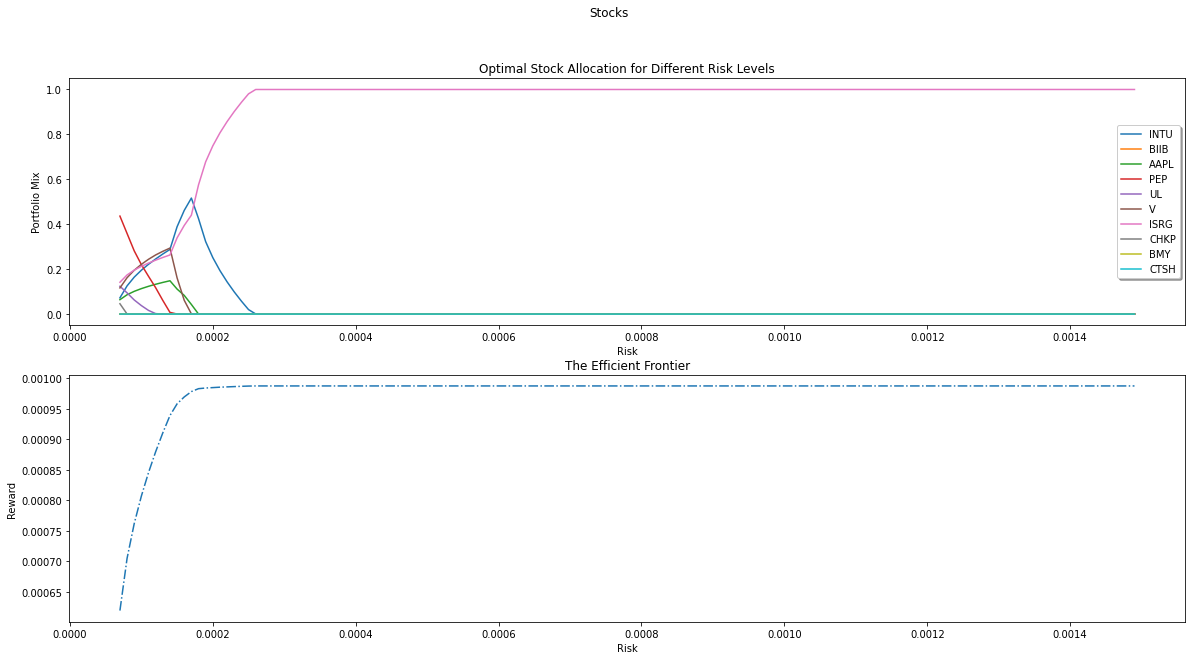

In [ ]:
# Create a figure that will house the Stock Allocation and Efficient Frontier charts
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))
fig.suptitle('Stocks')

# Plot the Stock Allocation chart with a title, axis labels and a legend
ax1.plot(param_analysis) # plotting parameter analysis
ax1.legend(param_analysis.columns, shadow=True, fancybox=True) # showing legend to identify stocks
ax1.set_title('Optimal Stock Allocation for Different Risk Levels') # setting title
ax1.set_xlabel('Risk') # setting x axis
ax1.set_ylabel('Portfolio Mix') # setting y axis

# Plot the Efficient Frontier with a title and axis labels
ax2.plot(risk, reward, '-.')
ax2.set_title('The Efficient Frontier') # setting title
ax2.set_xlabel('Risk') # setting x axis
ax2.set_ylabel('Reward') # setting y axis
plt.show() # displaying the plot

In [ ]:
returns = pd.DataFrame.from_dict(returns, orient='index') # assigning the returns to a variable returns
print(returns.head(25)) # displaying returns

                0
0.00007  0.000619
0.00008  0.000705
0.00009  0.000762
0.00010  0.000807
0.00011  0.000845
0.00012  0.000879
0.00013  0.000910
0.00014  0.000939
0.00015  0.000958
0.00016  0.000969
0.00017  0.000978
0.00018  0.000983
0.00019  0.000984
0.00020  0.000985
0.00021  0.000985
0.00022  0.000986
0.00023  0.000986
0.00024  0.000987
0.00025  0.000987
0.00026  0.000987
0.00027  0.000987
0.00028  0.000987
0.00029  0.000987
0.00030  0.000987
0.00031  0.000987


In [ ]:
new_return = returns.iloc[3:18,:]  # filtering out risk levels of interest 
new_param_analysis = param_analysis.iloc[3:18,:] # assigning it to a variable

In [ ]:
new_param_analysis = new_param_analysis.merge(new_return, how='outer', left_index=True, right_index=True) # joining it with our initial dataset
new_param_analysis.rename({0:'Avg Daily Return'}, inplace=True, axis =1) # renaming last column
new_param_analysis # displaying the values

INTU      BIIB      AAPL       PEP        UL         V      ISRG  \
0.00010  0.195150  0.000007  0.113206  0.220222  0.037712  0.221278  0.212398   
0.00011  0.221494  0.000002  0.123522  0.168033  0.016297  0.243755  0.226888   
0.00012  0.245157  0.000007  0.132639  0.117270  0.001958  0.263090  0.239856   
0.00013  0.267242  0.000002  0.140774  0.060839  0.000109  0.279165  0.251861   
0.00014  0.287646  0.000006  0.148204  0.007479  0.000099  0.293599  0.262945   
0.00015  0.388636  0.000004  0.111240  0.000010  0.000010  0.160981  0.339103   
0.00016  0.461262  0.000004  0.083053  0.000008  0.000008  0.061325  0.394326   
0.00017  0.516267  0.000004  0.042754  0.000007  0.000007  0.000803  0.440146   
0.00018  0.424891  0.000003  0.000040  0.000005  0.000005  0.000034  0.575011   
0.00019  0.322341  0.000003  0.000035  0.000005  0.000005  0.000031  0.677569   
0.00020  0.251269  0.000003  0.000034  0.000005  0.000005  0.000031  0.748643   
0.00021  0.193370  0.000003  0.000034  0.000005  0.000005  0.000030  0.806543   
0.00022  0.143331  0.000003  0.000033  0.000005  0.000005  0.000030  0.856582   
0.00023  0.098554  0.000003  0.000033  0.000005  0.000005  0.000030  0.901360   
0.00024  0.057680  0.000003  0.000033  0.000005  0.000005  0.000030  0.942234   

             CHKP       BMY      CTSH  Avg Daily Return  
0.00010  0.000012  0.000009  0.000006          0.000807  
0.00011  0.000004  0.000003  0.000002          0.000845  
0.00012  0.000010  0.000008  0.000005          0.000879  
0.00013  0.000003  0.000003  0.000002          0.000910  
0.00014  0.000009  0.000008  0.000005          0.000939  
0.00015  0.000005  0.000005  0.000004          0.000958  
0.00016  0.000005  0.000004  0.000004          0.000969  
0.00017  0.000005  0.000004  0.000004          0.000978  
0.00018  0.000004  0.000003  0.000004          0.000983  
0.00019  0.000004  0.000003  0.000004          0.000984  
0.00020  0.000004  0.000003  0.000004          0.000985  
0.00021  0.000004  0.000003  0.000004          0.000985  
0.00022  0.000004  0.000003  0.000003          0.000986  
0.00023  0.000004  0.000003  0.000003          0.000986  
0.00024  0.000004  0.000003  0.000003          0.000987

**Optimal Stock Allocation for different risk levels**
---

On the lefthand side, we have low risk and high diversity.On the righthand side, we have high risk and low diversity (we dump all of our money in the ISRG stocks!)

At each risk level, this is the optimal allocation of stocks. As the investor, you choose what you are comfortable with.

**Efficient Frontier**
---

And let's take a look at the efficient frontier - risk (X) vs. return (Y)! And what do we see? At a certain point, taking on more risk doesn't increase your returns! This occurs at ~Risk = 0.00024 which achieves a max return around (0.000987) daily return. Note how this is just the same average return as the ISRG stock. This plot also agrees with your allocation plot above - look at 0.0.00024 on the X axis! Any point on the efficient frontier is an optimal allocation based on your risk tolerance.

From the efficient frontier graph, we see that the results obtained at the risk level 0.00015 gives a daily return of 0.0009579 and split among four funds with different proportions. The majority proportions are

* INTU - 0.388636	
* AAPL - 0.111240	
* V    - 0.160981	
* ISRG - 0.339103

If we increase our risk level to .00024, we see ISRG gets full proportion and gives maximum returns. We can also see that INTU gives a good return upto 0.0002 risk level after which it reduces with the increase in risk level. However, we wanted the portfolio to be shared with multiple stocks to reduce the risk. 


## **Assessment of the model**
---

In this section we will be analyzing the model results and building up a portfolio with the four stocks which has majority proportion and reduced risk.

### Analysis 1

In [ ]:
# Creating ticker list with majority proportions
portfolio_list = ['INTU','AAPL','V','ISRG']
# pulling historical price data for each stocks to match with our news score later
portfolio = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/01/2021',interval='1d') for ticker in portfolio_list} 
# date is selected from Jan 1st 2021 to Oct 1st 2021
portfolio

{'AAPL':                   open        high         low       close    adjclose  \
 2021-01-04  133.520004  133.610001  126.760002  129.410004  128.617096   
 2021-01-05  128.889999  131.740005  128.429993  131.009995  130.207291   
 2021-01-06  127.720001  131.050003  126.379997  126.599998  125.824326   
 2021-01-07  128.360001  131.630005  127.860001  130.919998  130.117844   
 2021-01-08  132.429993  132.630005  130.229996  132.050003  131.240921   
 2021-01-11  129.190002  130.169998  128.500000  128.979996  128.189728   
 2021-01-12  128.500000  129.690002  126.860001  128.800003  128.010849   
 2021-01-13  128.759995  131.449997  128.490005  130.889999  130.088028   
 2021-01-14  130.800003  131.000000  128.759995  128.910004  128.120178   
 2021-01-15  128.779999  130.220001  127.000000  127.139999  126.361023   
 2021-01-19  127.779999  128.710007  126.940002  127.830002  127.046783   
 2021-01-20  128.660004  132.490005  128.550003  132.029999  131.221039   
 2021-01-21  133.

In [ ]:
# Extracting the data for the 4 stocks we are interested in (adjclose)
# get the adjclose price for INTU - one specific sample
final_data = pd.DataFrame(portfolio['INTU']['adjclose']).rename(columns = {"adjclose":"INTU"})

# Extracting and adding the other 3 stocks to the table
for i in portfolio_list[1:]:
  final_data[i] = pd.DataFrame(portfolio[i]['adjclose']) # pulling adjclose for all 4 stocks of interest
final_data.head() # displaying the first few rows

INTU        AAPL           V        ISRG
2021-01-04  369.669983  128.617096  216.811539  266.666656
2021-01-05  366.855438  130.207291  213.575684  268.350006
2021-01-06  359.028412  125.824326  211.693924  264.263336
2021-01-07  366.616760  130.117844  212.878738  269.403320
2021-01-08  373.011902  131.240921  214.511597  272.916656

In [ ]:
# Calculating pct_change for each ticker, and setting that as our return feature for each ticker
# Utilizing forloop to calculate return feature for each stock
return_data = pd.DataFrame() # converting return_data to dataframe
for i in portfolio_list:
  return_data[i] = final_data[i].pct_change() # calculating the return data for the four tickers
# drop the na records
return_data.dropna(inplace=True)
return_data.head()  # displaying the first few rows

INTU      AAPL         V      ISRG
2021-01-05 -0.007614  0.012364 -0.014925  0.006313
2021-01-06 -0.021335 -0.033661 -0.008811 -0.015229
2021-01-07  0.021136  0.034123  0.005597  0.019450
2021-01-08  0.017444  0.008631  0.007670  0.013041
2021-01-11 -0.005662 -0.023249 -0.011882 -0.006229

In [ ]:
# Calculating Average Return for each stock using mean function
Avg_return = pd.DataFrame(np.mean(return_data), columns=["Avg_Return"]) # saving average returns to dataframe
print(Avg_return) # displaying the avg returns

# Calculating standard deviation for each stock

Std_Dev_Return = pd.DataFrame(np.std(return_data), columns=["Std_Dev_Return"]) # saving std dev to dataframe
print(Std_Dev_Return) # displaying the std deviations

      Avg_Return
INTU    0.002148
AAPL    0.000630
V       0.000234
ISRG    0.001310
      Std_Dev_Return
INTU        0.016202
AAPL        0.015922
V           0.013320
ISRG        0.017196


In [ ]:
# Estimated return
# we estimated at risk level 0.00015, our daily return will be 0.0009579368903504055
(1+0.0009579368903504055)**273 # 273 is the number of days between January 1st to October 1st
# 30% profit from historical data

1.2987361414877119

In [ ]:
(0.39*0.002148+0.11*0.000630+0.16*0.000234+0.34*0.001310)
# weighted average daily return based on test data from January 1st to oct 1 st

0.0013898600000000001

In [ ]:
# Actual return
(1+0.0013898600000000001)**273 # 273 is the number of days between January 1st to October 1st
# 46.1% actual profit we actually made a lot more than estimated profit

1.4610689794818825

We see that from the model, the estimated return at a risk level of 0.00015 by the end of Ooctober 2021 will give a Profit of 30%.

But if we invest in the Proportions as mentioned by our analysis, then the Profit would be 46.1%

### **Analysis 2**
---

Here we are going to create a table that shows the price of our 4 Stocks (INTU, AAPL, V, ISRG) on the first day of each month from Jan 1, 2021 till Oct 1(as mentioned in Project Description document) that comes from risk level of 0.00015

In [ ]:
 # Using the Top 4 Stocks from our initial EDA. For our second analysis we are using dataset only from Jan 1st 2021 to Oct 31st 2021
portfolio = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='10/31/2021',interval='1mo') for ticker in portfolio_list}
prep_data = pd.DataFrame(portfolio['INTU']['adjclose']).rename(columns = {"adjclose":"INTU"}) # Initializing a dataframe for our ticker data
for i in portfolio_list[1:]: # Using a for loop to create the dataframe. Where 'i' is the name of each ticker in our green list
  prep_data[i] = pd.DataFrame(portfolio[i]['adjclose']) # This creates a column for each ticker in our dataframe

prep_data

INTU        AAPL           V        ISRG
2021-01-01  359.257141  131.151489  192.408295  249.213333
2021-02-01  388.631256  120.517044  211.464920  245.600006
2021-03-01  381.578644  121.583000  211.135071  246.313339
2021-04-01  410.566101  130.849792  232.903732  288.333344
2021-05-01  438.020233  124.031578  226.661331  280.726654
2021-06-01  488.975830  136.555817  233.501694  306.546661
2021-07-01  528.678772  145.429535  246.054565  330.486664
2021-08-01  565.389893  151.381927  228.788116  351.186676
2021-09-01  538.823792  141.293793  222.750000  331.383331
2021-10-01  625.193726  149.581696  211.770004  361.130005

In [ ]:
prep_data2 = prep_data.T #Transposing the table

prep_data2.columns = ['Jan 2021', 'Feb 2021','March 2021','April 2021', 'May 2021', 'June 2021', 'July 2021', 'August 2021', 'September 2021', 'October 2021'] #Renaming the columns

prep_data2 # displaying the adj close per month

Jan 2021    Feb 2021  March 2021  April 2021    May 2021   June 2021  \
INTU  359.257141  388.631256  381.578644  410.566101  438.020233  488.975830   
AAPL  131.151489  120.517044  121.583000  130.849792  124.031578  136.555817   
V     192.408295  211.464920  211.135071  232.903732  226.661331  233.501694   
ISRG  249.213333  245.600006  246.313339  288.333344  280.726654  306.546661   

       July 2021  August 2021  September 2021  October 2021  
INTU  528.678772   565.389893      538.823792    625.193726  
AAPL  145.429535   151.381927      141.293793    149.581696  
V     246.054565   228.788116      222.750000    211.770004  
ISRG  330.486664   351.186676      331.383331    361.130005

In [ ]:
# Calculating pct_change for each ticker, and setting that as our return feature for each ticker
# Utilizing forloop to calculate return feature for each stock
return_data = pd.DataFrame() # converting to a dataframe
for i in portfolio_list:
  return_data[i] = prep_data[i].pct_change() # calculating % change
# drop the na records
return_data.dropna(inplace=True) # dropping na
return_data # displaying the results

INTU      AAPL         V      ISRG
2021-02-01  0.081763 -0.081085  0.099043 -0.014499
2021-03-01 -0.018147  0.008845 -0.001560  0.002904
2021-04-01  0.075967  0.076218  0.103103  0.170596
2021-05-01  0.066869 -0.052107 -0.026802 -0.026382
2021-06-01  0.116332  0.100976  0.030179  0.091976
2021-07-01  0.081196  0.064982  0.053759  0.078096
2021-08-01  0.069439  0.040930 -0.070173  0.062635
2021-09-01 -0.046987 -0.066640 -0.026392 -0.056390
2021-10-01  0.160293  0.058657 -0.049293  0.089765

In [ ]:
# Calculating Average Return for each stock using mean function
Avg_return = pd.DataFrame(np.mean(return_data), columns=["Avg_Return"]) # calculating average returns
print(Avg_return) # displaying avg returns

# Calculating standard deviation for each stock

Std_Dev_Return = pd.DataFrame(np.std(return_data), columns=["Std_Dev_Return"]) # calculating std dev
print(Std_Dev_Return) # displaying std deviation

      Avg_Return
INTU    0.065192
AAPL    0.016753
V       0.012429
ISRG    0.044300
      Std_Dev_Return
INTU        0.059495
AAPL        0.063794
V           0.059275
ISRG        0.068373


In [ ]:
# Risk level of 0.00015 taken for both models
r = 0.00015 # The risk level, as we wanted to share portolio with 4 stocks 

param_analysis = {} # empty
returns = {}  # empty
result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write() # Solver

# Displaying the results
print("Reward = ", m.objective()) 

# Storing the allocated proportions
param_analysis[r] = [m.INTU(),m.AAPL(),m.V(),m.ISRG()] # four stocks of interest

# Storing the value of returns
returns[r] =   m.INTU()*df_return[0] +m.AAPL()*df_return[1]+ m.V()*df_return[2] + m.ISRG()*df_return[3] # storing  returns

# Storing a list of the summed up means of the returns for the optimized distribution for the 10 selected stocks at every simulated risk level
cleanstocks= list(param_analysis[r])  

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.030761241912841797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Rewar

In [ ]:
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk) # displaying risks
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # displaying reward

[0.00015]
[0.00041441517744522036]


In [ ]:
pa = pd.DataFrame(param_analysis) # storing the param_analysis to a dataframe
pa.head(50) # displaying first few rows

0.00015
0  0.000430
1  0.000031
2  0.000028
3  0.999489

In [ ]:
prep_data2=prep_data2[['Jan 2021','October 2021']] # assuming senator took our suggestion and started investing in Jan 2021, what would be the results in Oct 2021
prep_data2 # displaying the values

Jan 2021  October 2021
INTU  359.257141    625.193726
AAPL  131.151489    149.581696
V     192.408295    211.770004
ISRG  249.213333    361.130005

In [ ]:
#Retrieving the allocation for each stock
clean_allocation_per = []  # empty list
cleanparam = list(param_analysis[r])# Storing a list of the summed up means of the returns for the optimized distribution for the 4 selected stocks at the given risk level
cleandf = pd.DataFrame(data=cleanparam, index=[df_return[0],df_return[1],df_return[2],df_return[3]], columns=["Allocation"])

for i in cleandf.iloc[:, 0]: # executing a for loop
    clean_allocation_per.append(i) 

# Calcuting the gains and the allocation for the stocks
prep_data2['Actual_Gains ($)'] = round(prep_data2['October 2021']-prep_data2['Jan 2021'],2) # calculating actual gain dollars
prep_data2['Actual_Gains (%)'] = round(((prep_data2['October 2021']/prep_data2['Jan 2021'])-1),2) # calculating actual gain %
prep_data2['Allocation %'] = clean_allocation_per #allocated % based on risk level

prep_data2 # displaying the result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Jan 2021  October 2021  Actual_Gains ($)  Actual_Gains (%)  \
INTU  359.257141    625.193726            265.94              0.74   
AAPL  131.151489    149.581696             18.43              0.14   
V     192.408295    211.770004             19.36              0.10   
ISRG  249.213333    361.130005            111.92              0.45   

      Allocation %  
INTU      0.000430  
AAPL      0.000031  
V         0.000028  
ISRG      0.999489

From the above analysis we can see the allocation percent for each of the 4 stocks and ISRG was having a high proportion followed by INTU and others. 

# **Conclusion**

## **S&P 500 Index Benchmark with Top 10 stocks**
---

In this section we will be analyzing the S&P500 Index will the Top 10 stocks list and draw our conclusions.

In [ ]:
# our list for final 10 stocks and S&P500
top10_SP500 = ['^GSPC', 'INTU', 'BIIB', 'AAPL', 'PEP', 'UL', 'V', 'ISRG', 'CHKP', 'BMY', 'CTSH']

In [ ]:
# generate the data about each stock from 1/1/2021 to 10/1/2021
benchmark = {ticker : si.get_data(ticker,start_date ='01/01/2021', end_date='10/01/2021',interval='1d') for ticker in top10_SP500}

In [ ]:
# print the info
benchmark

{'AAPL':                   open        high         low       close    adjclose  \
 2021-01-04  133.520004  133.610001  126.760002  129.410004  128.617096   
 2021-01-05  128.889999  131.740005  128.429993  131.009995  130.207306   
 2021-01-06  127.720001  131.050003  126.379997  126.599998  125.824318   
 2021-01-07  128.360001  131.630005  127.860001  130.919998  130.117844   
 2021-01-08  132.429993  132.630005  130.229996  132.050003  131.240921   
 2021-01-11  129.190002  130.169998  128.500000  128.979996  128.189713   
 2021-01-12  128.500000  129.690002  126.860001  128.800003  128.010849   
 2021-01-13  128.759995  131.449997  128.490005  130.889999  130.088043   
 2021-01-14  130.800003  131.000000  128.759995  128.910004  128.120163   
 2021-01-15  128.779999  130.220001  127.000000  127.139999  126.361008   
 2021-01-19  127.779999  128.710007  126.940002  127.830002  127.046776   
 2021-01-20  128.660004  132.490005  128.550003  132.029999  131.221039   
 2021-01-21  133.

In [ ]:
# extract the data we need, adjclose
# get the adjclose price for the A as sample
SP500_data = pd.DataFrame(benchmark['^GSPC']['adjclose']).rename(columns = {"adjclose":"^GSPC"})

# combine all the tickers (all the rest of the samples)
for i in top10_SP500[1:]:
  SP500_data[i] = pd.DataFrame(benchmark[i]['adjclose'])
SP500_data

^GSPC        INTU        BIIB        AAPL         PEP  \
2021-01-04  3700.649902  369.669983  242.949997  128.617096  141.121780   
2021-01-05  3726.860107  366.855438  246.389999  130.207306  141.542404   
2021-01-06  3748.139893  359.028381  247.750000  125.824318  139.811020   
2021-01-07  3803.790039  366.616760  250.440002  130.117844  139.361069   
2021-01-08  3824.679932  373.011902  252.539993  131.240921  141.033737   
2021-01-11  3799.610107  370.900085  267.519989  128.189713  138.989349   
2021-01-12  3801.189941  364.255920  267.390015  128.010849  138.343750   
2021-01-13  3809.840088  363.548615  266.670013  130.088043  139.478439   
2021-01-14  3795.540039  364.096497  280.290009  128.120163  138.666550   
2021-01-15  3768.250000  369.575226  275.839996  126.361008  138.304642   
2021-01-19  3798.909912  383.461334  273.839996  127.046776  138.960022   
2021-01-20  3851.850098  387.953857  270.279999  131.221039  138.245941   
2021-01-21  3853.070068  380.273712  270.119995  136.031387  136.563477   
2021-01-22  3841.469971  373.400391  269.440002  138.217926  135.565735   
2021-01-25  3855.360107  372.981995  275.540009  142.044327  137.121033   
2021-01-26  3849.620117  373.350586  271.670013  142.282852  138.705688   
2021-01-27  3750.770020  361.705780  265.149994  141.189590  135.027710   
2021-01-28  3787.379883  368.519348  267.869995  136.250061  136.152649   
2021-01-29  3714.239990  359.833099  282.609985  131.151489  133.589813   
2021-02-01  3773.860107  372.135284  278.459991  133.318130  133.990860   
2021-02-02  3826.310059  382.624573  277.720001  134.162918  135.360321   
2021-02-03  3830.169922  378.679901  263.250000  133.119339  135.008179   
2021-02-04  3871.739990  391.211243  267.390015  136.548203  136.631943   
2021-02-05  3886.830078  387.874207  265.089996  136.125168  137.884018   
2021-02-08  3915.590088  388.232788  268.929993  136.274490  137.336227   
2021-02-09  3911.229980  390.035767  269.309998  135.378647  136.553696   
2021-02-10  3909.879883  395.753601  275.000000  134.761536  134.695145   
2021-02-11  3916.379883  407.239014  278.809998  134.502747  132.024734   
2021-02-12  3934.830078  412.389008  278.029999  134.741623  130.948715   
2021-02-16  3932.590088  420.627045  279.320007  132.571747  131.447601   
2021-02-17  3931.330078  414.201996  276.670013  130.232651  131.525864   
2021-02-18  3913.969971  413.783630  275.899994  129.107910  132.415985   
2021-02-19  3906.709961  409.759247  278.350006  129.267151  129.618408   
2021-02-22  3876.500000  399.997101  284.630005  125.415123  129.109756   
2021-02-23  3881.370117  397.546631  279.079987  125.275772  129.882507   
2021-02-24  3925.429932  411.582153  282.739990  124.768143  129.207565   
2021-02-25  3829.340088  386.479645  277.260010  120.428375  127.163177   
2021-02-26  3811.149902  388.631256  272.880005  120.697128  126.370857   
2021-03-01  3901.820068  404.838348  273.239990  127.196815  127.769646   
2021-03-02  3870.290039  400.196381  269.850006  124.539215  128.209824   
2021-03-03  3819.719971  387.206787  266.600006  121.493416  126.321953   
2021-03-04  3768.469971  374.874664  263.570007  119.572365  127.024956   
2021-03-05  3841.939941  380.731903  270.709991  120.856384  131.166107   
2021-03-08  3821.350098  368.987549  270.010010  115.819870  130.278717   
2021-03-09  3875.439941  383.092773  266.489990  120.527916  130.397034   
2021-03-10  3898.810059  381.339600  262.609985  119.423073  131.708405   
2021-03-11  3939.340088  397.626343  267.440002  121.393883  131.353439   
2021-03-12  3943.340088  394.418793  266.130005  120.468185  131.175964   
2021-03-15  3968.939941  395.305328  260.130005  123.414452  131.166107   
2021-03-16  3962.709961  393.890839  259.920013  124.987122  132.132370   
2021-03-17  3974.120117  390.205139  264.149994  124.180885  131.747833   
2021-03-18  3915.459961  372.523804  262.269989  119.970512  130.673111   
2021-03-19  3913.100098  379.805542  267.07

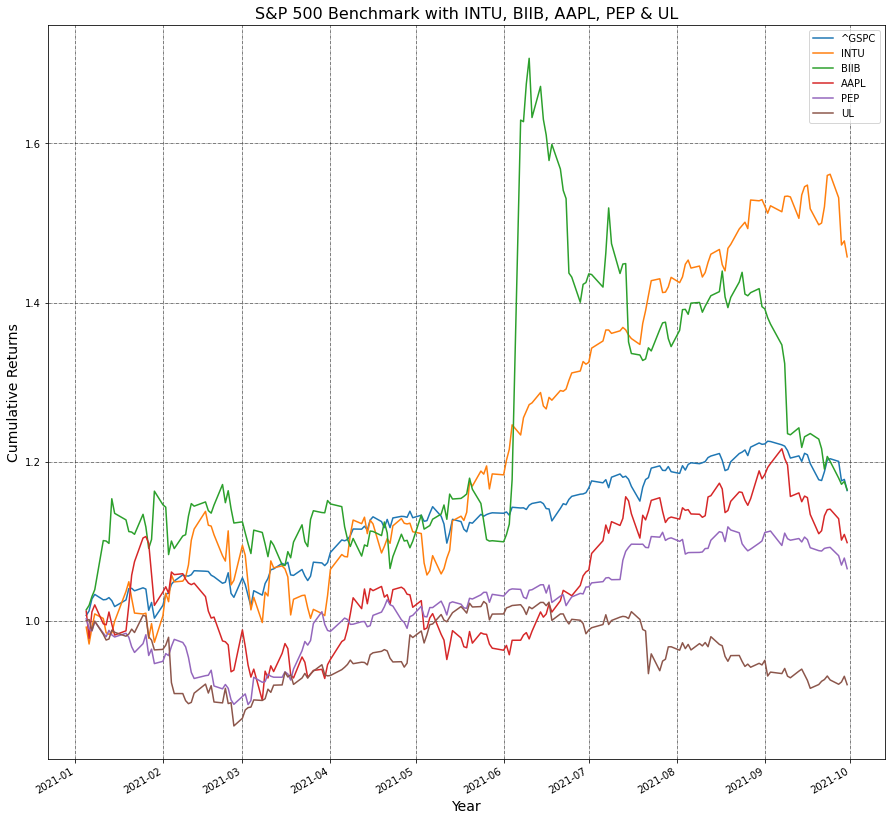

In [ ]:
# plot all the close prices
((SP500_data[['^GSPC', 'INTU', 'BIIB', 'AAPL', 'PEP', 'UL']].pct_change()+1).cumprod()).plot(figsize=(15, 15))
plt.legend() # show the legend
plt.title("S&P 500 Benchmark with INTU, BIIB, AAPL, PEP & UL", fontsize=16) # label the title
plt.ylabel('Cumulative Returns', fontsize=14) # label y-axis
plt.xlabel('Year', fontsize=14) # label x-axis
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5) # plot the grid lines
plt.show() # show the plot

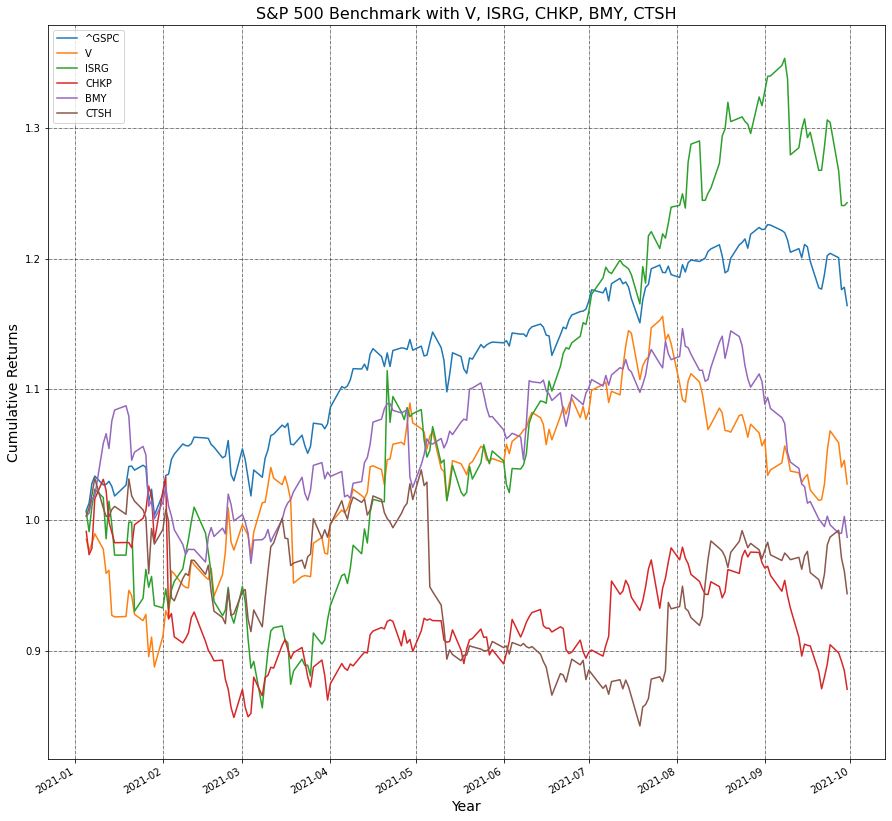

In [ ]:
# plot all the close prices
((SP500_data[['^GSPC', 'V', 'ISRG', 'CHKP', 'BMY', 'CTSH']].pct_change()+1).cumprod()).plot(figsize=(15, 15))
plt.legend() # show the legend
plt.title("S&P 500 Benchmark with V, ISRG, CHKP, BMY, CTSH", fontsize=16) # label the title
plt.ylabel('Cumulative Returns', fontsize=14) # label y-axis
plt.xlabel('Year', fontsize=14) # label x-axis
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5) # plot the grid lines
plt.show() # show the plot

These plots can clearly show that INTU, BIIB, and V have outperformed the S&P 500 index as their cumulative returns are higher than the S&P 500. When we look closer at two of our four stocks in our portfolio, V and AAPL have only slightly underperformed the S&P 500 index.

## **Dow Jones Index Benchmark with Top 10 stocks**

In [ ]:
# our list for final 10 stocks and S&P500
top10_DJI = ['DJI', 'INTU', 'BIIB', 'AAPL', 'PEP', 'UL', 'V', 'ISRG', 'CHKP', 'BMY', 'CTSH']

In [ ]:
# generate the data about each stock from 1/1/2021 to 10/1/2021
benchmark2 = {ticker : si.get_data(ticker,start_date ='01/01/2021', end_date='10/01/2021',interval='1d') for ticker in top10_DJI}

In [ ]:
# print the info
benchmark2

{'AAPL':                   open        high         low       close    adjclose  \
 2021-01-04  133.520004  133.610001  126.760002  129.410004  128.617111   
 2021-01-05  128.889999  131.740005  128.429993  131.009995  130.207291   
 2021-01-06  127.720001  131.050003  126.379997  126.599998  125.824326   
 2021-01-07  128.360001  131.630005  127.860001  130.919998  130.117859   
 2021-01-08  132.429993  132.630005  130.229996  132.050003  131.240921   
 2021-01-11  129.190002  130.169998  128.500000  128.979996  128.189743   
 2021-01-12  128.500000  129.690002  126.860001  128.800003  128.010849   
 2021-01-13  128.759995  131.449997  128.490005  130.889999  130.088028   
 2021-01-14  130.800003  131.000000  128.759995  128.910004  128.120178   
 2021-01-15  128.779999  130.220001  127.000000  127.139999  126.361008   
 2021-01-19  127.779999  128.710007  126.940002  127.830002  127.046791   
 2021-01-20  128.660004  132.490005  128.550003  132.029999  131.221054   
 2021-01-21  133.

In [ ]:
# extract the data we need, adjclose
# get the adjclose price for the A as sample
DJI_data = pd.DataFrame(benchmark2['DJI']['adjclose']).rename(columns = {"adjclose":"DJI"})

# combine all the tickers (all the rest of the samples)
for i in top10_DJI[1:]:
  DJI_data[i] = pd.DataFrame(benchmark2[i]['adjclose'])
DJI_data

DJI        INTU        BIIB        AAPL         PEP  \
2021-01-04  30223.900391  369.669983  242.949997  128.617111  141.121780   
2021-01-05  30391.599609  366.855438  246.389999  130.207291  141.542404   
2021-01-06  30829.400391  359.028381  247.750000  125.824326  139.811020   
2021-01-07  31041.099609  366.616760  250.440002  130.117859  139.361069   
2021-01-08  31098.000000  373.011902  252.539993  131.240921  141.033737   
2021-01-11  31008.699219  370.900085  267.519989  128.189743  138.989349   
2021-01-12  31068.699219  364.255920  267.390015  128.010849  138.343750   
2021-01-13  31060.500000  363.548615  266.670013  130.088028  139.478439   
2021-01-14  30991.500000  364.096497  280.290009  128.120178  138.666550   
2021-01-15  30814.300781  369.575226  275.839996  126.361008  138.304642   
2021-01-19  30930.500000  383.461334  273.839996  127.046791  138.960022   
2021-01-20  31188.400391  387.953857  270.279999  131.221054  138.245941   
2021-01-21  31176.000000  380.273712  270.119995  136.031403  136.563477   
2021-01-22  30997.000000  373.400391  269.440002  138.217926  135.565735   
2021-01-25  30960.000000  372.981995  275.540009  142.044312  137.121033   
2021-01-26  30937.000000  373.350586  271.670013  142.282867  138.705688   
2021-01-27  30303.199219  361.705780  265.149994  141.189590  135.027710   
2021-01-28  30603.400391  368.519348  267.869995  136.250031  136.152649   
2021-01-29  29982.599609  359.833099  282.609985  131.151474  133.589813   
2021-02-01  30211.900391  372.135284  278.459991  133.318100  133.990860   
2021-02-02  30687.500000  382.624573  277.720001  134.162918  135.360321   
2021-02-03  30723.599609  378.679901  263.250000  133.119354  135.008179   
2021-02-04  31055.900391  391.211243  267.390015  136.548218  136.631943   
2021-02-05  31148.199219  387.874207  265.089996  136.125168  137.884018   
2021-02-08  31385.800781  388.232788  268.929993  136.274490  137.336227   
2021-02-09  31375.800781  390.035767  269.309998  135.378647  136.553696   
2021-02-10  31437.800781  395.753601  275.000000  134.761520  134.695145   
2021-02-11  31430.699219  407.239014  278.809998  134.502747  132.024734   
2021-02-12  31458.400391  412.389008  278.029999  134.741608  130.948715   
2021-02-16  31522.699219  420.627045  279.320007  132.571762  131.447601   
2021-02-17  31613.000000  414.201996  276.670013  130.232666  131.525864   
2021-02-18  31493.300781  413.783630  275.899994  129.107895  132.415985   
2021-02-19  31494.300781  409.759247  278.350006  129.267166  129.618408   
2021-02-22  31521.699219  399.997101  284.630005  125.415131  129.109756   
2021-02-23  31537.400391  397.546631  279.079987  125.275772  129.882507   
2021-02-24  31961.900391  411.582153  282.739990  124.768143  129.207565   
2021-02-25  31402.000000  386.479645  277.260010  120.428383  127.163177   
2021-02-26  30932.400391  388.631256  272.880005  120.697128  126.370857   
2021-03-01  31535.500000  404.838348  273.239990  127.196823  127.769646   
2021-03-02  31391.500000  400.196381  269.850006  124.539207  128.209824   
2021-03-03  31270.099609  387.206787  266.600006  121.493408  126.321953   
2021-03-04  30924.099609  374.874664  263.570007  119.572365  127.024956   
2021-03-05  31496.300781  380.731903  270.709991  120.856384  131.166107   
2021-03-08  31802.400391  368.987549  270.010010  115.819870  130.278717   
2021-03-09  31832.699219  383.092773  266.489990  120.527916  130.397034   
2021-03-10  32297.000000  381.339600  262.609985  119.423080  131.708405   
2021-03-11  32485.599609  397.626343  267.440002  121.393875  131.353439   
2021-03-12  32778.601562  394.418793  266.130005  120.468193  131.175964   
2021-03-15  32953.500000  395.305328  260.130005  123.414459  131.166107   
2021-03-16  32825.898438  393.890839  259.920013  124.987122  132.132370   
2021-03-17  33015.398438  390.205139  264.149994  124.180885  131.747833   
2021-03-18  32862.300781  372.523804  262.269989  119.970512  130.673

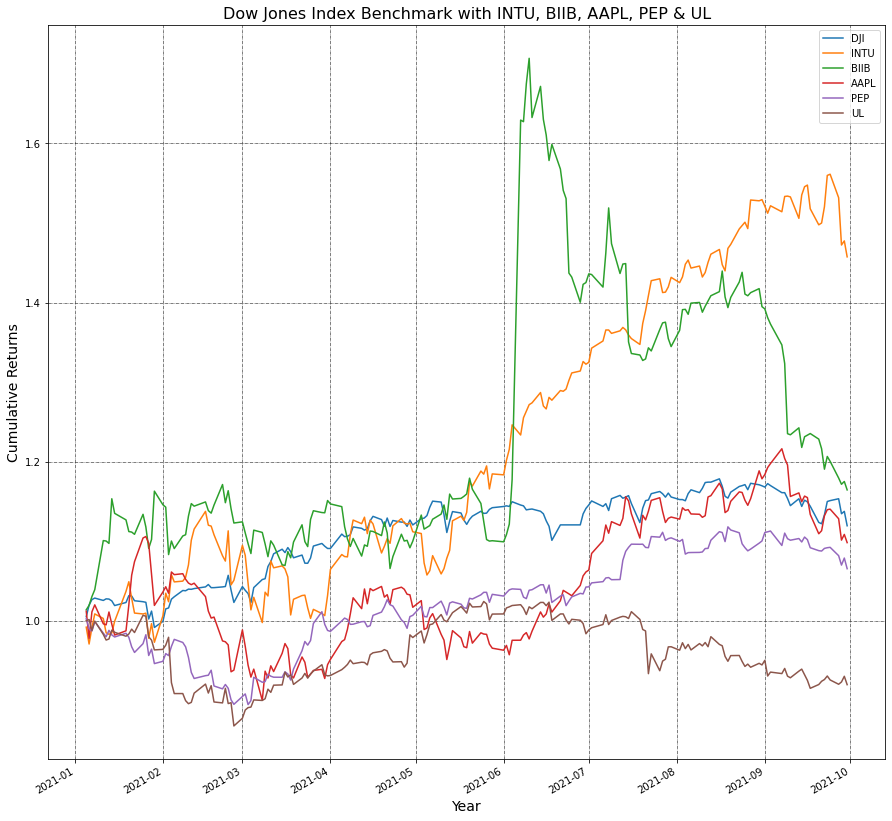

In [ ]:
# plot all the close prices
((DJI_data[['DJI', 'INTU', 'BIIB', 'AAPL', 'PEP', 'UL']].pct_change()+1).cumprod()).plot(figsize=(15, 15))
plt.legend() # show the legend
plt.title("Dow Jones Index Benchmark with INTU, BIIB, AAPL, PEP & UL", fontsize=16) # label the title
plt.ylabel('Cumulative Returns', fontsize=14) # label y-axis
plt.xlabel('Year', fontsize=14) # label x-axis
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5) # plot the grid lines
plt.show() # show the plot

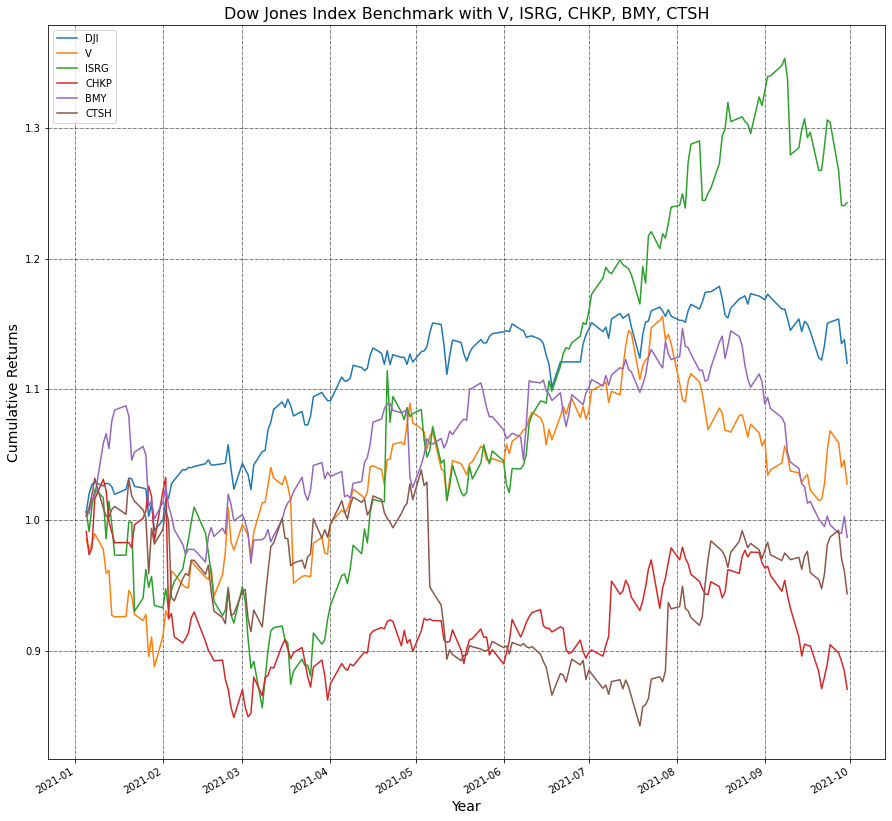

In [ ]:
# plot all the close prices
((DJI_data[['DJI', 'V', 'ISRG', 'CHKP', 'BMY', 'CTSH']].pct_change()+1).cumprod()).plot(figsize=(15, 15))
plt.legend() # show the legend
plt.title("Dow Jones Index Benchmark with V, ISRG, CHKP, BMY, CTSH", fontsize=16) # label the title
plt.ylabel('Cumulative Returns', fontsize=14) # label y-axis
plt.xlabel('Year', fontsize=14) # label x-axis
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5) # plot the grid lines
plt.show() # show the plot

We used one more indicator, Dow Jones Index, to see the performance of our stocks. It further supports that INTU, BIIB, and V have outperformed the Dow Jones index as their cumulative returns are higher than the Dow Jones index. When we look at V and AAPL, they have only slightly underperformed the Dow Jones index.

In [ ]:
#Retrieving the allocation for each stock
clean_allocation_per = []  # empty list
cleanparam = list(param_analysis[r])# Storing a list of the summed up means of the returns for the optimized distribution for the 4 selected stocks at the given risk level
cleandf = pd.DataFrame(data=cleanparam, index=[df_return[0],df_return[1],df_return[2],df_return[3]], columns=["Allocation"])

for i in cleandf.iloc[:, 0]: # executing a for loop
    clean_allocation_per.append(i) 

# Calcuting the gains and the allocation for the stocks
prep_data2['Actual_Gains (%)'] = round(((prep_data2['October 2021']/prep_data2['Jan 2021'])-1),2) # calculating actual gain %
prep_data2['Allocation %'] = clean_allocation_per # allocated % based on risk level

prep_data2 # displaying the result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Jan 2021  October 2021  Actual_Gains ($)  Actual_Gains (%)  \
INTU  359.257141    625.193726            265.94              0.74   
AAPL  131.151489    149.581696             18.43              0.14   
V     192.408295    211.770004             19.36              0.10   
ISRG  249.213333    361.130005            111.92              0.45   

      Allocation %  
INTU      0.000430  
AAPL      0.000031  
V         0.000028  
ISRG      0.999489

- The methodology of top 10 stock selection included three parts: stock price analysis, the impact of COVID-19, and financial performance analysis. It helps us to select those stocks with well-balanced figures of profit margin and asset turnover and not affected by the pandemic negatively.
- Balancing the risk and return is the most critical part of the modeling and analysis part. We noticed that some stocks have very high volatility in their stock price. Some stocks have high returns and high standard deviations which means their return rate is directly associated with their risk level. We need an efficient frontier to give us a more precise answer.
- According to our observations above, setting the constraints is an important task to move forward. It requires us to use some external data (i.e. Treasury Bill yield rate) to determine the return floor, and the information from the covariance matrix to decide the risk at a certain level.
- However, choosing the optimal stock allocation of the stocks that are associated with its risk level and return rate required us to be detail-oriented to look at the proportions of stocks. When we look closer to the optimal stock allocation and efficient frontier, we decided to go for a risk level at 0.00015 as we want to maximize the returns but not put all eggs in one basket. The portfolio mainly has four stocks (INTU, AAPL, V, and ISRG) to diversify the risks but provides a decent number of returns based on the information shown in the graph of the efficient frontier.
- After working on our analysis and modeling part, we found out that those 4 stocks did provide a good return from our monthly data with their proportions that provided in the modeling part. That is better than our estimated result.
- The plots of the benchmark with the S&P 500 and Dow Jones Index reveal that the cumulative returns of INTU, BIIB, and ISRG have outperformed the S&P 500 and Dow Jones Index among other seven stocks. It further supports the result in the efficient frontier that INTU and ISRG have higher proportions in the portfolio to balance the risk and return. However, AAPL and V were chosen as they are just slightly underperformed the S&P 500 and Dow Jones Index among the other five stocks. This is the reason why the proportion of these two stocks are lower than INTU and ISRG.
- Responding to the previous bullet points, the Senator provides an insight for us to select stocks but not the full picture. There are over 2,800 stocks available in the market. We can narrow down the selections based on his trading habit. Then we could pursue our analysis and use the optimization modeling to visualize the better answer for optimal stock allocation. We can see the connections between our comparison with S&P500 and Dow Jones Index and the modeling part.


## **Individual Participation**

Work Planning: We have initially analyzed the complete project during the class and then divided the total Project into 2 parts -

* Exploratory Data Analysis - To finalize the top 10 funds.
* Portfolio Optimization - To build a model to determine the final funds to invest the amount. 

The EDA part was taken up by 4 members of the team initially - Akshay, Cedric, Youngkyun, and Monica.
The Portfolio Optimization part was assigned to Bhanu Sai Teja and Lily.

Then, the work was coordinated among these 2 groups whereas part of the EDA analysis, all the 4 members assigned had come up with multiple ideas, and then in a call discussion, we finalized the complete approach. Cedric and Youngkyun have built up the approach of code, thereby Akshay and Monica have written and built the complete story for this.

On the Portfolio Optimization part, Bhanu has added the initial model code and then Lily has added comments to it. But at a later point, during our call conversations, we found that the model was showing infeasible results. Akshay, Monica, and Youngkyun have analyzed the values of the constraints and based on a few articles, also with trial and error methods changed the Return % and Max risk values to obtain an optimal solution. After this, the assessment and story for the Portfolio Optimization were built by Akshay and Monica which included some approaches used by Bhanu and Lily as well.

On the conclusion part, Cedric has worked on the coding part and then used the graphs which include the Cumulative returns done by Akshay. Later the points were written and discussed over a call altogether.





# **Appendix**

## Code to generate the external data

In [ ]:
# install the package
# !pip install yfinance

In [ ]:
# import yfinance as yf
# set the dictionary
# dic = {}

# for ticker in final_list:

# generate industry and sector information
#  industry = yf.Ticker(ticker).info.get('industry')
#  sector = yf.Ticker(ticker).info.get('Sector')
#  dic[ticker] = [industry, sector]

# dic

In [ ]:
# put the dic into a dataframe
# info = pd.DataFrame.from_dict(dic, orient='index')

# name the columns
# info.columns = ['industry', 'Sector']
# info

## Code to generate revenue data

Since Yahoo Finance generates different every time, we decided to export the csv file and import back to the drive.

In [ ]:
# import the module of Yahoo Finance
# import yahoo_fin.stock_info as yf

In [ ]:
# since yahoo finance generated some income statements in 2021
# we will only use their 2018 and 2019 financial statements until 3/1/2021 and generate them separately
# list all tickers with 2 lists
# revenue_list1 = ['MSFT', 'V', 'AAPL', 'PG', 'TEL', 'INTU', 'BABA']

# generate the revenue data from Yahoo Finance
# revenue1 = {ticker : yf.get_income_statement(ticker).loc['totalRevenue',:] for ticker in revenue_list1}

In [ ]:
# revenue_list2 = ['CRSP', 'BLK', 'AMZN', 'BAM', 'C', 'PYPL', 'DHR', 'UNH', 'ISRG', 'LH', 'EDIT',
#                  'ALB', 'MRK', 'XPO', 'RTX', 'GE', 'NTLA', 'GOOGL', 'ST', 'BMY', 'PEP', 'DFS', 'COHR',
#                  'CHKP', 'GILD', 'PGEN', 'CVS', 'GM', 'UL', 'AMGN', 'SYF', 'CERN', 'WFC', 'ARW', 'CTSH',
#                  'A', 'PRGO', 'BBU', 'BIIB', 'COF', 'EMR', 'QCOM', 'ABT', 'ALTR', 'ETN', 'CRM', 'JNJ', 'KMX']

# generate the revenue data from Yahoo Finance
# revenue2 = {ticker : yf.get_income_statement(ticker).loc['totalRevenue',:] for ticker in revenue_list2}

In [ ]:
# read the revenue data 1
# revenue1

In [ ]:
# read the revenue data 2
# revenue2

In [ ]:
# sample out one stock - 'MSFT' in revenue1
# revenue_data1 = pd.DataFrame(revenue1['MSFT']).rename(columns = {"totalRevenue":'MSFT'}) # put it in the dataframe
# revenue_data1.reset_index(drop=True, inplace=True) # reset the index
# revenue_data1.index = [2021, 2020, 2019, 2018] # name the rows
# revenue_data1 # read the data

In [ ]:
# load revenue data 1 related to our ticker list
# for i in revenue_list1[1:]:
#   data1 = pd.DataFrame(revenue1[i]).rename(columns = {"totalRevenue":i}) # put it in the dataframe
#   data1.reset_index(drop=True, inplace=True) # reset the index
#   data1.index = [2021, 2020, 2019, 2018] # name the rows
#   revenue_data1 = revenue_data1.merge(data1, how='outer', left_index=True, right_index=True) # merge the dataset
# revenue_data1 # revenue data 1

In [ ]:
# keep 2018 and 2019 data only
# revenue_data1 = revenue_data1.drop([2021, 2020])
# revenue_data1

In [ ]:
# sample out one stock - 'CRSP' in revenue2
# revenue_data2 = pd.DataFrame(revenue2['CRSP']).rename(columns = {"totalRevenue":'CRSP'}) # put it in the dataframe
# revenue_data2.reset_index(drop=True, inplace=True) # reset the index
# revenue_data2.index = [2020, 2019, 2018, 2017] # name the rows
# revenue_data2 # read the data

In [ ]:
# load all revenue data related to our ticker list
# for i in revenue_list2[1:]:
#   data2 = pd.DataFrame(revenue2[i]).rename(columns = {"totalRevenue":i}) # put it in the dataframe
#   data2.reset_index(drop=True, inplace=True) # reset the index
#   data2.index = [2020, 2019, 2018, 2017] # name the rows
#   revenue_data2 = revenue_data2.merge(data2, how='outer', left_index=True, right_index=True) # merge the dataset
# revenue_data2 # revenue data 2

In [ ]:
# keep 2018 and 2019 data only
# revenue_data2 = revenue_data2.drop([2020, 2017])
# revenue_data2

In [ ]:
# combine two revenue tables
# data = [revenue_data1, revenue_data2]
# revenue_data = pd.concat(data, axis=1)
# revenue_data

In [ ]:
# export revenue data as csv file
# revenue_data.to_csv(r'revenue_data.csv', index = False, header = True)

## Code to generate net income

Since Yahoo Finance generates different every time, we decided to export the csv file and import back to the drive.

In [ ]:
# since yahoo finance generated some income statements in 2021
# we will only use their 2018 and 2019 financial statements until 3/1/2021 and generate them separately
# list all tickers with 2 lists
# netincome_list1 = ['MSFT', 'V', 'AAPL', 'PG', 'TEL', 'INTU', 'BABA', 'EMR', 'QCOM']

# generate the revenue data from Yahoo Finance
# netIncome1 = {ticker : yf.get_income_statement(ticker).loc['netIncome',:] for ticker in netincome_list1}

In [ ]:
# netincome_list2 = ['CRSP', 'BLK', 'AMZN', 'BAM', 'C', 'PYPL', 'DHR', 'UNH', 'ISRG', 'LH', 'EDIT',
#                  'ALB', 'MRK', 'XPO', 'RTX', 'GE', 'NTLA', 'GOOGL', 'ST', 'BMY', 'PEP', 'DFS', 'COHR',
#                  'CHKP', 'GILD', 'PGEN', 'CVS', 'GM', 'UL', 'AMGN', 'SYF', 'CERN', 'WFC', 'ARW', 'CTSH',
#                  'A', 'PRGO', 'BBU', 'BIIB', 'COF', 'ABT', 'ALTR', 'ETN', 'CRM', 'JNJ', 'KMX']

# generate the revenue data from Yahoo Finance
# netIncome2 = {ticker : yf.get_income_statement(ticker).loc['netIncome',:] for ticker in netincome_list2}

In [ ]:
# read the net income data 1
# netIncome1

In [ ]:
# read the net income data 2
# netIncome2

In [ ]:
# sample out one stock - 'MSFT' in netincome1
# netincome_data1 = pd.DataFrame(netIncome1['MSFT']).rename(columns = {"netIncome":'MSFT'}) # put it in the dataframe
# netincome_data1.reset_index(drop=True, inplace=True) # reset the index
# netincome_data1.index = [2021, 2020, 2019, 2018] # name the rows
# netincome_data1 # read the data

In [ ]:
# load netincome data 1 related to our ticker list
# for i in netincome_list1[1:]:
#   data1 = pd.DataFrame(netIncome1[i]).rename(columns = {"netIncome":i}) # put it in the dataframe
#   data1.reset_index(drop=True, inplace=True) # reset the index
#   data1.index = [2021, 2020, 2019, 2018] # name the rows
#   netincome_data1 = netincome_data1.merge(data1, how='outer', left_index=True, right_index=True) # merge the dataset
# netincome_data1 # net income data 1

In [ ]:
# keep 2018 and 2019 data only
# netincome_data1 = netincome_data1.drop([2021, 2020])
# netincome_data1

In [ ]:
# sample out one stock - 'CRSP' in netincome2
# netincome_data2 = pd.DataFrame(netIncome2['CRSP']).rename(columns = {"netIncome":'CRSP'}) # put it in the dataframe
# netincome_data2.reset_index(drop=True, inplace=True) # reset the index
# netincome_data2.index = [2020, 2019, 2018, 2017] # name the rows
# netincome_data2 # read the data

In [ ]:
# load all netincome data related to our ticker list
# for i in netincome_list2[1:]:
#   data2 = pd.DataFrame(netIncome2[i]).rename(columns = {"netIncome":i}) # put it in the dataframe
#   data2.reset_index(drop=True, inplace=True) # reset the index
#   data2.index = [2020, 2019, 2018, 2017] # name the rows
#   netincome_data2 = netincome_data2.merge(data2, how='outer', left_index=True, right_index=True) # merge the dataset
# netincome_data2 # net income data 2

In [ ]:
# keep 2018 and 2019 data only
# netincome_data2 = netincome_data2.drop([2020, 2017])
# netincome_data2

In [ ]:
# combine two net income tables
# data = [netincome_data1, netincome_data2]
# netincome_data = pd.concat(data, axis=1)
# netincome_data

In [ ]:
# export net income data as csv file
# netincome_data.to_csv(r'netincome_data.csv', index = False, header = True)

## Code to generate total assets

Since Yahoo Finance generates different every time, we decided to export the csv file and import back to the drive.

In [ ]:
# since yahoo finance generated some balance statements in 2021
# we will only use their 2018 and 2019 balance sheet until 3/1/2021 and generate them separately
# list all tickers with 2 lists
# totalassets_list1 = ['MSFT', 'V', 'AAPL', 'PG', 'TEL', 'INTU', 'BABA']

# generate the total assets data from Yahoo Finance
# totalassets1 = {ticker : yf.get_balance_sheet(ticker).loc['totalAssets',:] for ticker in totalassets_list1}

In [ ]:
# totalassets_list2 = ['CRSP', 'BLK', 'AMZN', 'BAM', 'C', 'PYPL', 'DHR', 'UNH', 'ISRG', 'LH', 'EDIT',
#                  'ALB', 'MRK', 'XPO', 'RTX', 'GE', 'NTLA', 'GOOGL', 'ST', 'BMY', 'PEP', 'DFS', 'COHR',
#                  'CHKP', 'GILD', 'PGEN', 'CVS', 'GM', 'UL', 'AMGN', 'SYF', 'CERN', 'WFC', 'ARW', 'CTSH',
#                  'A', 'PRGO', 'BBU', 'BIIB', 'COF', 'EMR', 'QCOM', 'ABT', 'ALTR', 'ETN', 'CRM', 'JNJ', 'KMX']

# generate the total assets data from Yahoo Finance
# totalassets2 = {ticker : yf.get_balance_sheet(ticker).loc['totalAssets',:] for ticker in totalassets_list2}

In [ ]:
# read the total assets data 1
# totalassets1

In [ ]:
# read the total assets data 2
# totalassets2

In [ ]:
# sample out one stock - 'MSFT' in totalassets1
# totalassets_data1 = pd.DataFrame(totalassets1['MSFT']).rename(columns = {"totalAssets":'MSFT'}) # put it in the dataframe
# totalassets_data1.reset_index(drop=True, inplace=True) # reset the index
# totalassets_data1.index = [2021, 2020, 2019, 2018] # name the rows
# totalassets_data1 # read the data

In [ ]:
# load totalassets data 1 related to our ticker list
# for i in totalassets_list1[1:]:
#   data1 = pd.DataFrame(totalassets1[i]).rename(columns = {"totalAssets":i}) # put it in the dataframe
#   data1.reset_index(drop=True, inplace=True) # reset the index
#   data1.index = [2021, 2020, 2019, 2018] # name the rows
#   totalassets_data1 = totalassets_data1.merge(data1, how='outer', left_index=True, right_index=True) # merge the dataset
# totalassets_data1 # total assets data 1

In [ ]:
# keep 2018 and 2019 data only
# totalassets_data1 = totalassets_data1.drop([2021, 2020])
# totalassets_data1

In [ ]:
# sample out one stock - 'CRSP' in totalassets2
# totalassets_data2 = pd.DataFrame(totalassets2['CRSP']).rename(columns = {"totalAssets":'CRSP'}) # put it in the dataframe
# totalassets_data2.reset_index(drop=True, inplace=True) # reset the index
# totalassets_data2.index = [2020, 2019, 2018, 2017] # name the rows
# totalassets_data2 # read the data

In [ ]:
# load all totalassets data related to our ticker list
# for i in totalassets_list2[1:]:
#   data2 = pd.DataFrame(totalassets2[i]).rename(columns = {"totalAssets":i}) # put it in the dataframe
#   data2.reset_index(drop=True, inplace=True) # reset the index
#   data2.index = [2020, 2019, 2018, 2017] # name the rows
#   totalassets_data2 = totalassets_data2.merge(data2, how='outer', left_index=True, right_index=True) # merge the dataset
# totalassets_data2 # total assets data 2

In [ ]:
# keep 2018 and 2019 data only
# totalassets_data2 = totalassets_data2.drop([2020, 2017])
# totalassets_data2

In [ ]:
# combine two totalassets tables
# data = [totalassets_data1, totalassets_data2]
# totalassets_data = pd.concat(data, axis=1)
# totalassets_data

In [ ]:
# export total assets data as csv file
# totalassets_data.to_csv(r'totalassets.csv', index = False, header = True)